In [ ]:
while(True):
    
    try:
        del range
    except:
        pass

    import requests
    from bs4 import BeautifulSoup
    from datetime import datetime,timedelta
    import pandas as pd
    import numpy as np
    saat=datetime.now().hour
    import cloudscraper
    from datetime import datetime
    from concurrent.futures import ThreadPoolExecutor,as_completed
    simdi = datetime.now()
    saat1 = simdi.hour
    dakika = simdi.minute


    saatimm=datetime.now().hour
   
    if saatimm<24:
        import time
        tarih=pd.read_csv("tarih.csv")
        tarih=pd.to_datetime(tarih.iloc[0,0])


        # Döngü çalışabilir durumda
        print("Döngü başladı, saat:", simdi.strftime("%H:%M:%S"))

                    

        bugün=datetime.now().strftime("%Y-%m-%d")



        dün=(datetime.now()-timedelta(days=1)).strftime("%Y-%m-%d")


        data=pd.read_csv("sepet.csv",index_col=0)
        data=data.rename(columns={"Ürün Adı":"Ürün"})

        data.index.name=""

        try:
            data=data.drop(f"{bugün}",axis=1)
        except:
            pass





        def veriekle(ürün, data, urunler_df):
            if urunler_df is None or urunler_df.empty:
                return data
            else:

                if isinstance(data.loc[ürün], pd.Series):
                        urun_data=pd.DataFrame(data.loc[ürün]).T
                        urun_data = pd.merge(
                            urun_data, 
                            urunler_df, 
                            on='Ürün', 
                            how='outer'
                        )
                    
                    # Çakışan sütunları birleştir
                        if f'{bugün}_x' in urun_data.columns and f'{bugün}_x' in urun_data.columns:
                            urun_data[f'{bugün}'] = urun_data[f'{bugün}_x'].combine_first(urun_data[f'{bugün}_y'])
                            urun_data.drop([f'{bugün}_x', f'{bugün}_y'], axis=1, inplace=True)
                        
                        # İndeksi düzenle
                            urun_data = urun_data.set_index([[ürün] * len(urun_data)])
                            
                            # Mevcut ürünü veri setinden kaldır
                            data = data.drop(ürün, axis=0)
                            
                            # Yeni veriyi ekle
                            data = pd.concat([data, urun_data], axis=0)
                    
                    
                else:
                    
                    urun_data = data.loc[ürün]
                    
                    # Merge işlemi sırasında sütun çakışması yaşanırsa, önekler oluşur
                    urun_data = pd.merge(
                        urun_data, 
                        urunler_df, 
                        on='Ürün', 
                        how='outer'
                    )
                    
                    # Çakışan sütunları birleştir
                    if f'{bugün}_x' in urun_data.columns and f'{bugün}_x' in urun_data.columns:
                        urun_data[f'{bugün}'] = urun_data[f'{bugün}_x'].combine_first(urun_data[f'{bugün}_y'])
                        urun_data.drop([f'{bugün}_x', f'{bugün}_y'], axis=1, inplace=True)
                    
                    # İndeksi düzenle
                    urun_data = urun_data.set_index([[ürün] * len(urun_data)])
                    
                    # Mevcut ürünü veri setinden kaldır
                    data = data.drop(ürün, axis=0)
                    
                    # Yeni veriyi ekle
                    data = pd.concat([data, urun_data], axis=0)

                return data
                    
                    







        import re
        import requests
        from bs4 import BeautifulSoup
        from selenium import webdriver
        from selenium.webdriver.common.by import By
        from selenium.webdriver.chrome.service import Service
        from selenium.webdriver.chrome.options import Options
        from selenium.webdriver.support.ui import WebDriverWait
        from selenium.webdriver.support import expected_conditions as EC
        from time import sleep
        import pandas as pd
        from webdriver_manager.chrome import ChromeDriverManager






        import re
        import requests
        from bs4 import BeautifulSoup
        from selenium import webdriver
        from selenium.webdriver.common.by import By
        from selenium.webdriver.chrome.service import Service
        from selenium.webdriver.chrome.options import Options
        from selenium.webdriver.support.ui import WebDriverWait
        from selenium.webdriver.support import expected_conditions as EC
        from time import sleep
        import pandas as pd
        from webdriver_manager.chrome import ChromeDriverManager

        def scrape_sok(urls):
            df=[]
            for url in urls:

                response = requests.get(url)

                # Sayfa başarılı şekilde alındıysa
                if response.status_code == 200:
                    # Sayfanın HTML içeriğini parse ediyoruz
                    soup = BeautifulSoup(response.text, 'html.parser')

                    # Ürünleri seçiyoruz, her bir ürün div'ini tanımlıyoruz
                    products = soup.find_all('div', class_='CProductCard-module_productCardWrapper__okAmT')

                    # Ürünleri listeleyelim
                    for product in products:
                        # Ürün adı
                        name = product.find('h2', class_='CProductCard-module_title__u8bMW').text.strip()
                        
                        # Ürün fiyatı
                        price = product.find('span', class_='CPriceBox-module_price__bYk-c')
                        discounted_price = product.find('span', class_='CPriceBox-module_discountedPrice__15Ffw')
                        if not price:
                            price = discounted_price
                        if price and discounted_price:
                            price=discounted_price
                        price=price.text.strip()
                        price=price.replace("₺","").replace(".","").replace(",",".")
                        price=float(price)
                        
                    
                        print(f"Ürün Adı: {name}")
                        print(f"Fiyat: {price}")
                        print("-" * 40)
                        df.append({"Product Name":name,"Price (TRY)":price})
                        

                else:
                    print("Sayfa alınamadı, hata kodu:", response.status_code)
                df=pd.DataFrame(df)
                return df






        def clean_price(price_text):
            price_text = price_text.replace("TL", "").strip()  # "TL" ibaresini kaldır
            price_text = price_text.replace(",", ".")  # Türkçe ondalık formatı düzelt
            try:
                return float(price_text)
            except ValueError:
                return None
        def scrape_migros_products(pages):
            urunad = []
            urunfiyat = []

            headers = {
                "User-Agent": "Mozilla/5.0",
                "Accept": "application/json, text/plain, */*"
            }

            scraper = cloudscraper.CloudScraper()

            def sayfa_sayisi(url):
                return scraper.get(url, headers=headers).json()["data"]["searchInfo"]["pageCount"]

            def sayfa_verisini_cek(url, sayfa):
                response = scraper.get(f"{url}?page={sayfa}", headers=headers).json()
                return response["data"]["searchInfo"]["storeProductInfos"]

            with ThreadPoolExecutor(max_workers=5) as executor:
                futures = []
                for i in pages:
                    try:
                        sayfa_sayisi_val = sayfa_sayisi(i)
                        for j in range(1, sayfa_sayisi_val + 1):
                            futures.append(executor.submit(sayfa_verisini_cek, i, j))
                    except Exception as e:
                        print(f"⚠️ Sayfa sayısı belirlenirken hata oluştu: {e}")

                for future in as_completed(futures):
                    try:
                        info = future.result()
                        for urun in info:
                            urunad.append(urun.get("name"))
                            urunfiyat.append(int(urun.get("salePrice")) / 100)
                    except Exception as e:
                        print(f"⚠️ Sayfa verisi çekerken hata oluştu: {e}")

            veri = pd.DataFrame({"Product Name": urunad, "Price (TRY)": urunfiyat})
            print("✅ Migros verisi çekildi!")
            return veri

        def scrape_carrefour_products(pages):
            print("🔍 Carrefour verisi çekiliyor...")

            options = Options()
            options.add_argument("--headless")  # Başsız mod
            options.add_argument("--no-sandbox")
            options.add_argument("--disable-dev-shm-usage")
            options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")  # User-Agent
            service = Service(ChromeDriverManager().install())
            driver = webdriver.Chrome(service=service, options=options)

            carrefour_data = []

            for url in pages:
                print(f"📌 Scraping URL: {url}")
                driver.get(url)

                try:
                    # **Sayfanın tamamen yüklenmesini bekle**
                    WebDriverWait(driver, 5).until(
                        EC.presence_of_element_located((By.CSS_SELECTOR, "li.product-listing-item"))
                    )

                    # **📌 Sayfanın sonuna kadar kaydırarak tüm ürünleri yükle**
                    last_height = driver.execute_script("return document.body.scrollHeight")
                    while True:
                        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
                        time.sleep(3)  # Sayfanın yüklenmesini bekle
                        new_height = driver.execute_script("return document.body.scrollHeight")
                        if new_height == last_height:  # Daha fazla ürün yüklenmiyorsa çık
                            break
                        last_height = new_height

                    # **📌 Ürünleri bul**
                    products = driver.find_elements(By.CSS_SELECTOR, "li.product-listing-item")
                    print(f"✅ Toplam Ürün Sayısı: {len(products)}")

                    for product in products:
                        try:
                            # **Ürün adı**
                            try:
                                name_element = product.find_element(By.CSS_SELECTOR, "h3.item-name")
                                product_name = name_element.text.strip()
                            except:
                                pass
                            # **Fiyatı al**
                            try:
                                price_element = product.find_element(By.CSS_SELECTOR, "span.priceLineThrough.js-variant-price")
                                product_price_text = price_element.text.strip()
                            except:
                                try:
                                    price_element = product.find_element(By.CSS_SELECTOR, "span.item-price.js-variant-discounted-price")
                                    product_price_text = price_element.text.strip()
                                except:
                                    pass

                            product_price = clean_price(product_price_text)

                            if product_name and product_price is not None:
                                carrefour_data.append({"Product Name": product_name, "Price (TRY)": product_price})
                                print(f"✅ Collected - Product: {product_name}, Price: {product_price} TRY")

                        except Exception as e:
                            print(f"⚠️ Hata oluştu: {e}")

                except Exception as e:
                    print(f"❌ Timeout veya başka hata oluştu: {e}")

                

            driver.quit()
            return carrefour_data

        # 📌 Ana Fonksiyon
        def vericek(carrefour, migros,sok, name):
            
            print(f"{name} verisi çekiliyor...")
            bugün = time.strftime("%Y-%m-%d")  # Bugünün tarihini al

            migros_data = scrape_migros_products(migros)
            sok_data=scrape_sok(sok)
            

            try:
                if carrefour:
                    
                    carrefour_data = scrape_carrefour_products(carrefour)
                    
                carrefour_data = pd.DataFrame(carrefour_data)
                

                all_data = pd.concat([migros_data, carrefour_data,sok_data], axis=0)
            except Exception as e:
                print(f"⚠️ Carrefour verisi çekilirken hata oluştu: {e}")
                all_data = all_data = pd.concat([migros_data,sok_data], axis=0)

            if all_data.empty:
                return pd.DataFrame()

            product_df = all_data.copy()
            product_df['Product Group'] = product_df['Product Name'].str.lower()

            # Geometrik ortalama hesaplama fonksiyonu
            def geometric_mean(prices):
                return np.exp(np.mean(np.log(prices)))

            geo_mean_df = (
                product_df.groupby(['Product Group'])
                .agg(
                    Geometric_Mean=('Price (TRY)', geometric_mean),
                    Product_Names=('Product Name', lambda x: ', '.join(x))                )
                .reset_index()
            )

            geo_mean_df = geo_mean_df.drop("Product Group", axis=1)
            geo_mean_df.columns = ["Price (TRY)", "Product Name"]

            urunler_df = geo_mean_df.copy()
            if not urunler_df.empty:
                urunler_df.columns = [str(bugün), "Ürün"]
                urunler_df.index = len(urunler_df) * [name]
                urunler_df = urunler_df.drop_duplicates().dropna()
                return urunler_df

            try:
                all_data.columns = ["Ürün", str(bugün)]
                return all_data
            except:
                return pd.DataFrame()

        carrefour = ["https://www.carrefoursa.com/pirinc/c/1134?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros_pages  = ["https://www.migros.com.tr/rest/search/screens/pirinc-c-427"
        ]
        sok=["https://www.sokmarket.com.tr/pirinc-ve-bulgur-c-1810"]



        urunler_df=vericek(carrefour,migros_pages,sok,"Pirinç")
        urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Pirinç",case=False)]

        data=veriekle("Pirinç",data,urunler_df)
            






        pages1 = ["https://www.carrefoursa.com/bugday-unu/c/1277?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]

            



        migros_pages  = ["https://www.migros.com.tr/rest/search/screens/sade-un-c-289b"]

        sok=["https://www.sokmarket.com.tr/un-c-1782"]
        urunler_df=vericek(pages1,migros_pages,sok,"Buğday Unu")






        data=veriekle("Buğday Unu",data,urunler_df)









        pages1=["https://www.carrefoursa.com/bebek-mamasi/c/1848?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
            




        migros_pages =["https://www.migros.com.tr/rest/search/screens/devam-sutu-c-1136b"]
        sok=["https://www.sokmarket.com.tr/bebek-mama-c-20638"]

        urunler_df=vericek(pages1,migros_pages,sok,"Bebek Sütü (Toz Karışım)")



        data=veriekle("Bebek Sütü (Toz Karışım)",data,urunler_df)








        pages1 = ["https://www.carrefoursa.com/bulgur/c/1142?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
            




        # Define base URL and total pages to scrape for Migros
        migros_pages1= ["https://www.migros.com.tr/rest/search/screens/pilavlik-bulgur-c-2785"]
        sok=["https://www.sokmarket.com.tr/pirinc-ve-bulgur-c-1810"]


        urunler_df=vericek(pages1,migros_pages1,sok,"Bulgur")
        urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Bulgur",case=False)]

        data=veriekle("Bulgur",data,urunler_df)





        pages1 = ["https://www.migros.com.tr/rest/search/screens/ekmek-c-455"]
        carrefour=["https://www.carrefoursa.com/ekmek/c/2378?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        sok=["https://www.sokmarket.com.tr/ekmek-c-1240"]    




        urunler_df=vericek(carrefour,pages1,sok,"Ekmek")

        urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Ekmek",case=False)]

        data=veriekle("Ekmek",data,urunler_df)






        pages1 = ["https://www.carrefoursa.com/biskuvi/c/1529?q=%3AbestSeller%3Acategory%3A1534%3Acategory%3A1533%3Acategory%3A1537%3Acategory%3A1530%3Acategory%3A1531%3Acategory%3A1536%3AinStockFlag%3Atrue&show=All"]

            
        migros=["https://www.migros.com.tr/rest/search/screens/biskuvi-c-43c"]
        sok=["https://www.sokmarket.com.tr/biskuvi-c-20378?page=1","https://www.sokmarket.com.tr/biskuvi-c-20378?page=2","https://www.sokmarket.com.tr/biskuvi-c-20378?page=3",
                "https://www.sokmarket.com.tr/biskuvi-c-20378?page=4","https://www.sokmarket.com.tr/biskuvi-c-20378?page=5"]
        urunler_df=vericek(pages1,migros,sok,"Bisküvi")




        data=veriekle("Bisküvi",data,urunler_df)





        pages1= ["https://www.carrefoursa.com/kraker/c/1538?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]









        # Define the list of pages to scrape from Migros
        migros_pages  = ["https://www.migros.com.tr/rest/search/screens/kraker-c-27ea"]

        sok=["https://www.sokmarket.com.tr/kraker-ve-tuzlu-biskuvi-c-20380"]

        urunler_df=vericek(pages1,migros_pages,sok,"Kraker")
        urunler_df=urunler_df[urunler_df["Ürün"].str.contains("kraker", case=False)]






        data=veriekle("Kraker",data,urunler_df)





        pages1= ["https://www.carrefoursa.com/bar-ve-gofret/c/1505?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]

        migros=["https://www.migros.com.tr/rest/search/screens/gofret-c-43a"]
        sok=["https://www.sokmarket.com.tr/gofret-c-20379?page=3","https://www.sokmarket.com.tr/gofret-c-20379?page=2","https://www.sokmarket.com.tr/gofret-c-20379?page=1"]
        urunler_df=vericek(pages1,migros,sok,"Gofret")
        if urunler_df is not None and not urunler_df.empty:
            urunler_df=urunler_df[~urunler_df["Ürün"].str.contains("Gofret|gofret", regex=True)]


        data=veriekle("Gofret",data,urunler_df)









        pages1= ["https://www.carrefoursa.com/pastalar/c/1289?q=%3AbestSeller%3AinStockFlag%3Atrue&show=All"]




        # Define the list of pages to scrape from Migros
        migros_pages  = ["https://www.migros.com.tr/rest/search/screens/pasta-c-459"]
        sok=["https://www.sokmarket.com.tr/hamur-ve-pasta-malzemeleri-c-54427"]
        urunler_df=vericek(pages1,migros_pages,sok,"Pasta")
        urunler_df=urunler_df[~urunler_df["Ürün"].str.contains("pasta", case=False)]

        data=veriekle("Pasta",data,urunler_df)








        pages1= ["https://www.carrefoursa.com/mini-kek/c/1547?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]



        migros_pages  = ["https://www.migros.com.tr/rest/search/screens/kek-c-43d"]
        sok=["https://www.sokmarket.com.tr/kek-c-20381?page=3","https://www.sokmarket.com.tr/kek-c-20381?page=2","https://www.sokmarket.com.tr/kek-c-20381?page=1"]
        urunler_df=vericek(pages1,migros_pages,sok,"Kek")


        data=veriekle("Kek",data,urunler_df)









        pages1= ["https://www.carrefoursa.com/serbetli-tatli/c/1294?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]




        migros_pages  = ["https://www.migros.com.tr/rest/search/screens/pastane-tatlilar-c-287b"
        ]
        sok=["https://www.sokmarket.com.tr/sekerleme-c-20388?page=2","https://www.sokmarket.com.tr/sekerleme-c-20388?page=1"]
        urunler_df=vericek(pages1,migros_pages,sok,"Baklava")
        if urunler_df is not None and not urunler_df.empty:
            urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Baklava|baklava|Baklavası|baklavası", regex=True)]

            data=veriekle("Baklava",data,urunler_df)




        # Define the list of pages to scrape from Migros
        migros_pages  = ["https://www.migros.com.tr/rest/search/screens/yufka-c-2872"]
        sok=["https://www.sokmarket.com.tr/unlu-mamuller-c-29110"]
        urunler_df=vericek("",migros_pages,sok,"Ekmek Hamuru (Yufka)")
        urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Yufka", case=False)]


        data=veriekle("Ekmek Hamuru (Yufka)",data,urunler_df)








        pages1= ["https://www.carrefoursa.com/makarna/c/1122?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]



        # Define the list of pages to scrape from Migros
        migros_pages  = ["https://www.migros.com.tr/rest/search/screens/normal-makarna-c-2780"]
        sok=["https://www.sokmarket.com.tr/makarna-ve-manti-c-1800?page=2","https://www.sokmarket.com.tr/makarna-ve-manti-c-1800?page=1"]
        urunler_df=vericek(pages1,migros_pages,sok,"Makarna")
        urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Makarna", case=False)]

        data=veriekle("Makarna",data,urunler_df)





        pages1= ["https://www.carrefoursa.com/makarna/c/1123?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]



        migros_pages  = ["https://www.migros.com.tr/rest/search/screens/normal-makarna-c-2780"]
        sok=["https://www.sokmarket.com.tr/makarna-ve-manti-c-1800?page=2","https://www.sokmarket.com.tr/makarna-ve-manti-c-1800?page=1"]
        urunler_df=vericek(pages1,migros_pages,sok,"Şehriye")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Şehriye|şehriye")]

                data=veriekle("Şehriye",data,urunler_df)







        pages1= ["https://www.carrefoursa.com/kahvaltilik-gevrek/c/1378?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]



            
            


        # Define the list of pages to scrape from Migros
        migros_pages  = ["https://www.migros.com.tr/rest/search/screens/misir-gevregi-c-2773"]
        sok=["https://www.sokmarket.com.tr/kahvaltilik-gevrek-c-950"]
        urunler_df=vericek(pages1,migros_pages,sok,"Müsli ve Hububat Ürünleri")


        data=veriekle("Tahıl Gevreği",data,urunler_df)








        pages1= ["https://www.carrefoursa.com/dana/c/1046?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]




        migros_pages  =  ["https://www.migros.com.tr/rest/search/screens/dana-eti-c-3fa"

        ]
        sok=["https://www.sokmarket.com.tr/kirmizi-et-c-170"]
        urunler_df=vericek(pages1,migros_pages,sok,"Dana Eti")

        data=veriekle("Dana Eti",data,urunler_df)








        pages1= ["https://www.carrefoursa.com/kuzu/c/1054?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]



        migros_pages  =  ["https://www.migros.com.tr/rest/search/screens/kuzu-eti-c-3fb"]


        urunler_df=vericek(pages1,migros_pages,"","Kuzu Eti")

        data=veriekle("Kuzu Eti",data,urunler_df)









        pages1= ["https://www.carrefoursa.com/pilic/c/1061?q=%3AbestSeller%3AinStockFlag%3Atrue&show=All"]




        migros_pages  =  ["https://www.migros.com.tr/rest/search/screens/pilic-c-3fe"]
        sok=["https://www.sokmarket.com.tr/beyaz-et-c-180"]
        urunler_df=vericek(pages1,migros_pages,sok,"Tavuk Eti")




        data=veriekle("Tavuk Eti",data,urunler_df)


        migros_pages  =  ["https://www.migros.com.tr/rest/search/screens/sakatat-c-3fd"]
        sok=["https://www.sokmarket.com.tr/arama?q=kokore%C3%A7"]
        urunler_df=vericek("",migros_pages,sok,"Sakatat")


        data=veriekle("Sakatat",data,urunler_df)








        pages1= ["https://www.carrefoursa.com/sucuk/c/1077?q=%3AbestSeller%3AinStockFlag%3Atrue&show=All"]



        migros_pages  = ["https://www.migros.com.tr/rest/search/screens/sucuk-c-404"]

        sok=["https://www.sokmarket.com.tr/sucuk-c-200"]

        urunler_df=vericek(pages1,migros_pages,sok,"Sucuk")

        data=veriekle("Sucuk",data,urunler_df)





            
        pages1= ["https://www.carrefoursa.com/sosis/c/1084?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]


        migros_pages  = ["https://www.migros.com.tr/rest/search/screens/sosis-c-405"]


        sok=["https://www.sokmarket.com.tr/sosis-c-31228"]
        urunler_df=vericek(pages1,migros_pages,sok,"Sosis")




        data=veriekle("Sosis",data,urunler_df)








            
        pages1= ["https://www.carrefoursa.com/salam-jambon-ve-fume/c/1092?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]



        migros_pages  =  ["https://www.migros.com.tr/rest/search/screens/salam-c-112d6"]
        sok=["https://www.sokmarket.com.tr/salam-c-31229"]
        urunler_df=vericek(pages1,migros_pages,sok,"Salam")



        data=veriekle("Salam",data,urunler_df)



        migros_pages  = ["https://www.migros.com.tr/rest/search/screens/pratik-yemek-c-44f?sayfa=1&90=503"]



        urunler_df=vericek("",migros_pages,"","Hazır Et Yemekleri")


        data=veriekle("Hazır Et Yemekleri",data,urunler_df)







            
        pages1= ["https://www.carrefoursa.com/baliklar/c/1099?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]



        migros_pages  =  ["https://www.migros.com.tr/rest/search/screens/mevsim-baliklari-c-402"]

        urunler_df=vericek(pages1,migros_pages,"","Balık")

        data=veriekle("Balık",data,urunler_df)


            
        pages1= ["https://www.carrefoursa.com/paketli-urunler/c/1068?q=%3AbestSeller%3AinStockFlag%3Atrue&show=All"]



        migros_pages  = ["https://www.migros.com.tr/rest/search/screens/konserve-deniz-urunleri-c-285a"]

        sok=["https://www.sokmarket.com.tr/balik-konservesi-c-22773"]


        urunler_df=vericek(pages1,migros_pages,sok,"Deniz Ürünleri")


        data=veriekle("Konserve Balık",data,urunler_df)







            
        pages1= ["https://www.carrefoursa.com/sut/c/1311?q=%3AbestSeller%3AinStockFlag%3Atrue&show=All"]




        migros_pages  = ["https://www.migros.com.tr/rest/search/screens/sut-c-6c"]
        sok=["https://www.sokmarket.com.tr/sut-c-470?page=2","https://www.sokmarket.com.tr/sut-c-470?page=1"]


        urunler_df=vericek(pages1,migros_pages,sok,"Süt")


        data=veriekle("Süt",data,urunler_df)







            
        pages1= ["https://www.carrefoursa.com/yogurt/c/1389?q=%3AbestSeller%3AinStockFlag%3Atrue&show=All"]



        migros_pages  = ["https://www.migros.com.tr/rest/search/screens/yogurt-c-6e"]

        sok=["https://www.sokmarket.com.tr/yogurt-c-480?page=2","https://www.sokmarket.com.tr/yogurt-c-480?page=1"]

        urunler_df=vericek(pages1,migros_pages,sok,"Yoğurt")



        data=veriekle("Yoğurt",data,urunler_df)








            
        pages1= ["https://www.carrefoursa.com/sutlu-tatli-puding/c/1962?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]




        migros_pages  =  ["https://www.migros.com.tr/rest/search/screens/sutlu-tatlilar-c-41c"]
        sok=["https://www.sokmarket.com.tr/tatli-ve-puding-c-580"]

        urunler_df=vericek(pages1,migros_pages,sok,"Hazır Sütlü Tatlılar")





        data=veriekle("Hazır Sütlü Tatlılar",data,urunler_df)







            
        pages1= ["https://www.carrefoursa.com/beyaz-peynir/c/1319?q=%3AbestSeller&show=All"]



            

        migros_pages  =  ["https://www.migros.com.tr/rest/search/screens/beyaz-peynir-c-40b"]


        sok=["https://www.sokmarket.com.tr/beyaz-peynir-c-500?page=2","https://www.sokmarket.com.tr/beyaz-peynir-c-500?page=1"]
        urunler_df=vericek(pages1,migros_pages,sok,"Beyaz Peynir")





        data=veriekle("Beyaz Peynir",data,urunler_df)








            
        pages1= ["https://www.carrefoursa.com/kasar-/c/1324?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]



        # Define the list of pages to scrape from Migros
        migros_pages  =  ["https://www.migros.com.tr/rest/search/screens/kasar-peyniri-c-40d"]
        sok=["https://www.sokmarket.com.tr/kasar-peynir-c-520"]
        urunler_df=vericek(pages1,migros_pages,sok,"Kaşar Peyniri")



        data=veriekle("Kaşar Peyniri",data,urunler_df)



        pages1= ["https://www.carrefoursa.com/krem-peynir/c/1336?q=%3AbestSeller%3AinStockFlag%3Atrue&show=All"]



        migros_pages  =  ["https://www.migros.com.tr/rest/search/screens/krem-peynir-c-2737"]


        sok=["https://www.sokmarket.com.tr/krem-peynir-c-510"]

        urunler_df=vericek(pages1,migros_pages,sok,"Krem Peynir")



        data=veriekle("Krem Peynir",data,urunler_df)








        pages1= ["https://www.carrefoursa.com/yumurta/c/1349?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]



        migros_pages  =   ["https://www.migros.com.tr/rest/search/screens/yumurta-c-70"]

        sok=["https://www.sokmarket.com.tr/yumurta-c-190"]

        urunler_df=vericek(pages1,migros_pages,sok,"Yumurta")




        data=veriekle("Yumurta",data,urunler_df)







        pages1= ["https://www.carrefoursa.com/tereyag/c/1350?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]



        migros_pages  =  ["https://www.migros.com.tr/rest/search/screens/tereyagi-c-413"]

        sok=["https://www.sokmarket.com.tr/tereyag-c-31602"]

        urunler_df=vericek(pages1,migros_pages,sok,"Tereyağı (Kahvaltılık)")


        data=veriekle("Tereyağı (Kahvaltılık)",data,urunler_df)






            
        pages1= ["https://www.carrefoursa.com/margarin/c/1351?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]




        migros_pages  =  ["https://www.migros.com.tr/rest/search/screens/paket-margarin-c-274e"]

        sok=["https://www.sokmarket.com.tr/margarin-c-31727"]


        urunler_df=vericek(pages1,migros_pages,sok,"Margarin")


        data=veriekle("Margarin",data,urunler_df)







            
        pages1= ["https://www.carrefoursa.com/zeytinyagi/c/1114?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]




        migros_pages  =  ["https://www.migros.com.tr/rest/search/screens/zeytinyagi-c-433"]
        sok=["https://www.sokmarket.com.tr/sivi-yaglar-c-1780"]
        urunler_df=vericek(pages1,migros_pages,sok,"Zeytinyağı")
        urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Zeytinyağı",case=False)]

        data=veriekle("Zeytinyağı",data,urunler_df)







        pages1= ["https://www.carrefoursa.com/aycicek/c/1112?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]



        migros_pages  = ["https://www.migros.com.tr/rest/search/screens/aycicek-yagi-c-42d"]

        sok=["https://www.sokmarket.com.tr/sivi-yaglar-c-1780"]


        urunler_df=vericek(pages1,migros_pages,sok,"Ayçiçek Yağı")
        urunler_df=urunler_df[~urunler_df["Ürün"].str.contains("Zeytinyağı",case=False)]


        data=veriekle("Ayçiçek Yağı",data,urunler_df)








            
        pages1= ["https://www.carrefoursa.com/meyve/c/1015?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]



        migros_pages  = ["https://www.migros.com.tr/rest/search/screens/narenciye-c-3ec?sayfa=1&93=652"]

        sok=["https://www.sokmarket.com.tr/meyve-ve-sebze-c-20?page=2","https://www.sokmarket.com.tr/meyve-ve-sebze-c-20?page=1"]


        urunler_df=vericek(pages1,migros_pages,sok,"Portakal")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Portakal|portakal")]



        data=veriekle("Portakal",data,urunler_df)




        def vericek1(carrefour="",migros="",name=""):
            
            try:

        # Function to clean and convert price text to float
                def clean_price(price_text):
                    # Remove any non-numeric characters except for commas and dots
                    price_text = re.sub(r'[^\d,.]', '', price_text)
                    # Replace commas with dots if needed (ensure it works with Turkish formatted numbers)
                    price_text = price_text.replace(',', '.')
                    try:
                        return float(price_text)
                    except ValueError:
                        return None



                # Function to scrape product names and prices from Carrefour for multiple URLs
                def scrape_carrefour_products(pages):
                    carrefour_data = []
                    
                    for url in pages:
                        print(f"Scraping URL: {url}")
                        driver.get(url)

                        try:
                            # Find all product links
                            product_elements = driver.find_elements(By.CSS_SELECTOR, 'a.product-return')

                            for index, product_element in enumerate(product_elements):
                                try:
                                    # Extract product name
                                    product_name_element = product_element.find_element(By.CSS_SELECTOR, 'h3.item-name')
                                    product_name = product_name_element.text.strip()

                                    # Extract product price
                                    # First, try to find the "priceLineThrough" element for non-discounted price
                                    try:
                                        price_line_through_element = product_element.find_element(By.CSS_SELECTOR, 'span.priceLineThrough.js-variant-price')
                                        price_line_through_text = price_line_through_element.text.strip()
                                        product_price = clean_price(price_line_through_text)
                                    except:
                                        # If no "priceLineThrough", fall back to the current price
                                        price_element = product_element.find_element(By.CSS_SELECTOR, 'span.item-price.js-variant-discounted-price')
                                        product_price_text = price_element.text.strip()
                                        product_price = clean_price(product_price_text)

                                    if product_name and product_price is not None:
                                        carrefour_data.append({"Product Name": product_name, "Price (TRY)": product_price})
                                        print(f"Collected - Product: {product_name}, Price: {product_price} TRY")
                                    else:
                                        print(f"Skipping product with incomplete data on {url}")

                                except Exception as e:
                                    print(f"Error extracting data from product {index + 1} on {url}: {e}")
                            
                            sleep(2)  # Sleep to mimic human interaction and avoid detection
                        
                        except Exception as e:
                            print(f"Error while scraping {url}: {e}")

                    return carrefour_data


                # Define the list of pages to scrape from Migros
                migros_pages  = migros







                if migros:
                    
                    
                    migros_data = scrape_migros_products(migros)

                    
                if carrefour:
                    carrefour_data = scrape_carrefour_products(carrefour)

                if migros_data and carrefour:

                    all_data = migros_data + carrefour_data
                elif migros_data and not carrefour:
                    all_data=migros_data
                else:
                    all_data=carrefour_data
                product_df = pd.DataFrame(all_data)

                





                urunler_df = product_df.copy()
                if urunler_df is not None and not urunler_df.empty:
                    urunler_df.columns=["Ürün",str(bugün)]
                    urunler_df=urunler_df.groupby("Ürün", as_index=False).agg({str(bugün): 'mean'})

                    urunler_df.index=len(urunler_df)*[name]
                    urunler_df=urunler_df.drop_duplicates()
                    urunler_df=urunler_df.dropna()

                    return urunler_df
            except:
                    pass





                

            





        carrefour=["https://www.carrefoursa.com/yumusak-meyveler/c/1017?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/yumusak-meyveler-c-3ee"]
        sok=["https://www.sokmarket.com.tr/meyve-c-50"]

        urunler_df=vericek(carrefour,migros,sok,"Üzüm")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Üzüm|üzüm", regex=True)]
                data=veriekle("Üzüm",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/meyve/c/1015?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/sert-meyveler-c-3ed?sayfa=1&93=604"]
        sok=["https://www.sokmarket.com.tr/kabuklu-sert-meyveler-c-110"]

        urunler_df=vericek(carrefour,migros,sok,"Armut")
        if urunler_df is not None : 
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Armut|armut")]
                data=veriekle("Armut",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/meyve/c/1015?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/sert-meyveler-c-3ed?sayfa=1&93=606"]
        sok=["https://www.sokmarket.com.tr/kabuklu-sert-meyveler-c-110"]

        urunler_df=vericek(carrefour,migros,sok,"Ayva")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Ayva|ayva")]

                data=veriekle("Ayva",data,urunler_df)


        carrefour=["https://www.carrefoursa.com/meyve/c/1015?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/yumusak-meyveler-c-3ee?sayfa=1&93=614"]
        sok=["https://www.sokmarket.com.tr/meyve-c-50"]
        urunler_df=vericek(carrefour,migros,sok,name="Çilek")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Çilek|çilek")]


        data=veriekle("Çilek",data,urunler_df)


        carrefour=["https://www.carrefoursa.com/meyve/c/1015?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/sert-meyveler-c-3ed?sayfa=1&93=618"]
        sok=["https://www.sokmarket.com.tr/kabuklu-sert-meyveler-c-110"]

        urunler_df=vericek(carrefour,migros,sok,"Elma")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Elma|elma")]


                data=veriekle("Elma",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/meyve/c/1015?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/kavun-ve-karpuz-c-3eb"]

        urunler_df=vericek(carrefour,migros,"",name="Karpuz")

        if urunler_df is not None: 
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Karpuz|karpuz")]


                data=veriekle("Karpuz",data,urunler_df)


        carrefour=["https://www.carrefoursa.com/meyve/c/1015?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/kavun-ve-karpuz-c-3eb"]
        sok=["https://www.sokmarket.com.tr/meyve-c-50"]

        urunler_df=vericek(carrefour,migros,sok,"Kavun")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Kavun|kavun", regex=True)]


                data=veriekle("Kavun",data,urunler_df)


        carrefour=["https://www.carrefoursa.com/meyve/c/1015?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/egzotik-meyveler-c-3ea"]
        sok=["https://www.sokmarket.com.tr/meyve-c-50"]

        urunler_df=vericek(carrefour,migros,sok,"Kivi")
        if urunler_df is not None :
            if not urunler_df.empty:
                    try:
                        urunler_df1=urunler_df[urunler_df["Ürün"].str.contains("Kivisi Kg|Kivisi kg|Kivi Kg|Kivi kg|İBB Hal Kivi|Gold")]

                        if urunler_df1 is not None :
                            if not urunler_df1.empty:
                                data=veriekle("Kivi",data,urunler_df1)
                    except:
                        urunler_df=pd.DataFrame(urunler_df).T
                        if urunler_df is not None :
                            if not urunler_df.empty:
                                data=veriekle("Kivi",data,urunler_df)
                        


        carrefour=["https://www.carrefoursa.com/meyve/c/1015?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/narenciye-c-3ec?sayfa=1&93=639"]
        sok=["https://www.sokmarket.com.tr/narenciye-c-60"]


        urunler_df=vericek(carrefour,migros,sok,"Limon")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Limon|limon", regex=True)]

                data=veriekle("Limon",data,urunler_df)





        carrefour=["https://www.carrefoursa.com/meyve/c/1015?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/narenciye-c-3ec?sayfa=1&93=640"]
        sok=["https://www.sokmarket.com.tr/narenciye-c-60"]


        urunler_df=vericek(carrefour,migros,sok,"Mandalina")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Mandalina Kg|Mandalina KG|Mandalina kg|mandalina kg|mandalina Kg|mandalina KG")]



                data=veriekle("Mandalina",data,urunler_df)




        carrefour=["https://www.carrefoursa.com/meyve/c/1015?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/egzotik-meyveler-c-3ea?sayfa=1&93=645"]
        sok=["https://www.sokmarket.com.tr/meyve-c-50"]

        urunler_df=vericek(carrefour,migros,sok,"Muz")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Muz|muz", regex=True)]
                data=veriekle("Muz",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/meyve/c/1015?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/yumusak-meyveler-c-3ee"]
        sok=["https://www.sokmarket.com.tr/meyve-c-50"]
        urunler_df=vericek(carrefour,migros,sok,"Şeftali")



        data=veriekle("Şeftali",data,urunler_df)
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Şeftali|şeftali")]


                data=veriekle("Şeftali",data,urunler_df)


        carrefour=["https://www.carrefoursa.com/meyve/c/1015?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/sert-meyveler-c-3ed?sayfa=1&93=646"]
        sok=["https://www.sokmarket.com.tr/kabuklu-sert-meyveler-c-110"]


        urunler_df=vericek(carrefour,migros,sok,"Nar")
        if urunler_df is not None:
            if not urunler_df.empty:

                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Nar Kg|Nar kg|nar kg|nar Kg|Nar|nar", regex=True)]


                data=veriekle("Nar",data,urunler_df)


        carrefour=["https://www.carrefoursa.com/badem/c/1523?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/badem-c-280f?sayfa=1&markalar=6570,425,4373,7923,652"]
        sok=["https://www.sokmarket.com.tr/kuruyemis-c-20382?page=2","https://www.sokmarket.com.tr/kuruyemis-c-20382?page=1"]


        urunler_df=vericek(carrefour,migros,sok,"Badem İçi")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Badem", case=False)]
                
                data=veriekle("Badem İçi",data,urunler_df)


        carrefour=["https://www.carrefoursa.com/ceviz/c/1524?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/ceviz-ici-c-2805"]
        sok=["https://www.sokmarket.com.tr/kuruyemis-c-20382?page=2","https://www.sokmarket.com.tr/kuruyemis-c-20382?page=1"]


        urunler_df=vericek(carrefour,migros,sok,"Ceviz İçi")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Ceviz", case=False)]

                data=veriekle("Ceviz İçi",data,urunler_df)




        carrefour=["https://www.carrefoursa.com/findik/c/1521?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/findik-c-280e"]

        sok=["https://www.sokmarket.com.tr/kuruyemis-c-20382?page=2","https://www.sokmarket.com.tr/kuruyemis-c-20382?page=1"]

        urunler_df=vericek(carrefour,migros,sok,"Fındık İçi")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Fındık", case=False)]

                data=veriekle("Fındık İçi",data,urunler_df)




        migros=["https://www.migros.com.tr/rest/search/screens/antep-fistigi-c-280d"]
        sok=["https://www.sokmarket.com.tr/kuruyemis-c-20382?page=2","https://www.sokmarket.com.tr/kuruyemis-c-20382?page=1"]

        urunler_df=vericek("",migros,sok,name="Antep Fıstığı")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Antep|antep")]
                data=veriekle("Antep Fıstığı",data,urunler_df)




        migros=["https://www.migros.com.tr/rest/search/screens/fistik-c-280c"]
        sok=["https://www.sokmarket.com.tr/kuruyemis-c-20382?page=2","https://www.sokmarket.com.tr/kuruyemis-c-20382?page=1"]

        urunler_df=vericek("",migros,sok,name="Yer Fıstığı")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Yer Fıstığı",case=False)]

                data=veriekle("Yer Fıstığı",data,urunler_df)













        carrefour=["https://www.carrefoursa.com/leblebi/c/1522?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/leblebi-c-2811"]
        sok=["https://www.sokmarket.com.tr/kuruyemis-c-20382?page=2","https://www.sokmarket.com.tr/kuruyemis-c-20382?page=1"]


        urunler_df=vericek(carrefour,migros,sok,"Leblebi")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Leblebi",case=False)]
                data=veriekle("Leblebi",data,urunler_df)






        carrefour=["https://www.carrefoursa.com/cekirdek/c/1525?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/aycekirdegi-c-280b"]
        sok=["https://www.sokmarket.com.tr/kuruyemis-c-20382?page=2","https://www.sokmarket.com.tr/kuruyemis-c-20382?page=1"]


        urunler_df=vericek(carrefour,migros,sok,"Ay Çekirdeği")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[~urunler_df["Ürün"].str.contains("Çekirdek|Çekirdeği",case=False)]
                urunler_df=urunler_df[~urunler_df["Ürün"].str.contains("Kabak|kabak")]



                data=veriekle("Ay Çekirdeği",data,urunler_df)


        carrefour=["https://www.carrefoursa.com/cekirdek/c/1525?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/kabak-cekirdegi-c-280a"]
        sok=["https://www.sokmarket.com.tr/kuruyemis-c-20382?page=2","https://www.sokmarket.com.tr/kuruyemis-c-20382?page=1"]

        urunler_df=vericek(carrefour,migros,sok,"Kabak Çekirdeği")

        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Kabak|kabak")]


                data=veriekle("Kabak Çekirdeği",data,urunler_df)


        carrefour=["https://www.carrefoursa.com/search?q=Kuru+%C3%9Cz%C3%BCm%3AbestSeller%3AinStockFlag%3Atrue%3AproductPrimaryCategoryCode%3A1519"]
        migros=["https://www.migros.com.tr/rest/search/screens/kuru-uzum-c-27fd"]
        sok=["https://www.sokmarket.com.tr/kurutulmus-meyve-ve-sebze-c-90"]


        urunler_df=vericek("",migros,sok,"Kuru Üzüm")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Üzüm|üzüm")]


                data=veriekle("Kuru Üzüm",data,urunler_df)


        carrefour=["https://www.carrefoursa.com/kayisi/c/2492?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/kuru-kayisi-c-2800"]


        urunler_df=vericek(carrefour,migros,sok,"Kuru Kayısı")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("kayısı|Kayısı")]



                data=veriekle("Kuru Kayısı",data,urunler_df)


        carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/mevsim-sebzeleri-c-3f4?sayfa=1&94=686"]
        sok=["https://www.sokmarket.com.tr/sebze-c-40"]

        urunler_df=vericek(carrefour,migros,sok,"Çarliston Biber")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Çarliston|çarliston")]

                data=veriekle("Çarliston Biber",data,urunler_df)


        carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/mevsim-sebzeleri-c-3f4?sayfa=1&94=686"]
        sok=["https://www.sokmarket.com.tr/sebze-c-40"]


        urunler_df=vericek(carrefour,migros,sok,"Dolmalık Biber")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Dolma|Dolmalık")]


                data=veriekle("Dolmalık Biber",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/mevsim-sebzeleri-c-3f4?sayfa=1&94=686"]
        sok=["https://www.sokmarket.com.tr/sebze-c-40"]

        urunler_df=vericek(carrefour,migros,sok,"Sivri Biber")

        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("sivri|Sivri")]

                data=veriekle("Sivri Biber",data,urunler_df)




        carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/otlar-yesillikler-c-3f5"]
        sok=["https://www.sokmarket.com.tr/yesillikler-ve-otlar-c-80"]
        urunler_df=vericek(carrefour,migros,sok,"Dereotu")
        if urunler_df is not None :
            if  not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Dereotu", regex=True)]


                data=veriekle("Dereotu",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/mevsim-sebzeleri-c-3f4?sayfa=1&94=700"]
        sok=["https://www.sokmarket.com.tr/sebze-c-40"]


        urunler_df=vericek(carrefour,migros,sok,"Domates")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[~urunler_df["Ürün"].str.contains("Salçası", regex=True)]
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Domates|domates", regex=True)]
            

                data=veriekle("Domates",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/mevsim-sebzeleri-c-3f4"]
        sok=["https://www.sokmarket.com.tr/sebze-c-40"]


        urunler_df=vericek(carrefour,migros,sok,"Taze Fasulye")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Fasulye|fasulye")]

                data=veriekle("Taze Fasulye",data,urunler_df)






        carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/mevsim-sebzeleri-c-3f4?sayfa=1&94=684"]
        sok=["https://www.sokmarket.com.tr/sebze-c-40"]

        urunler_df=vericek(carrefour,migros,sok,"Havuç")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Havuç|havuç")]

                data=veriekle("Havuç",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/otlar-yesillikler-c-3f5?sayfa=1&94=712"]    
        sok=["https://www.sokmarket.com.tr/sebze-c-40"]   


        urunler_df=vericek(carrefour,migros,sok,"Ispanak")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Ispanak|ıspanak")]

                data=veriekle("Ispanak",data,urunler_df)







        carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/mevsim-sebzeleri-c-3f4?sayfa=1&94=713"]    
        sok=["https://www.sokmarket.com.tr/sebze-c-40"]


        urunler_df=vericek(carrefour,migros,sok,"Kabak")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[~urunler_df["Ürün"].str.contains("Çekirdeği|Çekirdek|Tatlı")]

                data=veriekle("Kabak",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/mevsim-sebzeleri-c-3f4?sayfa=1&94=668"] 
        sok=["https://www.sokmarket.com.tr/sebze-c-40"]

        urunler_df=vericek(carrefour,migros,sok,"Karnabahar")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Karnabahar")]


                data=veriekle("Karnabahar",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/patates-sogan-sarimsak-c-3f6?sayfa=1&94=674"] 
        sok=["https://www.sokmarket.com.tr/patates-sogan-sarimsak-c-30"]

        urunler_df=vericek(carrefour,migros,sok,"Kuru Soğan")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("soğan|Soğan")]

                data=veriekle("Kuru Soğan",data,urunler_df)



        migros=["https://www.migros.com.tr/rest/search/screens/mevsim-sebzeleri-c-3f4?sayfa=1&94=694"] 
        carrefour=["https://www.carrefoursa.com/salata-malzemeleri-/c/1027"]
        sok=["https://www.sokmarket.com.tr/sebze-c-40"]


        urunler_df=vericek(carrefour,migros,sok,name="Beyaz Lahana")
        if urunler_df is not None:
            if not urunler_df.empty:

                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Beyaz Lahana|beyaz lahana|beyaz lahana|Lahana beyaz|Lahana Beyaz")]
                urunler_df=urunler_df[~urunler_df["Ürün"].str.contains("Hazır|hazır")]


                data=veriekle("Beyaz Lahana",data,urunler_df)



        migros=["https://www.migros.com.tr/rest/search/screens/otlar-yesillikler-c-3f5?sayfa=1&94=723"] 
        carrefour=["https://www.carrefoursa.com/salata-malzemeleri-/c/1027"]


        urunler_df=vericek(carrefour,migros,sok,name="Kırmızı Lahana")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Kırmızı Lahana|kırmızı lahana|Kırmızı lahana|Lahana Kırmızı|Lahana kırmızı")]
                urunler_df=urunler_df[~urunler_df["Ürün"].str.contains("Hazır|hazır")]

                data=veriekle("Kırmızı Lahana",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/egzotik-sebzeler-c-3f2"] 


        urunler_df=vericek(carrefour,migros,sok,"Mantar")


        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Mantar|mantar|mantarı|Mantarı")]
                urunler_df=urunler_df[~urunler_df["Ürün"].str.contains("Çorba|Pano|İstiridye|Salatası")]

                data=veriekle("Mantar",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/otlar-yesillikler-c-3f5?sayfa=1&94=724"] 
        sok=["https://www.sokmarket.com.tr/yesillikler-ve-otlar-c-80"]


        urunler_df=vericek(carrefour,migros,sok,"Kıvırcık")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("kıvırcık|Kıvırcık")]
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Adet|adet", regex=True)]
                data=veriekle("Kıvırcık",data,urunler_df)


        carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/otlar-yesillikler-c-3f5?sayfa=1&94=733"] 
        sok=["https://www.sokmarket.com.tr/yesillikler-ve-otlar-c-80"]


        urunler_df=vericek(carrefour,migros,sok,"Maydanoz")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("maydanoz|Maydanoz|maydonoz|Maydonoz")]

                data=veriekle("Maydanoz",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/otlar-yesillikler-c-3f5?sayfa=1&94=736"] 
        sok=["https://www.sokmarket.com.tr/yesillikler-ve-otlar-c-80"]


        urunler_df=vericek(carrefour,migros,sok,"Nane")

        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Nane|nane")]

                data=veriekle("Nane",data,urunler_df)


        carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/mevsim-sebzeleri-c-3f4?sayfa=1&94=727"] 
        sok=["https://www.sokmarket.com.tr/sebze-c-40"]

        urunler_df=vericek(carrefour,migros,sok,"Patlıcan")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[~urunler_df["Ürün"].str.contains("Minyatür")]
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Patlıcan|patlıcan")]
                data=veriekle("Patlıcan",data,urunler_df)


        carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/otlar-yesillikler-c-3f5?sayfa=1&94=667"] 
        sok=["https://www.sokmarket.com.tr/sebze-c-40"]


        urunler_df=vericek(carrefour,migros,sok,"Pırasa")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("pırasa|Pırasa")]

                data=veriekle("Pırasa",data,urunler_df)


        carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/otlar-yesillikler-c-3f5?sayfa=1&94=745"] 
        sok=["https://www.sokmarket.com.tr/yesillikler-ve-otlar-c-80"]


        urunler_df=vericek(carrefour,migros,sok,"Roka")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("roka|Roka")]
                data=veriekle("Roka",data,urunler_df)


        carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/mevsim-sebzeleri-c-3f4?sayfa=1&94=708"] 
        sok=["https://www.sokmarket.com.tr/sebze-c-40"]

        urunler_df=vericek(carrefour,migros,sok,"Salatalık")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Salatalık|salatalık|hıyar|Hıyar")]

                data=veriekle("Salatalık",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/kuru-sarimsak-kg-p-30024962"]
        migros=["https://www.migros.com.tr/rest/search/screens/patates-sogan-sarimsak-c-3f6?sayfa=1&94=671"] 

        sok=["https://www.sokmarket.com.tr/patates-sogan-sarimsak-c-30"]
        urunler_df=vericek(carrefour,migros,sok,"Sarımsak")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Sarımsak", regex=True)]

                data=veriekle("Sarımsak",data,urunler_df)






        migros=["https://www.migros.com.tr/rest/search/screens/otlar-yesillikler-c-3f5?sayfa=1&94=740"] 
        sok=["https://www.sokmarket.com.tr/yesillikler-ve-otlar-c-80"]

        urunler_df=vericek("",migros,sok,name="Kırmızı Turp")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Turp Kırmızı|Turp kırmızı|Kırmızı Turp|Kırmızı turp|kırmızı turp|turp kırmızı")]
                data=veriekle("Kırmızı Turp",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/sebze/c/1025?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/patates-sogan-sarimsak-c-3f6?sayfa=1&94=678"] 
        sok=["https://www.sokmarket.com.tr/patates-sogan-sarimsak-c-30"]


        urunler_df=vericek(carrefour,migros,sok,"Patates")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[~urunler_df["Ürün"].str.contains("Sarımsak|Soğan", regex=True)]
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("patates|Patates", regex=True)]
                data=veriekle("Patates",data,urunler_df)


        carrefour=["https://www.carrefoursa.com/kuru-fasulye/c/1155?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/fasulye-c-2794"] 
        sok=["https://www.sokmarket.com.tr/bakliyat-c-1820"]


        urunler_df=vericek(carrefour,migros,sok,"Kuru Fasulye")
        if urunler_df is not None : 
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("fasulye|Fasulye")]

                data=veriekle("Kuru Fasulye",data,urunler_df)


        carrefour=["https://www.carrefoursa.com/nohut/c/1154?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/nohut-c-2798"]
        sok=["https://www.sokmarket.com.tr/bakliyat-c-1820"]

        urunler_df=vericek(carrefour,migros,sok,"Nohut")
        data=veriekle("Nohut",data,urunler_df)
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Nohut",case=False)]

                data=veriekle("Nohut",data,urunler_df)



        migros=["https://www.migros.com.tr/rest/search/screens/mercimek-c-113c9"]



        urunler_df=vericek("",migros,sok,"Mercimek")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Mercimek",case=False)]
                data=veriekle("Mercimek",data,urunler_df)





        carrefour=["https://www.carrefoursa.com/diger-sebze/c/1193?q=%3AbestSeller&show=All","https://www.carrefoursa.com/yesil-sebze/c/1187?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/konserve-sebze-c-2852"]
        sok=["https://www.sokmarket.com.tr/konserve-c-1850"]

        urunler_df=vericek(carrefour,migros,sok,"Konserveler")
        if urunler_df is not None:

            if not urunler_df.empty:
                
                data=veriekle("Konserveler",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/tursu/c/1234?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/tursu-c-454"]
        sok=["https://www.sokmarket.com.tr/tursu-c-1860"]

        urunler_df=vericek(carrefour,migros,sok,"Turşu")
        if urunler_df is not None:
            if not urunler_df.empty:
                data=veriekle("Turşu",data,urunler_df)




        carrefour=["https://www.carrefoursa.com/salca/c/1180?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/salca-c-453"]
        sok=["https://www.sokmarket.com.tr/salca-c-1830"]


        urunler_df=vericek(carrefour,migros,sok,"Salça")
        if urunler_df is not None:
            if not urunler_df.empty:
                data=veriekle("Salça",data,urunler_df)


        carrefour=["https://www.carrefoursa.com/zeytin/c/1356?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/zeytin-c-71"]
        sok=["https://www.sokmarket.com.tr/zeytin-c-900"]


        urunler_df=vericek(carrefour,migros,sok,"Zeytin")
        if urunler_df is not None:
            if not urunler_df.empty:
                data=veriekle("Zeytin",data,urunler_df)





        carrefour=["https://www.carrefoursa.com/cipsler/c/1552?q=%3AbestSeller%3Acategory%3A1552%3AinStockFlag%3Atrue&show=All"]
        migros=["https://www.migros.com.tr/rest/search/screens/patates-cipsi-c-27f9"]
        sok=["https://www.sokmarket.com.tr/cips-c-20383?page=2","https://www.sokmarket.com.tr/cips-c-20383?page=1"]

        urunler_df=vericek(carrefour,migros,sok,"Cipsler")
        if urunler_df is not None:
            if not urunler_df.empty:
                data=veriekle("Cipsler",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/toz-seker/c/1162?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/toz-seker-c-544"
        ]
        sok=["https://www.sokmarket.com.tr/mutfak-seker-c-1790"]


        urunler_df=vericek(carrefour,migros,sok,"Toz Şeker")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Toz", regex=True)]
                data=veriekle("Toz Şeker",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/kup-seker/c/1161?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/kup-seker-c-543"
        ]


        urunler_df=vericek(carrefour,migros,sok,"Kesme Şeker")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Küp|kesme|Kesme", regex=True,case=False)]
                data=veriekle("Kesme Şeker",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/recel/c/1367?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/recel-c-277b"
        ]

        sok=["https://www.sokmarket.com.tr/recel-c-910"]
        urunler_df=vericek(carrefour,migros,sok,"Reçel")
        if urunler_df is not None:
            if not urunler_df.empty:
                data=veriekle("Reçel",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/ballar/c/1362?q=%3AbestSeller%3AinStockFlag%3Atrue&show=All"]
        migros=["https://www.migros.com.tr/rest/search/screens/cam-bali-c-2768"
        ]
        sok=["https://www.sokmarket.com.tr/bal-c-920"]

        urunler_df=vericek(carrefour,migros,sok,"Bal")
        if urunler_df is not None:
            if not urunler_df.empty:
                data=veriekle("Bal",data,urunler_df)




        carrefour=["https://www.carrefoursa.com/pekmez/c/1376?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/pekmez-c-2770"
        ]
        sok=["https://www.sokmarket.com.tr/tahin-pekmez-ve-helva-c-940"]

        urunler_df=vericek(carrefour,migros,sok,"Pekmez")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Pekmez|Pekmezi", regex=True)]
                data=veriekle("Pekmez",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/helva/c/1374?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/helva-c-2771?sayfa=1&markalar=425"
        ]


        urunler_df=vericek(carrefour,migros,sok,"Tahin Helvası")

        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Tahin|tahin", regex=True)]
                data=veriekle("Tahin Helvası",data,urunler_df)




        carrefour=["https://www.carrefoursa.com/ezmeler/c/1383?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/findik-ezmesi-c-2778"
        ]
        sok=["https://www.sokmarket.com.tr/krem-cikolata-ve-ezme-c-930"]

        urunler_df=vericek(carrefour,migros,sok,"Fındık Ezmesi")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Fındık Ezmesi", regex=True)]
                data=veriekle("Fındık Ezmesi",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/cikolata/c/1507?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/cikolata-c-439"
        ]

        sok=["https://www.sokmarket.com.tr/cikolata-c-20377?page=4","https://www.sokmarket.com.tr/cikolata-c-20377?page=3","https://www.sokmarket.com.tr/cikolata-c-20377?page=2","https://www.sokmarket.com.tr/cikolata-c-20377?page=1"]
        urunler_df=vericek(carrefour,migros,sok,"Çikolata Tablet")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Tablet|Kare", regex=True)]
                data=veriekle("Çikolata Tablet",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/search?q=krem+%C3%A7ikolata%3AbestSeller%3AproductPrimaryCategoryCode%3A1381%3AinStockFlag%3Atrue&text=krem+%C3%A7ikolata#"]
        migros=["https://www.migros.com.tr/rest/search/screens/kakao-findik-kremalari-c-2779"
        ]


        urunler_df=vericek("",migros,sok,"Çikolata Krem")

        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[~urunler_df["Ürün"].str.contains("Ezmesi", regex=True)]
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Krem|krem", regex=True,case=False)]
                data=veriekle("Çikolata Krem",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/lokum/c/2397?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/lokum-c-281c"
        ]
        sok=["https://www.sokmarket.com.tr/arama?q=lokum&kategori=20376"]

        urunler_df=vericek(carrefour,migros,sok,"Lokum")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Lokum|lokum", regex=True)]
                data=veriekle("Lokum",data,urunler_df)






        carrefour=["https://www.carrefoursa.com/sakizlar/c/1501?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/sakiz-c-443"
        ]
        sok=["https://www.sokmarket.com.tr/sakiz-c-20387?page=2","https://www.sokmarket.com.tr/sakiz-c-20387?page=1"]

        urunler_df=vericek(carrefour,migros,sok,"Sakız")
        if urunler_df is not None :
            if not urunler_df.empty:
                data=veriekle("Sakız",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/sekerleme/c/1494?q=%3AbestSeller%3Acategory%3ABRN-1949%3Acategory%3ABRN-2504%3Acategory%3ABRN-3185%3Acategory%3ABRN-2125%3Acategory%3ABRN-3091%3Acategory%3ABRN-2999%3AinStockFlag%3Atrue&show=All"]
        migros=["https://www.migros.com.tr/rest/search/screens/ikramlik-sekerleme-c-2822"
        ]
        sok=["https://www.sokmarket.com.tr/sekerleme-c-20388?page=1","https://www.sokmarket.com.tr/sekerleme-c-20388?page=2"]


        urunler_df=vericek(carrefour,migros,sok,"Kağıtlı Şeker")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[~urunler_df["Ürün"].str.contains("Baklava|Pişmaniye|Lokum", case=False)]
                data=veriekle("Kağıtlı Şeker",data,urunler_df)




        carrefour=["https://www.carrefoursa.com/kap-dondurma/c/1261?q=%3AbestSeller%3AinStockFlag%3Atrue&show=All",
                "https://www.carrefoursa.com/tek-dondurma/c/1266?q=%3AbestSeller%3AinStockFlag%3Atrue&show=All"]
        migros=["https://www.migros.com.tr/rest/search/screens/dondurma-c-41b"
        ]
        sok=["https://www.sokmarket.com.tr/dondurma-c-31102?page=3","https://www.sokmarket.com.tr/dondurma-c-31102?page=2","https://www.sokmarket.com.tr/dondurma-c-31102?page=1"]

        urunler_df=vericek(carrefour,migros,sok,"Dondurma")

        data=veriekle("Dondurma",data,urunler_df)




        carrefour=["https://www.carrefoursa.com/baharat/c/1167?q=%3AbestSeller%3AinStockFlag%3Atrue&show=All"]
        migros=["https://www.migros.com.tr/rest/search/screens/baharat-c-435"
        ]
        sok=["https://www.sokmarket.com.tr/tuz-baharat-c-1890","https://www.sokmarket.com.tr/tuz-baharat-c-1890?page=2"]



        urunler_df=vericek(carrefour,migros,sok,"Baharat")
        urunler_df=urunler_df[~urunler_df["Ürün"].str.contains("Tuz", case=False)]
        data=veriekle("Baharat",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/tuz/c/1166?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/tuz-c-436"
        ]


        urunler_df=vericek(carrefour,migros,sok,"Tuz")
        urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Tuz", case=False)]
        data=veriekle("Tuz",data,urunler_df)





        carrefour=["https://www.carrefoursa.com/kabartma-tozu/c/1302?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/kabartma-tozu-sekerli-vanilin-c-2893"
        ]
        sok=["https://www.sokmarket.com.tr/arama?q=kabartma"]



        urunler_df=vericek(carrefour,migros,sok,"Kabartma Maddeleri")
        data=veriekle("Kabartma Maddeleri",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/sirke/c/1217?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/sirke-c-284f"
        ]
        sok=["https://www.sokmarket.com.tr/salata-sosu-c-1900"]


        urunler_df=vericek(carrefour,migros,sok,"Sirke")
        data=veriekle("Sirke",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/ketcap/c/1211?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/ketcap-c-2847"
        ]
        sok=["https://www.sokmarket.com.tr/ketcap-c-31355"]


        urunler_df=vericek(carrefour,migros,sok,"Ketçap")
        if urunler_df is not None and not urunler_df.empty:
            urunler_df=urunler_df[~urunler_df["Ürün"].str.contains("Mayonez", regex=True)]
            urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Ketçap")]

            data=veriekle("Ketçap",data,urunler_df)


        carrefour=["https://www.carrefoursa.com/mayonez/c/1212?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/mayonez-c-2848"
        ]
        sok=["https://www.sokmarket.com.tr/mayonez-c-31356"]


        urunler_df=vericek(carrefour,migros,sok,"Mayonez")
        data=veriekle("Mayonez",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/tahin-pekmez-helva/c/1374?q=%3AbestSeller%3Acategory%3A1310%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/tahin-c-276f"
        ]
        sok=["https://www.sokmarket.com.tr/tahin-pekmez-ve-helva-c-940"]



        urunler_df=vericek(carrefour,migros,sok,"Tahin")
        if urunler_df is not None and not urunler_df.empty:
            urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Tahin", regex=True)]
            urunler_df=urunler_df[~urunler_df["Ürün"].str.contains("Pekmezi|Helva", regex=True)]
            data=veriekle("Tahin",data,urunler_df)




        carrefour=["https://www.carrefoursa.com/hazir-corbalar/c/1224?q=%3AbestSeller&show=All"]
        migros=["https://www.migros.com.tr/rest/search/screens/pratik-yemek-c-44f?sayfa=1&markalar=424,483"
        ]
        sok=["https://www.sokmarket.com.tr/corba-c-28478"]

        urunler_df=vericek(carrefour,migros,sok,"Hazır Çorbalar")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Çorba|çorba|çorbası|Çorbası", regex=True)]
                data=veriekle("Hazır Çorbalar",data,urunler_df)





        carrefour=["https://www.carrefoursa.com/hazirlanacak-tatlilar/c/1300?q=%3AbestSeller%3AinStockFlag%3Atrue&show=All"]
        migros=["https://www.migros.com.tr/rest/search/screens/puding-c-41d"
        ]
        sok=["https://www.sokmarket.com.tr/tatli-ve-puding-c-580"]

        urunler_df=vericek(carrefour,migros,sok,"Hazır Pakette Toz Tatlılar (Puding)")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("puding|Puding|pudingi|Pudingi", regex=True)]
                data=veriekle("Hazır Pakette Toz Tatlılar (Puding)",data,urunler_df)





        carrefour=["https://www.carrefoursa.com/turk-kahvesi/c/1468?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#","https://www.carrefoursa.com/filtre-kahve/c/1469?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/filtre-kahve-c-11223","https://www.migros.com.tr/rest/search/screens/turk-kahvesi-c-28c4","https://www.migros.com.tr/rest/search/screens/kapsul-kahve-c-11224","https://www.migros.com.tr/rest/search/screens/cekirdek-kahve-c-11225"
        ]
        sok=["https://www.sokmarket.com.tr/kahve-c-43178?page=2","https://www.sokmarket.com.tr/kahve-c-43178?page=2"]

        urunler_df=vericek(carrefour,migros,sok,"Kahve")
        urunler_df=urunler_df[~urunler_df["Ürün"].str.contains("Arada|arada", regex=True)]
        data=veriekle("Kahve",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/granul-kahve/c/1472?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/hazir-kahve-c-11222"
        ]



        urunler_df=vericek(carrefour,migros,sok,"Hazır Kahve")
        if urunler_df is not None :
            if not urunler_df.empty:
                urunler_df=urunler_df[~urunler_df["Ürün"].str.contains("Türk", regex=True)]
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Arada|arada|Starbucks", regex=True)]
                data=veriekle("Hazır Kahve",data,urunler_df)






        migros=["https://www.migros.com.tr/rest/search/screens/dokme-cay-c-28c1"
        ]
        sok=["https://www.sokmarket.com.tr/cay-c-960?page=2","https://www.sokmarket.com.tr/cay-c-960?page=1"]

        urunler_df=vericek("",migros,sok,name="Çay")
        data=veriekle("Çay",data,urunler_df)



        migros=["https://www.migros.com.tr/rest/search/screens/bitki-cayi-c-28c0"
        ]


        urunler_df=vericek("",migros,sok,name="Bitki ve Meyve Çayı (Poşet)")
        urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Bitki", regex=True)]
        data=veriekle("Bitki ve Meyve Çayı (Poşet)",data,urunler_df)





        migros=["https://www.migros.com.tr/rest/search/screens/uzun-omurlu-sut-c-40a?sayfa=1&109=1005"
        ]


        urunler_df=vericek("",migros,"",name="Kakaolu Toz İçecekler")
        data=veriekle("Kakaolu Toz İçecekler",data,urunler_df)



        carrefour=["https://www.carrefoursa.com/sular/c/1411?q=%3AbestSeller%3AinStockFlag%3Atrue&show=All"]

        migros=["https://www.migros.com.tr/rest/search/screens/su-c-84"
        ]
        sok=["https://www.sokmarket.com.tr/su-c-20506"]
        urunler_df=vericek(carrefour,migros,sok,"Su")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Su|su")]
                data=veriekle("Su",data,urunler_df)





        carrefour=["https://www.carrefoursa.com/maden-sulari/c/1412?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/maden-suyu-c-85"
        ]
        sok=["https://www.sokmarket.com.tr/maden-suyu-c-20507"]

        urunler_df=vericek(carrefour,migros,sok,"Maden Suyu ve Sodası")
        data=veriekle("Maden Suyu ve Sodası",data,urunler_df)








        carrefour=["https://www.carrefoursa.com/gazoz/c/1423?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/gazoz-c-467"
        ]
        sok=["https://www.sokmarket.com.tr/gazoz-c-20509?page=2","https://www.sokmarket.com.tr/gazoz-c-20509?page=1"]


        urunler_df=vericek(carrefour,migros,sok,"Gazoz Meyveli")
        data=veriekle("Gazoz Meyveli",data,urunler_df)










        carrefour=["https://www.carrefoursa.com/kola/c/1419?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/kola-c-465"
        ]
        sok=["https://www.sokmarket.com.tr/kola-c-20508"]


        urunler_df=vericek(carrefour,migros,sok,"Kola")
        data=veriekle("Kola",data,urunler_df)





        carrefour=["https://www.carrefoursa.com/soguk-cay/c/1450?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/soguk-cay-c-28be"]
        sok=["https://www.sokmarket.com.tr/soguk-cay-c-31729"]


        urunler_df=vericek(carrefour,migros,sok,"Soğuk Çay")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[~urunler_df["Ürün"].str.contains("Poşet|Dökme|Çaycı|Yeşil|Gr|gr|Çaykur")]

        data=veriekle("Soğuk Çay",data,urunler_df)








        carrefour=["https://www.carrefoursa.com/ayran/c/1485?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/ayran-c-47a"
                
        ]

        sok=["https://www.sokmarket.com.tr/ayran-c-31109"]
        urunler_df=vericek(carrefour,migros,sok,"Ayran")
        if urunler_df is not None:
            if not urunler_df.empty:
                urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Ayran|ayran", regex=True)]

                data=veriekle("Ayran",data,urunler_df)




        carrefour=["https://www.carrefoursa.com/meyve-suyu/c/1430?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/meyve-suyu-c-46c"
                
        ]
        sok=["https://www.sokmarket.com.tr/meyve-suyu-c-20510?page=2","https://www.sokmarket.com.tr/meyve-suyu-c-20510?page=1"]


        urunler_df=vericek(carrefour,migros,sok,"Meyve Suyu")
        data=veriekle("Meyve Suyu",data,urunler_df)








        migros=["https://www.migros.com.tr/rest/search/screens/tulum-peyniri-c-2734"
                
        ]
        sok=["https://www.sokmarket.com.tr/yoresel-peynir-c-530"]


        urunler_df=vericek("",migros,sok,name="Tulum Peyniri")
        urunler_df=urunler_df[urunler_df["Ürün"].str.contains("Tulum|tulum", regex=True)]
        data=veriekle("Tulum Peyniri",data,urunler_df)


        carrefour=["https://www.carrefoursa.com/kakao/c/1304?q=%3AbestSeller%3AinStockFlag%3Atrue&text=#"]
        migros=["https://www.migros.com.tr/rest/search/screens/kakao-c-2894"
                
        ]
        sok=["https://www.sokmarket.com.tr/hamur-ve-pasta-malzemeleri-c-20375?page=2","https://www.sokmarket.com.tr/hamur-ve-pasta-malzemeleri-c-20375?page=1"]

        urunler_df=vericek(carrefour,migros,sok,name="Kakao")
        runler_df=urunler_df[urunler_df["Ürün"].str.contains("Kakao|kakao", regex=True)]
        data=veriekle("Kakao",data,urunler_df)

        from selenium import webdriver
        from selenium.webdriver.common.by import By
        from selenium.webdriver.support.ui import WebDriverWait, Select
        from selenium.webdriver.support import expected_conditions as EC
        import pandas as pd
        from datetime import datetime, timedelta
        import time







        from selenium import webdriver
        from selenium.webdriver.common.by import By
        from selenium.webdriver.support.ui import WebDriverWait, Select
        from selenium.webdriver.support import expected_conditions as EC
        import pandas as pd
        from datetime import datetime, timedelta
        import time

        from selenium import webdriver
        from selenium.webdriver.common.by import By
        from selenium.webdriver.chrome.options import Options
        import pandas as pd
        import time



        # Set Chrome options for headless mode
        chrome_options = Options()
        chrome_options.add_argument("--headless")  # Enable headless mode
        chrome_options.add_argument("--disable-gpu")  # Disable GPU usage
        chrome_options.add_argument("--no-sandbox")  # Disable sandbox (for Linux systems)

        # Initialize the WebDriver once
        driver = webdriver.Chrome(options=chrome_options)

        # Navigate to the page once
        driver.get("https://www.hal.gov.tr/Sayfalar/FiyatDetaylari.aspx")

        tarih=datetime.now().strftime("%d.%m.%Y")
        # Clear and set the date input field for each iteration
        date_input = driver.find_element(By.ID, "ctl00_ctl37_g_7e86b8d6_3aea_47cf_b1c1_939799a091e0_dateControl_dateControlDate")
        date_input.clear()
        date_input.send_keys(tarih)  # Enter the desired date

        # Click the 'Fiyat Bul' button
        price_button = driver.find_element(By.ID, "ctl00_ctl37_g_7e86b8d6_3aea_47cf_b1c1_939799a091e0_btnGet")
        price_button.click()

        # Click the 'All Pages' radio button
        all_pages_radio = driver.find_element(By.ID, "ctl00_ctl37_g_7e86b8d6_3aea_47cf_b1c1_939799a091e0_rblExcelOptions_1")
        all_pages_radio.click()

        # Click the 'Excel Indir' button
        excel_button = driver.find_element(By.ID, "ctl00_ctl37_g_7e86b8d6_3aea_47cf_b1c1_939799a091e0_btnExcel")
        excel_button.click()

        # Wait for download to complete (you can adjust the sleep time if needed)
        time.sleep(2)

        print(f"{tarih} çekildi!")

        # Close the WebDriver after all iterations
        driver.quit()


        import pandas as pd




        import os
        import glob

        # Dosya yolu
        dosya_yolu = 'C:/Users/Bora/Downloads'  # Burada kendi dosya yolunuzu belirtin
        datam=pd.DataFrame()
        # Dosya yolundaki .xls uzantılı dosyaların isimlerini almak
        xls_dosyalari = glob.glob(os.path.join(dosya_yolu, '*.xls'))
        for file in xls_dosyalari:
            df=pd.read_html(file)[0]
            df.index=[df.iloc[0,0][16:].split("(")[0][:-1]]*len(df)
            df.index=pd.to_datetime(df.index,dayfirst=True)
            df.columns=df.iloc[1].values
            df=df.iloc[2:]
            df["Ortalama Fiyat"]=df["Ortalama Fiyat"].astype(float)/100
            df["İşlem Hacmi"]=df["İşlem Hacmi"].astype(float)
            df["Hacimli"]=df["İşlem Hacmi"]*df["Ortalama Fiyat"]
            df["Tarih"]=df.index.strftime("%Y-%m-%d")
            df=df.set_index("Ürün Adı")
            df["Ağırlıklı Fiyat"]=df.groupby("Ürün Adı")["Hacimli"].sum()/df.groupby("Ürün Adı")["İşlem Hacmi"].sum()
            df["Ürün Adı"]=df.index
            df=df.set_index("Tarih")
            datam=pd.concat([datam,df],axis=0)
        import os
        os.remove(file)


        w=pd.read_excel("Weights_2022.xlsx").iloc[4:132,[1,5]]
        w=w.fillna(method="ffill")
        sebzeler=pd.DataFrame()
        import numpy as np
        for sebze in w[w["Unnamed: 5"]=="Taze sebzeler (patates hariç)"]["Unnamed: 1"].values:
            if sebze=="Çarliston Biber":
                sebze="Biber Çarliston"
            elif sebze=="Dolmalık Biber":
                sebze="Biber Dolmalık"
            elif sebze=="Sivri Biber":
                sebze="Biber Sivri"   
            elif sebze=="Taze Fasulye":
                sebze="Fasulye Taze" 
            elif sebze=="Kuru Soğan":
                sebze="Soğan Kuru"
            elif sebze=="Kırmızı Turp":
                sebze="turp"
            
            hal=pd.DataFrame(datam[datam["Ürün Adı"].str.contains(sebze,case=False)])
            hal=hal.groupby("Tarih")["Ağırlıklı Fiyat"].mean()

            hal=pd.DataFrame(hal).T
            hal.index=[sebze]*len(hal)


        
            print(f"{sebze} verisi bulundu")
            sebzeler=pd.concat([sebzeler,hal],axis=0)
        

        sebzeler.index=w[w["Unnamed: 5"]=="Taze sebzeler (patates hariç)"]["Unnamed: 1"].values
        sebzeler["Ürün"]=f"HKS" + sebzeler.index

        for sebze in sebzeler.index:
            urunler_df=pd.DataFrame(sebzeler.loc[sebze]).T
            data=veriekle(sebze,data,urunler_df)


        w=pd.read_excel("Weights_2022.xlsx").iloc[4:132,[1,5]]
        w=w.fillna(method="ffill")
        meyveler=pd.DataFrame()
        import numpy as np
        for meyve in w[w["Unnamed: 5"]=="Taze Meyveler"]["Unnamed: 1"].values:

            hal=pd.DataFrame(datam[datam["Ürün Adı"].str.contains(meyve,case=False)])
            hal=hal.groupby("Tarih")["Ağırlıklı Fiyat"].mean()

            hal=pd.DataFrame(hal).T
            hal.index=[meyve]*len(hal)


        
            print(f"{meyve} verisi bulundu")
            meyveler=pd.concat([meyveler,hal],axis=0)
        

        meyveler.index=w[w["Unnamed: 5"]=="Taze Meyveler"]["Unnamed: 1"].values
        meyveler["Ürün"]=f"HKS" + meyveler.index



        for meyve in meyveler.index:
            urunler_df=pd.DataFrame(meyveler.loc[meyve]).T
            data=veriekle(meyve,data,urunler_df)



        import requests
        from bs4 import BeautifulSoup
        import pandas as pd
        import time

        category_urls = {

            "https://www.mopas.com.tr/antep-fistigi/c/4.2.5.5":"Antep Fıstığı","https://www.mopas.com.tr/aycekirdegi/c/4.2.5.3":"Ay Çekirdeği","https://www.mopas.com.tr/ayran/c/5.3.2.1":"Ayran","https://www.mopas.com.tr/aycicek-yagi/c/4.10.1.1":"Ayçiçek Yağı","https://www.mopas.com.tr/badem/c/4.2.5.8":"Badem İçi","https://www.mopas.com.tr/baharat/c/4.11.1":"Baharat","https://www.mopas.com.tr/bal/c/3.9.1":"Bal","https://www.mopas.com.tr/bebek-cay-icecekleri/c/8.16.2":"Bebek Sütü (Toz Karışım)",
            "https://www.mopas.com.tr/sebze/c/1.2":"Sebze","https://www.mopas.com.tr/meyve/c/1.1":"Meyve","https://www.mopas.com.tr/beyaz-peynirler/c/3.2.1":"Beyaz Peynir","https://www.mopas.com.tr/biskuvi/c/4.2.1.4":"Bisküvi",
            "https://www.mopas.com.tr/bitkisel-caylar/c/5.2.1.4":"Bitki ve Meyve Çayı (Poşet)","https://www.mopas.com.tr/bulgur/c/4.1.2":"Bulgur","https://www.mopas.com.tr/diger-un-cesitleri/c/4.12.5.5":"Buğday Unu",
            "https://www.mopas.com.tr/ceviz/c/4.2.5.7":"Ceviz İçi","https://www.mopas.com.tr/cips/c/4.2.2":"Cipsler","https://www.mopas.com.tr/acik-dana-eti/c/2.1.1":"Dana Eti","https://www.mopas.com.tr/dondurmalar/c/3.7.4":"Dondurma",
            "https://www.mopas.com.tr/ekmek/c/4.12.6":"Ekmek","https://www.mopas.com.tr/yufka/c/3.8.2.1":"Ekmek Hamuru (Yufka)","https://www.mopas.com.tr/findik-ezmesi/c/3.9.4.1":"Fındık Ezmesi",
            "https://www.mopas.com.tr/findik/c/4.2.5.6":"Fındık İçi","https://www.mopas.com.tr/gazoz/c/5.1.2":"Gazoz Meyveli","https://www.mopas.com.tr/gofret/c/4.3.3":"Gofret","https://www.mopas.com.tr/hazir-kahveler/c/5.2.2.2":"Hazır Kahve",
            "https://www.mopas.com.tr/pudingler/c/4.12.4.2":"Hazır Pakette Toz Tatlılar (Puding)","https://www.mopas.com.tr/sutlu-tatlilar/c/3.7.2":"Hazır Sütlü Tatlılar","https://www.mopas.com.tr/hazir-corba/c/4.6.2.3":"Hazır Çorbalar",
            "https://www.mopas.com.tr/kabak-cekirdegi/c/4.2.5.2":"Kabak Çekirdeği","https://www.mopas.com.tr/kabartma-tozu-ve-vanili/c/4.12.3.8":"Kabartma Maddeleri","https://www.mopas.com.tr/filtre-kahveler/c/5.2.2.3":"Kahve",
            "https://www.mopas.com.tr/turk-kahvesi/c/5.2.2.1":"Kahve","https://www.mopas.com.tr/kakao/c/4.12.3.9":"Kakao","https://www.mopas.com.tr/kasar-peynirler/c/3.2.3":"Kaşar Peyniri","https://www.mopas.com.tr/kek/c/4.2.3":"Kek",
            "https://www.mopas.com.tr/kup-sekerler/c/5.2.4.1":"Kesme Şeker","https://www.mopas.com.tr/ketcaplar/c/4.8.3.3":"Ketçap","https://www.mopas.com.tr/cola/c/5.1.1":"Kola",
            "https://www.mopas.com.tr/ton-baligi/c/4.8.4.2":"Konserve Balık","https://www.mopas.com.tr/haslanmis-konserveler/c/4.8.4.7":"Konserveler","https://www.mopas.com.tr/bezelye-konserveleri/c/4.8.4.4":"Konserveler","https://www.mopas.com.tr/bamya-konserveleri/c/4.8.4.3":"Konserveler",
            "https://www.mopas.com.tr/kraker/c/4.2.1.1":"Kraker","https://www.mopas.com.tr/eritme-peynirler/c/3.2.2":"Krem Peynir","https://www.mopas.com.tr/fasulye/c/4.1.4.4":"Kuru Fasulye",
            "https://www.mopas.com.tr/kayisi/c/4.2.4.14":"Kuru Kayısı","https://www.mopas.com.tr/acik-kuzu-eti/c/2.1.2":"Kuzu Eti","https://www.mopas.com.tr/search?q=lokum%3Arelevance%3Acategory%3A3.9":"Lokum",
            "https://www.mopas.com.tr/sade-maden-suyu/c/5.5.3":"Maden Suyu ve Sodası","https://www.mopas.com.tr/sade-makarna/c/4.1.1.3":"Makarna","https://www.mopas.com.tr/paket-margarin/c/3.4.2.2":"Margarin",
            "https://www.mopas.com.tr/mayonezler/c/4.8.3.4":"Mayonez",  "https://www.mopas.com.tr/kirmizi-mercimek/c/4.1.4.5":"Mercimek","https://www.mopas.com.tr/meyve-suyu/c/5.4.1":"Meyve Suyu",
            "https://www.mopas.com.tr/nohut/c/4.1.4.7":"Nohut","https://www.mopas.com.tr/pekmez/c/3.9.2.3":"Pekmez","https://www.mopas.com.tr/pirinc/c/4.1.3":"Pirinç","https://www.mopas.com.tr/recel/c/3.9.5.1":"Reçel",
            "https://www.mopas.com.tr/sakiz/c/4.5.1":"Sakız","https://www.mopas.com.tr/salam/c/2.4.3":"Salam","https://www.mopas.com.tr/salca/c/4.8.6":"Salça","https://www.mopas.com.tr/sirke/c/4.8.5.4":"Sirke",
            "https://www.mopas.com.tr/sosis/c/2.4.2":"Sosis","https://www.mopas.com.tr/soguk-cay/c/5.4.2.1":"Soğuk Çay","https://www.mopas.com.tr/sade-sular/c/5.5.1":"Su","https://www.mopas.com.tr/sucuk/c/2.4.1":"Sucuk",
            "https://www.mopas.com.tr/sut/c/3.1":"Süt","https://www.mopas.com.tr/tahin/c/3.9.2.2":"Tahin","https://www.mopas.com.tr/pilic/c/2.2.1":"Tavuk Eti","https://www.mopas.com.tr/kase-margarin/c/3.4.2.1":"Tereyağı (Kahvaltılık)",
            "https://www.mopas.com.tr/toz-sekerler/c/5.2.4.3":"Toz Şeker","https://www.mopas.com.tr/tursu/c/4.8.7":"Turşu","https://www.mopas.com.tr/tuz/c/4.11.3.1":"Tuz","https://www.mopas.com.tr/fistik/c/4.2.5.4":"Yer Fıstığı",
            "https://www.mopas.com.tr/sade-yogurtlar/c/3.3.1":"Yoğurt","https://www.mopas.com.tr/yumurta/c/3.5":"Yumurta","https://www.mopas.com.tr/zeytin/c/3.6":"Zeytin","https://www.mopas.com.tr/sizma-zeytinyaglari/c/4.10.7.3":"Zeytinyağı",
            "https://www.mopas.com.tr/dokme-caylar/c/5.2.1.1":"Çay","https://www.mopas.com.tr/tablet-cikolata/c/4.3.2.3":"Çikolata Tablet"


        }
        search_urls = {"https://www.mopas.com.tr/search?q=kuru+%C3%BCz%C3%BCm%3Arelevance%3Acategory%3A4.2%3Acategory%3A4.2.4%3Acategory%3A4.2.4.17":"Kuru Üzüm",
                    "https://www.mopas.com.tr/search?q=tulum%3Arelevance%3Acategory%3A3.2":"Tulum Peyniri"

        }

        all_products = []

        # **Genel Veri Çekme Fonksiyonu**
        def scrape_products(url, source_type, index_name):
            page = 0
            while True:
                # Kategori için sayfalama URL'si
                if source_type == "Kategori":
                    full_url = f"{url}?q=%3Arelevance&page={page}"
                # Arama için doğru URL formatı
                elif source_type == "Arama":
                    full_url = f"{url}&page={page}"

                print(f"Veri çekiliyor: {full_url}")
                response = requests.get(full_url)
                if response.status_code != 200:
                    print(f"Hata ({source_type} - {index_name}): {response.status_code}")
                    break

                soup = BeautifulSoup(response.text, "html.parser")
                product_cards = soup.find_all("div", class_="card")

                if not product_cards:
                    break  # Ürün yoksa sonlandır

                for card in product_cards:
                    try:
                        name = card.find("a", class_="product-title").text.strip()
                    except:
                        name = "Bilinmiyor"

                    try:
                        quantity = card.find("p", class_="quantity").text.strip()
                    except:
                        quantity = "Bilinmiyor"

                    try:
                        image_url = card.find("img")["src"]
                    except:
                        image_url = "Yok"

                    try:
                        sale_price = card.find("span", class_="sale-price").text.strip()
                    except:
                        sale_price = "Bilinmiyor"

                    try:
                        old_price = card.find("span", class_="old-price").text.strip()
                    except:
                        old_price = sale_price  # İndirim yoksa normal fiyat

                    all_products.append({
                        "Index İsmi": index_name,  # Eklenen index bilgisi
                        "Kaynak": source_type,
                        "Bağlantı": full_url,
                        "Ürün Adı": name,
                        "Fiyat (İndirimsiz)": old_price,
                        "İndirimli Fiyat": sale_price if old_price != sale_price else None,
                        "Miktar": quantity,
                        "Resim": image_url
                    })

                print(f"{source_type} - {index_name} - Sayfa {page+1} tamamlandı.")
                page += 1  # Sonraki sayfaya geç

        # **Kategori Linklerinden Veri Çekme**
        for category_url, index_name in category_urls.items():
            scrape_products(category_url, "Kategori", index_name)

        # **Arama Linklerinden Veri Çekme**
        for search_url, index_name in search_urls.items():
            scrape_products(search_url, "Arama", index_name)

        # **Veriyi DataFrame'e dönüştür**
        df = pd.DataFrame(all_products)


        meyve=df[df["Index İsmi"]=="Meyve"]
        meyve.loc[meyve["Ürün Adı"].str.contains("ayva",case=False),"Index İsmi"]="Ayva"
        meyve.loc[meyve["Ürün Adı"].str.contains("şeftali",case=False),"Index İsmi"]="Şeftali"
        meyve.loc[meyve["Ürün Adı"].str.contains("portakal",case=False),"Index İsmi"]="Portakal"
        meyve.loc[meyve["Ürün Adı"].str.contains("nar",case=False),"Index İsmi"]="Nar"
        meyve.loc[meyve["Ürün Adı"].str.contains("çilek",case=False),"Index İsmi"]="Çilek"
        meyve.loc[meyve["Ürün Adı"].str.contains("mandalina",case=False),"Index İsmi"]="Mandalina"
        meyve.loc[meyve["Ürün Adı"].str.contains("elma",case=False),"Index İsmi"]= "Elma"
        meyve.loc[meyve["Ürün Adı"].str.contains("armut",case=False),"Index İsmi"]="Armut"
        meyve.loc[meyve["Ürün Adı"].str.contains("karpuz",case=False),"Index İsmi"]= "Karpuz"
        meyve.loc[meyve["Ürün Adı"].str.contains("kavun",case=False),"Index İsmi"]="Kavun"
        meyve.loc[meyve["Ürün Adı"].str.contains("muz",case=False),"Index İsmi"]= "Muz"
        meyve.loc[meyve["Ürün Adı"].str.contains("kivi",case=False),"Index İsmi"]= "Kivi"
        meyve.loc[meyve["Ürün Adı"].str.contains("üzüm",case=False),"Index İsmi"]= "Üzüm"
        meyve.loc[meyve["Ürün Adı"].str.contains("limon",case=False),"Index İsmi"]="Limon"
        meyve=meyve[meyve["Index İsmi"]!="Meyve"]


        sebze=df[df["Index İsmi"]=="Sebze"]
        sebze.loc[sebze["Ürün Adı"].str.contains("beyaz lahana",case=False),"Index İsmi"]="Beyaz Lahana"
        sebze.loc[sebze["Ürün Adı"].str.contains("mantar",case=False),"Index İsmi"]="Mantar"
        sebze.loc[sebze["Ürün Adı"].str.contains("karnabahar",case=False),"Index İsmi"] = "Karnabahar"
        sebze.loc[sebze["Ürün Adı"].str.contains("kabak",case=False),"Index İsmi"] = "Kabak"
        sebze.loc[sebze["Ürün Adı"].str.contains("kıvırcık",case=False),"Index İsmi"] = "Kıvırcık"
        sebze.loc[sebze["Ürün Adı"].str.contains("maydanoz",case=False),"Index İsmi"] = "Maydanoz"
        sebze.loc[sebze["Ürün Adı"].str.contains("lahana kırmızı",case=False),"Index İsmi"] = "Kırmızı Lahana"
        sebze.loc[sebze["Ürün Adı"].str.contains("soğan kuru",case=False),"Index İsmi"] = "Kuru Soğan"
        sebze.loc[sebze["Ürün Adı"].str.contains("pırasa",case=False),"Index İsmi"] = "Pırasa"
        sebze.loc[sebze["Ürün Adı"].str.contains("havuç",case=False),"Index İsmi"] = "Havuç"
        sebze.loc[sebze["Ürün Adı"].str.contains("fasulye",case=False),"Index İsmi"] = "Taze Fasulye"
        sebze.loc[sebze["Ürün Adı"].str.contains("domates",case=False),"Index İsmi"] = "Domates"
        sebze.loc[sebze["Ürün Adı"].str.contains("dereotu",case=False),"Index İsmi"] = "Dereotu"
        sebze.loc[sebze["Ürün Adı"].str.contains("sivri",case=False),"Index İsmi"] = "Sivri Biber"
        sebze.loc[sebze["Ürün Adı"].str.contains("roka",case=False),"Index İsmi"] = "Roka"
        sebze.loc[sebze["Ürün Adı"].str.contains("patlıcan",case=False),"Index İsmi"] = "Patlıcan"
        sebze.loc[sebze["Ürün Adı"].str.contains("turp kırmızı",case=False),"Index İsmi"] = "Kırmızı Turp"
        sebze.loc[sebze["Ürün Adı"].str.contains("sarımsak",case=False),"Index İsmi"] = "Sarımsak"
        sebze.loc[sebze["Ürün Adı"].str.contains("dolma",case=False),"Index İsmi"] = "Dolmalık Biber"
        sebze.loc[sebze["Ürün Adı"].str.contains("salata",case=False),"Index İsmi"] = "Salatalık"
        sebze.loc[sebze["Ürün Adı"].str.contains("ıspanak",case=False),"Index İsmi"] = "Ispanak"
        sebze.loc[sebze["Ürün Adı"].str.contains("çarli",case=False),"Index İsmi"] = "Çarliston Biber"
        sebze=sebze[sebze["Index İsmi"]!="Sebze"]


        df=df[(df["Index İsmi"]!="Meyve") & (df["Index İsmi"]!="Sebze")]
        df=pd.concat([df,meyve,sebze])


        df=df.set_index("Index İsmi")
        df=df[["Ürün Adı","Fiyat (İndirimsiz)"]].sort_index()
        df["Fiyat (İndirimsiz)"]=df["Fiyat (İndirimsiz)"].str.replace("₺","").str.replace(".","").str.replace(",",".").astype(float)
        df.index.name =""          
        df.columns=["Ürün",str(bugün)]


        for madde in df.index.unique():
            dff=df.loc[madde]
            if isinstance(dff,pd.Series):
                dfff=pd.DataFrame(dff).T
                data=veriekle(madde,data,dfff)
            else:
                data=veriekle(madde,data,dff)



























































        for col in data.columns[1:]:
            data[col]=data[col].astype(float)


                        

        data=data[~data["Ürün"].str.contains("HKS")]
        data=data.drop_duplicates()
        df_filled_corrected=data.copy()
                        

        df_filled_corrected=df_filled_corrected.drop_duplicates()


        df_filled_corrected.to_csv("sepet.csv")


        ağırlıklar=pd.read_csv("ağırlıklar.csv")
        ağırlıklar=ağırlıklar.set_index(ağırlıklar["Ürün"])
        ağırlıklar=ağırlıklar.drop("Ürün",axis=1)
        ağırlıklar=ağırlıklar.sort_index()



        gfe=pd.read_csv("gfe.csv")
        gfe=gfe.set_index(pd.to_datetime(gfe["Tarih"]))
        gfe=gfe.drop("Tarih",axis=1)






        data1=pd.read_csv("sepet.csv",index_col=0)
        data1=data1.drop_duplicates() 
        data1.to_csv("sepet.csv")
        degisim=data1.iloc[:,1:].pct_change(axis=1)
        degisim=degisim.iloc[:,-1]
        from scipy.stats import gmean
        temp1=(1+(degisim.dropna())).groupby(level=0).apply(lambda x: np.prod(x)**(1 / len(x)))
        df=ağırlıklar.loc[temp1.index]
        df["Ağırlık"]=df["Ağırlık"]/df["Ağırlık"].sum()
        temp1=(temp1-1)*100
        temp=np.sum(df["Ağırlık"].sort_index()*temp1.sort_index())

        grup_degisim=((data1.iloc[:,-1]/data1.iloc[:,-2])).dropna()
        grup_degisim=((grup_degisim).groupby(level=0).apply(lambda x: np.prod(x)**(1/len(x))).sort_index()-1)*100


        degisim=(degisim)*100
        degisim=degisim.fillna(temp)
        degisim=(degisim).groupby(level=0).mean()




        ağırlıklar["Değişim"]=degisim



        ağırlıklar[f"Endeks_{bugün}"]=ağırlıklar[f"Endeks_{dün}"]*(1+(ağırlıklar["Değişim"]/100))

        ağırlıklar[f"Ağırlıklı Endeks_{bugün}"]=ağırlıklar[f"Endeks_{bugün}"]*ağırlıklar["Ağırlık"]
        gfe.loc[pd.to_datetime(bugün)]=ağırlıklar[f"Ağırlıklı Endeks_{bugün}"].sum()
        gfe.to_csv("gfe.csv",index=True)

        csv_file = "gfe_ohlc.csv"
        df = pd.read_csv(csv_file, index_col=0)

        df.index=pd.to_datetime(df.index)
        today_date = datetime.today().strftime("%Y-%m-%d %H:%M:00")



        try:
            df.loc[pd.to_datetime(today_date)] = ağırlıklar[f"Ağırlıklı Endeks_{bugün}"].sum()
        except:
            pass

        df.to_csv(csv_file)

        df=df.resample('D').agg(
            high=("GFE", "max"),         
            low=("GFE", "min"),         
            open=("GFE", "first"),   
            close=("GFE", "last")  )
        ohlc=pd.read_csv("ohlc.csv").set_index("Unnamed: 0")
        ohlc.index=pd.to_datetime(ohlc.index)
        ohlc.columns=["high","low","open","close"]
        ohlc=pd.concat([ohlc,df],axis=0)
        ohlc = ohlc[~ohlc.index.duplicated(keep='last')]
        ohlc.to_csv("ohlc.csv")


        endeks_sutunlari = ağırlıklar.filter(like='Endeks_')
        endeksler = [col for col in ağırlıklar.columns if col.startswith('Endeks_')]
        ağırlıklar[endeksler].to_csv("endeksler.csv",index=True)


        ağırlıklar.to_csv("ağırlıklar.csv",index=True)




        tarih=datetime.now().strftime("%Y-%m-%d %H:%M")
        tarih=pd.DataFrame({"Current DateTime": [tarih]})
        tarih.to_csv("tarih.csv")







        endeksler=pd.read_csv("endeksler.csv")
        endeksler=endeksler.set_index(endeksler["Ürün"])
        endeksler=endeksler.drop("Ürün",axis=1)
        endeksler=endeksler.T
        endeksler=endeksler.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(endeksler)))


        ürünler=pd.read_csv("harcamaürünleri1.csv")
        ürünler=ürünler[ürünler["Ana Grup"]=="Gıda ve alkolsüz içecekler"]
        ürünler=ürünler.sort_values(by="Grup")
        ürünler["Ağırlık"]=ürünler["Ağırlık"]/ürünler["Ağırlık"].sum()
        weighted_indices=pd.DataFrame(index=endeksler.index)
        for grup in ürünler["Grup"].unique():
            df=ürünler[ürünler["Grup"]==grup]
            df["Ağırlık"]=df["Ağırlık"]/df["Ağırlık"].sum()
            grupendeks=(endeksler[df["Ürün"].sort_index()]*df.set_index("Ürün")["Ağırlık"]).sum(axis=1)
            weighted_indices[grup]=grupendeks


        weighted_indices=(weighted_indices.loc["2024-10-31":]/weighted_indices.loc["2024-10-31"])*100
        weighted_indices.to_csv("weighted_indices.csv")

        import os
        import subprocess
        from datetime import datetime
        import time
        import git
        from git import Repo
        import os
        repo_dir = ".git"  # Buraya Git deposunun yolunu girin

        def git_add_commit_push():
            try:
                # Repo nesnesini oluştur
                repo = Repo(repo_dir)
                assert not repo.bare

                # Git add: tüm değişiklikleri ekliyoruz
                repo.git.add(A=True)  # A=True ile tüm dosyalar eklenir

                # Commit işlemi
                commit_message = "update"
                repo.index.commit(commit_message)
                print(f"Commit işlemi başarılı: {commit_message}")

                # Push işlemi
                origin = repo.remote(name='origin')
                origin.push()
                print("Push işlemi başarılı.")

            except Exception as e:
                print(f"Git işlemi sırasında hata oluştu: {e}")

        data=pd.read_excel("harcama gruplarina gore endeks sonuclari.xlsx")
        data=data.iloc[1:,17:].drop([3],axis=0)
        data.columns=data.iloc[0,:]
        data=data.drop(1,axis=0)
        data=data.drop(2,axis=0)
        data=data.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(data)))
        ağırlık=pd.read_excel("tuketici fiyat endeksi ana grup ve temel baslik agirliklari.xls")
        weighted_indices=pd.read_csv("weighted_indices.csv",index_col=0)
        weighted_indices.index=pd.to_datetime(weighted_indices.index)

        ağırlık=ağırlık.iloc[:,[0,1,3]]
        ağırlık=ağırlık.dropna()
        ağırlık=ağırlık.iloc[1:]
        ağırlık.columns=["Kod","Madde","Ağırlık"]
        data=data[ağırlık["Kod"].values]
        data.columns=ağırlık["Madde"].values
        weighted_indices=weighted_indices.rename(columns={"Taze Meyveler":"Taze meyveler"})
        ağırlık=ağırlık[ağırlık["Madde"].isin(weighted_indices.columns)]
        ağırlık["Ağırlık"]=ağırlık["Ağırlık"]/ağırlık["Ağırlık"].sum()

        gfe_meyvesebze=weighted_indices[["Taze meyveler","Taze sebzeler (patates hariç)"]]
        ağırlık_meyvesebze=ağırlık[ağırlık["Madde"].isin(gfe_meyvesebze.columns)]
        ağırlık_meyvesebze["Ağırlık"]=ağırlık_meyvesebze["Ağırlık"]/ağırlık_meyvesebze["Ağırlık"].sum()
        tazemeyvesebzeendeks=((gfe_meyvesebze.iloc[:,0]*ağırlık_meyvesebze["Ağırlık"].iloc[0])+((gfe_meyvesebze.iloc[:,1]*ağırlık_meyvesebze["Ağırlık"].iloc[1])))
        import numpy as np
        w=pd.read_excel("Weights_2022.xlsx").iloc[:133,:6]
        w["Unnamed: 5"]=w["Unnamed: 5"].fillna(method="ffill")
        meyveler=w[w["Unnamed: 5"].isin(["Taze Meyveler"])]["Unnamed: 1"].values
        sebzeler=w[w["Unnamed: 5"].isin(["Taze sebzeler (patates hariç)"])]["Unnamed: 1"].values
        meyvesebze=np.concatenate([meyveler,sebzeler])



        endekslerr=pd.read_csv("endeksler.csv",index_col=0)

        endeksler=endekslerr.T
        endeksler=endeksler.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(endeksler)))
        endeksler=(endeksler.loc["2024-10-31":]/endeksler.loc["2024-10-31"])*100
        endeksler=endeksler.T
        endeksler.columns=endekslerr.columns



        endeksler["Değişim"]=0 

        endekslerr=endeksler.copy()

        ağırlıklar=pd.read_csv("ağırlıklar.csv",index_col=0)
        ağırlıklar["Ürün"]=ağırlıklar.index
        ağırlıklar=ağırlıklar.sort_index()
        del ağırlıklar["Unnamed: 0"]
        ağırlıklar["Ürün"]=ağırlıklar.index
        meyvesebzeharic=ağırlıklar[~ağırlıklar["Ürün"].isin(meyvesebze)]["Ürün"].values

        ağırlık_meyvesebzeharic=ağırlıklar[ağırlıklar["Ürün"].isin(meyvesebzeharic)]
        ağırlık_meyvesebzeharic["Ağırlık"]=ağırlık_meyvesebzeharic["Ağırlık"]/ağırlık_meyvesebzeharic["Ağırlık"].sum()

        meyvesebze_haricendeks=[]
        for range in endekslerr.columns[:-1]:
            
            meyvesebze_haricendeks.append((endekslerr[range].loc[meyvesebzeharic].sort_index()*ağırlık_meyvesebzeharic["Ağırlık"].sort_index().values).sum())
        meyvesebze_haricendeks=pd.DataFrame(meyvesebze_haricendeks,index=endekslerr.columns[:-1],columns=["Meyve Sebze Haric Endeks"])
        meyvesebze_haricendeks=meyvesebze_haricendeks.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(meyvesebze_haricendeks)))




        işlenmemiş_gıda=["Dana Eti","Kuzu Eti","Tavuk Eti","Sakatat","Balık","Konserve Balık","Yumurta",'Portakal', 'Üzüm', 'Armut', 'Ayva', 'Çilek', 'Elma', 'Karpuz',
        'Kavun', 'Kivi', 'Limon', 'Mandalina', 'Muz', 'Nar', 'Şeftali','Çarliston Biber', 'Dolmalık Biber', 'Sivri Biber', 'Dereotu',
        'Domates', 'Taze Fasulye', 'Havuç', 'Ispanak', 'Kabak',
        'Karnabahar', 'Kuru Soğan', 'Beyaz Lahana', 'Kırmızı Lahana',
        'Mantar', 'Kıvırcık', 'Maydanoz', 'Nane', 'Patlıcan', 'Pırasa',
        'Roka', 'Salatalık', 'Sarımsak', 'Kırmızı Turp']

        ağırlık_işlenmemişgıda=ağırlıklar[ağırlıklar["Ürün"].isin(işlenmemiş_gıda)]
        ağırlık_işlenmemişgıda["Ağırlık"]=ağırlık_işlenmemişgıda["Ağırlık"]/ağırlık_işlenmemişgıda["Ağırlık"].sum()

        işlenmemişgıda=[]
        for range in endekslerr.columns[:-1]:
            
            işlenmemişgıda.append((endekslerr[range].loc[işlenmemiş_gıda].sort_index()*ağırlık_işlenmemişgıda["Ağırlık"].sort_index().values).sum())
        işlenmemişgıda=pd.DataFrame(işlenmemişgıda,index=endekslerr.columns[:-1],columns=["İşlenmemiş Gıda"])
        işlenmemişgıda=işlenmemişgıda.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(işlenmemişgıda)))


        işlenmemiş_gıda1=["Dana Eti","Kuzu Eti","Tavuk Eti","Sakatat","Balık","Konserve Balık","Yumurta"]

        ağırlık_işlenmemişgıda_meyvesebzeharic=ağırlıklar[ağırlıklar["Ürün"].isin(işlenmemiş_gıda1)]
        ağırlık_işlenmemişgıda_meyvesebzeharic["Ağırlık"]=ağırlık_işlenmemişgıda_meyvesebzeharic["Ağırlık"]/ağırlık_işlenmemişgıda_meyvesebzeharic["Ağırlık"].sum()

        işlenmemişgıda_msharic=[]
        for range in endekslerr.columns[:-1]:
            
            işlenmemişgıda_msharic.append((endekslerr[range].loc[işlenmemiş_gıda1].sort_index()*ağırlık_işlenmemişgıda_meyvesebzeharic["Ağırlık"].sort_index().values).sum())
        işlenmemişgıda_msharic=pd.DataFrame(işlenmemişgıda_msharic,index=endekslerr.columns[:-1],columns=["İşlenmemiş Gıda"])
        işlenmemişgıda_msharic=işlenmemişgıda_msharic.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(işlenmemişgıda_msharic)))


        işlenmiş_gıda=['Antep Fıstığı', 'Ay Çekirdeği', 'Ayran', 'Ayçiçek Yağı',
        'Badem İçi', 'Baharat', 'Baklava', 'Bal',
        'Bebek Sütü (Toz Karışım)', 'Beyaz Peynir', 'Bisküvi',
        'Bitki ve Meyve Çayı (Poşet)', 'Bulgur', 'Buğday Unu', 'Ceviz İçi',
        'Cipsler', 'Dondurma', 'Ekmek', 'Ekmek Hamuru (Yufka)',
        'Fındık Ezmesi', 'Fındık İçi', 'Gazoz Meyveli', 'Gofret',
        'Hazır Et Yemekleri', 'Hazır Kahve',
        'Hazır Pakette Toz Tatlılar (Puding)', 'Hazır Sütlü Tatlılar',
        'Hazır Çorbalar', 'Kabak Çekirdeği', 'Kabartma Maddeleri', 'Kahve',
        'Kakao', 'Kakaolu Toz İçecekler', 'Kağıtlı Şeker', 'Kaşar Peyniri',
        'Kek', 'Kesme Şeker', 'Ketçap', 'Kola', 'Konserveler', 'Kraker',
        'Krem Peynir', 'Kuru Fasulye', 'Kuru Kayısı', 'Kuru Üzüm',
        'Leblebi', 'Lokum', 'Maden Suyu ve Sodası', 'Makarna', 'Margarin',
        'Mayonez', 'Mercimek', 'Meyve Suyu', 'Nohut', 'Pasta', 'Patates',
        'Pekmez', 'Pirinç', 'Reçel', 'Sakız', 'Salam', 'Salça', 'Sirke',
        'Sosis', 'Soğuk Çay', 'Su', 'Sucuk', 'Süt', 'Tahin',
        'Tahin Helvası', 'Tahıl Gevreği', 'Tereyağı (Kahvaltılık)',
        'Toz Şeker', 'Tulum Peyniri', 'Turşu', 'Tuz', 'Yer Fıstığı',
        'Yoğurt', 'Zeytin', 'Zeytinyağı', 'Çay', 'Çikolata Krem',
        'Çikolata Tablet', 'Şehriye']


        ağırlık_işlenmişgıda=ağırlıklar[ağırlıklar["Ürün"].isin(işlenmiş_gıda)]
        ağırlık_işlenmişgıda["Ağırlık"]=ağırlık_işlenmişgıda["Ağırlık"]/ağırlık_işlenmişgıda["Ağırlık"].sum()

        işlenmişgıda=[]
        for range in endekslerr.columns[:-1]:
            
            işlenmişgıda.append((endekslerr[range].loc[işlenmiş_gıda].sort_index()*ağırlık_işlenmişgıda["Ağırlık"].sort_index().values).sum())
        işlenmişgıda=pd.DataFrame(işlenmişgıda,index=endekslerr.columns[:-1],columns=["İşlenmemiş Gıda"])
        işlenmişgıda=işlenmişgıda.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(işlenmişgıda)))



        ekmek_tahıl=['Ekmek','Buğday Unu',"Bulgur"]


        ağırlık_ekmektahıl=ağırlıklar[ağırlıklar["Ürün"].isin(ekmek_tahıl)]
        ağırlık_ekmektahıl["Ağırlık"]=ağırlık_ekmektahıl["Ağırlık"]/ağırlık_ekmektahıl["Ağırlık"].sum()

        ekmektahıl=[]
        for range in endekslerr.columns[:-1]:
            
            ekmektahıl.append((endekslerr[range].loc[ekmek_tahıl].sort_index()*ağırlık_ekmektahıl["Ağırlık"].sort_index().values).sum())
        ekmektahıl=pd.DataFrame(ekmektahıl,index=endekslerr.columns[:-1],columns=["Ekmek ve diğer tahıllar"])
        ekmektahıl=ekmektahıl.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(ekmektahıl)))




        diğer_işlenmiş=['Antep Fıstığı', 'Ay Çekirdeği', 'Ayran', 'Ayçiçek Yağı',
        'Badem İçi', 'Baharat', 'Baklava', 'Bal',
        'Bebek Sütü (Toz Karışım)', 'Beyaz Peynir', 'Bisküvi',
        'Bitki ve Meyve Çayı (Poşet)', 'Ceviz İçi',
        'Cipsler', 'Dondurma', 'Ekmek Hamuru (Yufka)',
        'Fındık Ezmesi', 'Fındık İçi', 'Gazoz Meyveli', 'Gofret',
        'Hazır Et Yemekleri', 'Hazır Kahve',
        'Hazır Pakette Toz Tatlılar (Puding)', 'Hazır Sütlü Tatlılar',
        'Hazır Çorbalar', 'Kabak Çekirdeği', 'Kabartma Maddeleri', 'Kahve',
        'Kakao', 'Kakaolu Toz İçecekler', 'Kağıtlı Şeker', 'Kaşar Peyniri',
        'Kek', 'Kesme Şeker', 'Ketçap', 'Kola', 'Konserveler', 'Kraker',
        'Krem Peynir', 'Kuru Fasulye', 'Kuru Kayısı', 'Kuru Üzüm',
        'Leblebi', 'Lokum', 'Maden Suyu ve Sodası', 'Makarna', 'Margarin',
        'Mayonez', 'Mercimek', 'Meyve Suyu', 'Nohut', 'Pasta', 'Patates',
        'Pekmez', 'Pirinç', 'Reçel', 'Sakız', 'Salam', 'Salça', 'Sirke',
        'Sosis', 'Soğuk Çay', 'Su', 'Sucuk', 'Süt', 'Tahin',
        'Tahin Helvası', 'Tahıl Gevreği', 'Tereyağı (Kahvaltılık)',
        'Toz Şeker', 'Tulum Peyniri', 'Turşu', 'Tuz', 'Yer Fıstığı',
        'Yoğurt', 'Zeytin', 'Zeytinyağı', 'Çay', 'Çikolata Krem',
        'Çikolata Tablet', 'Şehriye']


        ağırlık_diğerişlenmiş=ağırlıklar[ağırlıklar["Ürün"].isin(diğer_işlenmiş)]
        ağırlık_diğerişlenmiş["Ağırlık"]=ağırlık_diğerişlenmiş["Ağırlık"]/ağırlık_diğerişlenmiş["Ağırlık"].sum()

        diğerişlenmiş=[]
        for range in endekslerr.columns[:-1]:
            
            diğerişlenmiş.append((endekslerr[range].loc[diğer_işlenmiş].sort_index()*ağırlık_diğerişlenmiş["Ağırlık"].sort_index().values).sum())
        diğerişlenmiş=pd.DataFrame(diğerişlenmiş,index=endekslerr.columns[:-1],columns=["Diğer İşlenmiş Gıda"])
        diğerişlenmiş=diğerişlenmiş.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(diğerişlenmiş)))



        özelgöstergeler=pd.DataFrame()
        özelgöstergeler["Tarih"]=tazemeyvesebzeendeks.index.strftime("%Y-%m-%d")
        özelgöstergeler["İşlenmemiş Gıda"]=işlenmemişgıda.values
        özelgöstergeler["Meyve Sebze Hariç İşlenmemiş Gıda"]=işlenmemişgıda_msharic.values
        özelgöstergeler["Taze Meyve-Sebze"]=tazemeyvesebzeendeks.values
        özelgöstergeler["İşlenmiş Gıda"]=işlenmişgıda.values
        özelgöstergeler["Ekmek ve Diğer Tahıllar"]=ekmektahıl.values
        özelgöstergeler["Diğer İşlenmiş Gıda"]=diğerişlenmiş.values
        özelgöstergeler.index=pd.to_datetime(özelgöstergeler["Tarih"])
        özelgöstergeler.to_csv("özelgöstergeler.csv")


        def hareketli_aylik_ortalama(df):
            değer = df.name  # Kolon ismi
            df = pd.DataFrame(df)
            df["Tarih"] = pd.to_datetime(df.index)  # Tarih sütununu datetime formatına çevir
            df["Gün Sırası"] = df.groupby(df["Tarih"].dt.to_period("M")).cumcount() + 1  # Her ay için gün sırasını oluştur
            
            # Her ay için ilk 24 günü sınırla ve hareketli ortalama hesapla
            df["Aylık Ortalama"] = (
                df[df["Gün Sırası"] <= 24]
                .groupby(df["Tarih"].dt.to_period("M"))[değer]
                .expanding()
                .mean()
                .reset_index(level=0, drop=True)
            )
            
            # Orijinal indeksi geri yükle
            df.index = pd.to_datetime(df.index)
            return df

        özelgöstergeler=pd.read_csv("özelgöstergeler.csv",index_col=0)
        del özelgöstergeler["Tarih.1"]
        özelgöstergeler.index=pd.to_datetime(özelgöstergeler.index)
        özelgöstergeler.columns=["İşlenmemiş gıda","Diğer işlenmemiş gıda","Taze meyve ve sebze","İşlenmiş gıda","Ekmek ve diğer tahıllar","Diğer işlenmiş gıda"]


        import requests
        import json
        from urllib.parse import urlencode

        import numpy as np
        key=pd.read_csv("C:/Users/Bora/Desktop/api.txt", sep=" ", header=None).iloc[0,0]
        import requests
        import json
        from urllib.parse import urlencode
        from datetime import date
        def evds_vericek(series_code,freq):
            params = {
            'series': series_code,
            'startDate': "01-01-2010",
            'endDate': date.today().strftime("%d-%m-%Y"),
            'frequency': freq,
            'aggregationTypes': 'avg',
            'type': 'json'
            }

            url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

            response = requests.get(url=url, headers={'key': key})

            # print(response.request.headers)

            formatted_response = json.loads(response.content)

            seri = formatted_response['items']
            seri = pd.DataFrame(seri)


            seri = seri.drop(columns=['UNIXTIME'])


            return seri

        

        series_list=["TP.FE.OKTG10","TP.FE.OKTG11"]
        tüik=pd.DataFrame()
        for series in series_list:
            try:
                veri=evds_vericek(series,5)
            except:
                import time
                time.sleep(5)
                veri=evds_vericek(series,5)
            tüik=pd.concat([tüik,veri],axis=1)
        tüik=tüik.drop("Tarih",axis=1)
        tüik=tüik.set_index(pd.date_range(start="2010-01-31",freq="M",periods=len(tüik)))
        tüik=tüik.loc["2016":]
        tüik.columns=['Taze meyve ve sebze','Diğer işlenmemiş gıda']

        for col in tüik.columns:
            tüik[col]=tüik[col].astype(float)



        sa_data=pd.DataFrame()
        for col in tüik.columns:
            sa_data[f"{col} Aylık Ortalama"]=hareketli_aylik_ortalama(özelgöstergeler[col]).iloc[:,[-1,]]
            sa_data[f"{col} Aylık Ortalama"]=sa_data[f"{col} Aylık Ortalama"].fillna(method="ffill")
            sa_data["Önceki"]=(sa_data.index.to_period('M') - 1).to_timestamp(how='end')
            sa_data["Önceki"]=(sa_data.index.to_period('M') - 1).to_timestamp(how='end').strftime('%Y-%m-%d')
            sa_data.loc["2024-10","Önceki"]=pd.NA
            sa_data[f"{col} Önceki Endeks"]=pd.NA
            sa_data.loc["2024-11-01":,f"{col} Önceki Endeks"]=sa_data.loc[sa_data["Önceki"].dropna(),f"{col} Aylık Ortalama"].values

        sa_datadegisim=pd.DataFrame(index=pd.to_datetime(sa_data.loc["2024-11":].index))
        for col in tüik.columns:
            sa_datadegisim[col]=((sa_data[f"{col} Aylık Ortalama"]/sa_data[f"{col} Önceki Endeks"]).dropna()).values
            sa_datadegisim[col]=sa_datadegisim[col].astype(float)
            sa_datadegisim.index=pd.to_datetime(sa_datadegisim.index)
        sa_datadegisim=sa_datadegisim.resample('M').last()   
        sa_datadegisim.iloc[:2, sa_datadegisim.columns.get_loc("Taze meyve ve sebze")] = [1.082103253420332, 1.0378297012546769]
        sa_datadegisim.iloc[:2, sa_datadegisim.columns.get_loc("Diğer işlenmemiş gıda")] = [1.0333601398698096, 1.014720660120335]



        for col in sa_datadegisim.columns:
            sa_datadegisim[f"{col} MA"]=pd.NA


            for row in sa_datadegisim.index:
                    tüik_data=tüik[col].loc[:(row.to_period('M') - 1).to_timestamp(how='end').strftime('%Y-%m-%d')]
                    tüik_data.loc[pd.to_datetime((row.to_period('M')).to_timestamp(how='end').strftime('%Y-%m-%d'))]=tüik_data.iloc[-1]*sa_datadegisim[col].loc[row]
                    from statsmodels.tsa.x13 import x13_arima_analysis


                    np.random.seed(42)



                    x13_path = r'C:\Users\Bora\Desktop\x13as'
                    
                    

                    
                    ayris = x13_arima_analysis(tüik_data, x12path=x13_path,outlier=False,log=False)
                    sa_datadegisim[f"{col} MA"].loc[row]=ayris.seasadj.pct_change().iloc[-1]*100


        for col in tüik.columns:
            sa_datadegisim[f"{col} Faktör"]=((sa_datadegisim[f"{col} MA"]/100)+1)/sa_datadegisim[col]
            sa_datadegisim["Ay"]=sa_datadegisim.reset_index()["Tarih"].dt.month.values

        sa_datadegisim.columns=['Taze meyve ve sebze', 'Diğer işlenmemiş gıda',
        'SA Taze meyve ve sebze', 'SA Diğer işlenmemiş gıda',
        'Taze meyve ve sebze Faktör', 'Ay', 'Diğer işlenmemiş gıda Faktör']
        sa_datadegisim["İşlenmiş gıda"]=hareketli_aylik_ortalama(özelgöstergeler["İşlenmiş gıda"])["Aylık Ortalama"].fillna(method="ffill").resample('M').last().pct_change().dropna()*100
        sa_datadegisim.iloc[:2, sa_datadegisim.columns.get_loc("İşlenmiş gıda")] = [2.61412286061347, 1.60328139006671]


        ağırlıklar=pd.read_csv("ağırlıklar.csv",index_col=0)
        w=pd.read_excel("Weights_2022.xlsx").iloc[:133,:6]
        w["Unnamed: 5"]=w["Unnamed: 5"].fillna(method="ffill")
        meyveler=w[w["Unnamed: 5"].isin(["Taze Meyveler"])]["Unnamed: 1"].values
        sebzeler=w[w["Unnamed: 5"].isin(["Taze sebzeler (patates hariç)"])]["Unnamed: 1"].values
        meyvesebze=np.concatenate([meyveler,sebzeler])
        digerislenmemis=["Dana Eti","Kuzu Eti","Tavuk Eti","Sakatat","Balık","Konserve Balık","Yumurta"]

        islenmemis=digerislenmemis+list(meyvesebze)

        ağırlıklar=ağırlıklar.reset_index()
        meyvesebzeler=ağırlıklar[ağırlıklar["Ürün"].isin(meyvesebze)].iloc[:,[0,3]]
        meyvesebzeler.index=len(meyvesebzeler)*["SA Taze meyve ve sebze"]
        digerislenmemisler=ağırlıklar[ağırlıklar["Ürün"].isin(digerislenmemis)].iloc[:,[0,3]]
        digerislenmemisler.index=len(digerislenmemisler)*["SA Diğer işlenmemiş gıda"]
        islenmemisler=pd.concat([meyvesebzeler,digerislenmemisler],axis=0)
        islenmemisler.groupby(level=0)["Ağırlık"].sum()/islenmemisler.groupby(level=0)["Ağırlık"].sum().sum()

        sa_datadegisim["SA İşlenmemiş gıda"]=(sa_datadegisim[islenmemisler.sort_index().index.unique()]*islenmemisler.groupby(level=0)["Ağırlık"].sum()/islenmemisler.groupby(level=0)["Ağırlık"].sum().sum()).sum(axis=1)


        islenmisler=ağırlıklar[~ağırlıklar["Ürün"].isin(islenmemisler["Ürün"].values)].iloc[:,[0,3]]
        islenmisler.index=len(islenmisler)*["İşlenmiş gıda"]

        islenmemisler.index=["SA İşlenmemiş gıda"]*len(islenmemisler)

        genel=pd.concat([islenmemisler,islenmisler],axis=0)

        sa_datadegisim["SA Web-GFE"]=(sa_datadegisim[genel.sort_index().groupby(level=0)["Ağırlık"].sum().index]*genel.groupby(level=0)["Ağırlık"].sum()).sum(axis=1)
        sa_datadegisim.to_csv("magöstergeler.csv")


        from datetime import date
        import requests
        import json
        from urllib.parse import urlencode
        def evds_vericek(series_code,freq):
            params = {
            'series': series_code,
            'startDate': "01-01-2010",
            'endDate': date.today().strftime("%d-%m-%Y"),
            'frequency': freq,
            'aggregationTypes': 'avg',
            'type': 'json'
            }

            url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

            response = requests.get(url=url, headers={'key': key})

            # print(response.request.headers)

            formatted_response = json.loads(response.content)

            seri = formatted_response['items']
            seri = pd.DataFrame(seri)


            seri = seri.drop(columns=['UNIXTIME'])


            return seri

        series_list=["TP.FE.OKTG10","TP.FE.OKTG11","TP.FE.OKTG09","TP.FE.OKTG12"]
        tüik=pd.DataFrame()
        for series in series_list:
            veri=evds_vericek(series,5)
            tüik=pd.concat([tüik,veri],axis=1)
        tüik=tüik.drop("Tarih",axis=1)
        tüik=tüik.set_index(pd.date_range(start="2010-01-31",freq="M",periods=len(tüik)))
        tüik=tüik.loc["2016":]
        tüik.columns=['Taze meyve ve sebze','Diğer işlenmemiş gıda','İşlenmemiş gıda','İşlenmiş gıda']
        tüik.to_csv("tüikim.csv")


        git_add_commit_push()




    




Döngü başladı, saat: 00:01:25
Pirinç verisi çekiliyor...
✅ Migros verisi çekildi!
Ürün Adı: Anadolu Mutfağı Yerli Pilavlık Pirinç 2.5 kg
Fiyat: 114.5
----------------------------------------
Ürün Adı: Anadolu Mutfağı Yerli Pilavlık Pirinç 1 Kg
Fiyat: 50.0
----------------------------------------
Ürün Adı: Anadolu Mutfağı Basmati Pirinç 1 kg
Fiyat: 62.5
----------------------------------------
Ürün Adı: Anadolu Mutfağı Baldo Pirinç 1 Kg
Fiyat: 72.5
----------------------------------------
Ürün Adı: Anadolu Mutfağı Baldo Pirinç 2500 g
Fiyat: 172.5
----------------------------------------
Ürün Adı: Anadolu Mutfağı Yasemin Pirinç 1 Kg
Fiyat: 49.5
----------------------------------------
Ürün Adı: Anadolu Mutfağı Osmancık Pirinç 1 Kg
Fiyat: 58.0
----------------------------------------
Ürün Adı: Anadolu Mutfağı İthal Pilavlık Pirinç 2.5 Kg
Fiyat: 87.5
----------------------------------------
Ürün Adı: Anadolu Mutfağı İthal Pilavlık Pirinç 1 Kg
Fiyat: 37.0
-----------------------------------

C:\Users\Bora\AppData\Local\Temp\ipykernel_8444\2361898630.py:2770: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meyve.loc[meyve["Ürün Adı"].str.contains("ayva",case=False),"Index İsmi"]="Ayva"
C:\Users\Bora\AppData\Local\Temp\ipykernel_8444\2361898630.py:2771: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meyve.loc[meyve["Ürün Adı"].str.contains("şeftali",case=False),"Index İsmi"]="Şeftali"
C:\Users\Bora\AppData\Local\Temp\ipykernel_8444\2361898630.py:2772: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

Commit işlemi başarılı: update
Push işlemi başarılı.
Döngü başladı, saat: 00:53:29
Pirinç verisi çekiliyor...
✅ Migros verisi çekildi!
Ürün Adı: Anadolu Mutfağı Yerli Pilavlık Pirinç 2.5 kg
Fiyat: 114.5
----------------------------------------
Ürün Adı: Anadolu Mutfağı Yerli Pilavlık Pirinç 1 Kg
Fiyat: 50.0
----------------------------------------
Ürün Adı: Anadolu Mutfağı Basmati Pirinç 1 kg
Fiyat: 62.5
----------------------------------------
Ürün Adı: Anadolu Mutfağı Baldo Pirinç 1 Kg
Fiyat: 72.5
----------------------------------------
Ürün Adı: Anadolu Mutfağı Baldo Pirinç 2500 g
Fiyat: 172.5
----------------------------------------
Ürün Adı: Anadolu Mutfağı Yasemin Pirinç 1 Kg
Fiyat: 49.5
----------------------------------------
Ürün Adı: Anadolu Mutfağı Osmancık Pirinç 1 Kg
Fiyat: 58.0
----------------------------------------
Ürün Adı: Anadolu Mutfağı İthal Pilavlık Pirinç 2.5 Kg
Fiyat: 87.5
----------------------------------------
Ürün Adı: Anadolu Mutfağı İthal Pilavlık Pirinç

In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait, Select
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
from datetime import datetime, timedelta
import time

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import pandas as pd
import time



# Set Chrome options for headless mode
chrome_options = Options()
chrome_options.add_argument("--headless")  # Enable headless mode
chrome_options.add_argument("--disable-gpu")  # Disable GPU usage
chrome_options.add_argument("--no-sandbox")  # Disable sandbox (for Linux systems)

# Initialize the WebDriver once
driver = webdriver.Chrome(options=chrome_options)

# Navigate to the page once
driver.get("https://www.hal.gov.tr/Sayfalar/FiyatDetaylari.aspx")

tarih=datetime.now().strftime("%d.%m.%Y")
# Clear and set the date input field for each iteration
date_input = driver.find_element(By.ID, "ctl00_ctl37_g_7e86b8d6_3aea_47cf_b1c1_939799a091e0_dateControl_dateControlDate")
date_input.clear()
date_input.send_keys(tarih)  # Enter the desired date

# Click the 'Fiyat Bul' button
price_button = driver.find_element(By.ID, "ctl00_ctl37_g_7e86b8d6_3aea_47cf_b1c1_939799a091e0_btnGet")
price_button.click()

# Click the 'All Pages' radio button
all_pages_radio = driver.find_element(By.ID, "ctl00_ctl37_g_7e86b8d6_3aea_47cf_b1c1_939799a091e0_rblExcelOptions_1")
all_pages_radio.click()

# Click the 'Excel Indir' button
excel_button = driver.find_element(By.ID, "ctl00_ctl37_g_7e86b8d6_3aea_47cf_b1c1_939799a091e0_btnExcel")
excel_button.click()

# Wait for download to complete (you can adjust the sleep time if needed)
time.sleep(2)

print(f"{tarih} çekildi!")

# Close the WebDriver after all iterations
driver.quit()


import pandas as pd




import os
import glob

# Dosya yolu
dosya_yolu = 'C:/Users/Bora/Downloads'  # Burada kendi dosya yolunuzu belirtin
datam=pd.DataFrame()
# Dosya yolundaki .xls uzantılı dosyaların isimlerini almak
xls_dosyalari = glob.glob(os.path.join(dosya_yolu, '*.xls'))
for file in xls_dosyalari:
    df=pd.read_html(file)[0]
    df.index=[df.iloc[0,0][16:].split("(")[0][:-1]]*len(df)
    df.index=pd.to_datetime(df.index,dayfirst=True)
    df.columns=df.iloc[1].values
    df=df.iloc[2:]
    df["Ortalama Fiyat"]=df["Ortalama Fiyat"].astype(float)/100
    df["İşlem Hacmi"]=df["İşlem Hacmi"].astype(float)
    df["Hacimli"]=df["İşlem Hacmi"]*df["Ortalama Fiyat"]
    df["Tarih"]=df.index.strftime("%Y-%m-%d")
    df=df.set_index("Ürün Adı")
    df["Ağırlıklı Fiyat"]=df.groupby("Ürün Adı")["Hacimli"].sum()/df.groupby("Ürün Adı")["İşlem Hacmi"].sum()
    df["Ürün Adı"]=df.index
    df=df.set_index("Tarih")
    datam=pd.concat([datam,df],axis=0)
import os
os.remove(file)


w=pd.read_excel("Weights_2022.xlsx").iloc[4:132,[1,5]]
w=w.fillna(method="ffill")
sebzeler=pd.DataFrame()
import numpy as np
for sebze in w[w["Unnamed: 5"]=="Taze sebzeler (patates hariç)"]["Unnamed: 1"].values:
    if sebze=="Çarliston Biber":
        sebze="Biber Çarliston"
    elif sebze=="Dolmalık Biber":
        sebze="Biber Dolmalık"
    elif sebze=="Sivri Biber":
        sebze="Biber Sivri"   
    elif sebze=="Taze Fasulye":
        sebze="Fasulye Taze" 
    elif sebze=="Kuru Soğan":
        sebze="Soğan Kuru"
    elif sebze=="Kırmızı Turp":
        sebze="turp"
    
    hal=pd.DataFrame(datam[datam["Ürün Adı"].str.contains(sebze,case=False)])
    hal=hal.groupby("Tarih")["Ağırlıklı Fiyat"].mean()

    hal=pd.DataFrame(hal).T
    hal.index=[sebze]*len(hal)



    print(f"{sebze} verisi bulundu")
    sebzeler=pd.concat([sebzeler,hal],axis=0)


sebzeler.index=w[w["Unnamed: 5"]=="Taze sebzeler (patates hariç)"]["Unnamed: 1"].values
sebzeler["Ürün"]=f"HKS" + sebzeler.index

for sebze in sebzeler.index:
    urunler_df=pd.DataFrame(sebzeler.loc[sebze]).T
    data=veriekle(sebze,data,urunler_df)


w=pd.read_excel("Weights_2022.xlsx").iloc[4:132,[1,5]]
w=w.fillna(method="ffill")
meyveler=pd.DataFrame()
import numpy as np
for meyve in w[w["Unnamed: 5"]=="Taze Meyveler"]["Unnamed: 1"].values:

    hal=pd.DataFrame(datam[datam["Ürün Adı"].str.contains(meyve,case=False)])
    hal=hal.groupby("Tarih")["Ağırlıklı Fiyat"].mean()

    hal=pd.DataFrame(hal).T
    hal.index=[meyve]*len(hal)



    print(f"{meyve} verisi bulundu")
    meyveler=pd.concat([meyveler,hal],axis=0)


meyveler.index=w[w["Unnamed: 5"]=="Taze Meyveler"]["Unnamed: 1"].values
meyveler["Ürün"]=f"HKS" + meyveler.index



for meyve in meyveler.index:
    urunler_df=pd.DataFrame(meyveler.loc[meyve]).T
    data=veriekle(meyve,data,urunler_df)



import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

category_urls = {

    "https://www.mopas.com.tr/antep-fistigi/c/4.2.5.5":"Antep Fıstığı","https://www.mopas.com.tr/aycekirdegi/c/4.2.5.3":"Ay Çekirdeği","https://www.mopas.com.tr/ayran/c/5.3.2.1":"Ayran","https://www.mopas.com.tr/aycicek-yagi/c/4.10.1.1":"Ayçiçek Yağı","https://www.mopas.com.tr/badem/c/4.2.5.8":"Badem İçi","https://www.mopas.com.tr/baharat/c/4.11.1":"Baharat","https://www.mopas.com.tr/bal/c/3.9.1":"Bal","https://www.mopas.com.tr/bebek-cay-icecekleri/c/8.16.2":"Bebek Sütü (Toz Karışım)",
    "https://www.mopas.com.tr/sebze/c/1.2":"Sebze","https://www.mopas.com.tr/meyve/c/1.1":"Meyve","https://www.mopas.com.tr/beyaz-peynirler/c/3.2.1":"Beyaz Peynir","https://www.mopas.com.tr/biskuvi/c/4.2.1.4":"Bisküvi",
    "https://www.mopas.com.tr/bitkisel-caylar/c/5.2.1.4":"Bitki ve Meyve Çayı (Poşet)","https://www.mopas.com.tr/bulgur/c/4.1.2":"Bulgur","https://www.mopas.com.tr/diger-un-cesitleri/c/4.12.5.5":"Buğday Unu",
    "https://www.mopas.com.tr/ceviz/c/4.2.5.7":"Ceviz İçi","https://www.mopas.com.tr/cips/c/4.2.2":"Cipsler","https://www.mopas.com.tr/acik-dana-eti/c/2.1.1":"Dana Eti","https://www.mopas.com.tr/dondurmalar/c/3.7.4":"Dondurma",
    "https://www.mopas.com.tr/ekmek/c/4.12.6":"Ekmek","https://www.mopas.com.tr/yufka/c/3.8.2.1":"Ekmek Hamuru (Yufka)","https://www.mopas.com.tr/findik-ezmesi/c/3.9.4.1":"Fındık Ezmesi",
    "https://www.mopas.com.tr/findik/c/4.2.5.6":"Fındık İçi","https://www.mopas.com.tr/gazoz/c/5.1.2":"Gazoz Meyveli","https://www.mopas.com.tr/gofret/c/4.3.3":"Gofret","https://www.mopas.com.tr/hazir-kahveler/c/5.2.2.2":"Hazır Kahve",
    "https://www.mopas.com.tr/pudingler/c/4.12.4.2":"Hazır Pakette Toz Tatlılar (Puding)","https://www.mopas.com.tr/sutlu-tatlilar/c/3.7.2":"Hazır Sütlü Tatlılar","https://www.mopas.com.tr/hazir-corba/c/4.6.2.3":"Hazır Çorbalar",
    "https://www.mopas.com.tr/kabak-cekirdegi/c/4.2.5.2":"Kabak Çekirdeği","https://www.mopas.com.tr/kabartma-tozu-ve-vanili/c/4.12.3.8":"Kabartma Maddeleri","https://www.mopas.com.tr/filtre-kahveler/c/5.2.2.3":"Kahve",
    "https://www.mopas.com.tr/turk-kahvesi/c/5.2.2.1":"Kahve","https://www.mopas.com.tr/kakao/c/4.12.3.9":"Kakao","https://www.mopas.com.tr/kasar-peynirler/c/3.2.3":"Kaşar Peyniri","https://www.mopas.com.tr/kek/c/4.2.3":"Kek",
    "https://www.mopas.com.tr/kup-sekerler/c/5.2.4.1":"Kesme Şeker","https://www.mopas.com.tr/ketcaplar/c/4.8.3.3":"Ketçap","https://www.mopas.com.tr/cola/c/5.1.1":"Kola",
    "https://www.mopas.com.tr/ton-baligi/c/4.8.4.2":"Konserve Balık","https://www.mopas.com.tr/haslanmis-konserveler/c/4.8.4.7":"Konserveler","https://www.mopas.com.tr/bezelye-konserveleri/c/4.8.4.4":"Konserveler","https://www.mopas.com.tr/bamya-konserveleri/c/4.8.4.3":"Konserveler",
    "https://www.mopas.com.tr/kraker/c/4.2.1.1":"Kraker","https://www.mopas.com.tr/eritme-peynirler/c/3.2.2":"Krem Peynir","https://www.mopas.com.tr/fasulye/c/4.1.4.4":"Kuru Fasulye",
    "https://www.mopas.com.tr/kayisi/c/4.2.4.14":"Kuru Kayısı","https://www.mopas.com.tr/acik-kuzu-eti/c/2.1.2":"Kuzu Eti","https://www.mopas.com.tr/search?q=lokum%3Arelevance%3Acategory%3A3.9":"Lokum",
    "https://www.mopas.com.tr/sade-maden-suyu/c/5.5.3":"Maden Suyu ve Sodası","https://www.mopas.com.tr/sade-makarna/c/4.1.1.3":"Makarna","https://www.mopas.com.tr/paket-margarin/c/3.4.2.2":"Margarin",
    "https://www.mopas.com.tr/mayonezler/c/4.8.3.4":"Mayonez",  "https://www.mopas.com.tr/kirmizi-mercimek/c/4.1.4.5":"Mercimek","https://www.mopas.com.tr/meyve-suyu/c/5.4.1":"Meyve Suyu",
    "https://www.mopas.com.tr/nohut/c/4.1.4.7":"Nohut","https://www.mopas.com.tr/pekmez/c/3.9.2.3":"Pekmez","https://www.mopas.com.tr/pirinc/c/4.1.3":"Pirinç","https://www.mopas.com.tr/recel/c/3.9.5.1":"Reçel",
    "https://www.mopas.com.tr/sakiz/c/4.5.1":"Sakız","https://www.mopas.com.tr/salam/c/2.4.3":"Salam","https://www.mopas.com.tr/salca/c/4.8.6":"Salça","https://www.mopas.com.tr/sirke/c/4.8.5.4":"Sirke",
    "https://www.mopas.com.tr/sosis/c/2.4.2":"Sosis","https://www.mopas.com.tr/soguk-cay/c/5.4.2.1":"Soğuk Çay","https://www.mopas.com.tr/sade-sular/c/5.5.1":"Su","https://www.mopas.com.tr/sucuk/c/2.4.1":"Sucuk",
    "https://www.mopas.com.tr/sut/c/3.1":"Süt","https://www.mopas.com.tr/tahin/c/3.9.2.2":"Tahin","https://www.mopas.com.tr/pilic/c/2.2.1":"Tavuk Eti","https://www.mopas.com.tr/kase-margarin/c/3.4.2.1":"Tereyağı (Kahvaltılık)",
    "https://www.mopas.com.tr/toz-sekerler/c/5.2.4.3":"Toz Şeker","https://www.mopas.com.tr/tursu/c/4.8.7":"Turşu","https://www.mopas.com.tr/tuz/c/4.11.3.1":"Tuz","https://www.mopas.com.tr/fistik/c/4.2.5.4":"Yer Fıstığı",
    "https://www.mopas.com.tr/sade-yogurtlar/c/3.3.1":"Yoğurt","https://www.mopas.com.tr/yumurta/c/3.5":"Yumurta","https://www.mopas.com.tr/zeytin/c/3.6":"Zeytin","https://www.mopas.com.tr/sizma-zeytinyaglari/c/4.10.7.3":"Zeytinyağı",
    "https://www.mopas.com.tr/dokme-caylar/c/5.2.1.1":"Çay","https://www.mopas.com.tr/tablet-cikolata/c/4.3.2.3":"Çikolata Tablet"


}
search_urls = {"https://www.mopas.com.tr/search?q=kuru+%C3%BCz%C3%BCm%3Arelevance%3Acategory%3A4.2%3Acategory%3A4.2.4%3Acategory%3A4.2.4.17":"Kuru Üzüm",
            "https://www.mopas.com.tr/search?q=tulum%3Arelevance%3Acategory%3A3.2":"Tulum Peyniri"

}

all_products = []

# **Genel Veri Çekme Fonksiyonu**
def scrape_products(url, source_type, index_name):
    page = 0
    while True:
        # Kategori için sayfalama URL'si
        if source_type == "Kategori":
            full_url = f"{url}?q=%3Arelevance&page={page}"
        # Arama için doğru URL formatı
        elif source_type == "Arama":
            full_url = f"{url}&page={page}"

        print(f"Veri çekiliyor: {full_url}")
        response = requests.get(full_url)
        if response.status_code != 200:
            print(f"Hata ({source_type} - {index_name}): {response.status_code}")
            break

        soup = BeautifulSoup(response.text, "html.parser")
        product_cards = soup.find_all("div", class_="card")

        if not product_cards:
            break  # Ürün yoksa sonlandır

        for card in product_cards:
            try:
                name = card.find("a", class_="product-title").text.strip()
            except:
                name = "Bilinmiyor"

            try:
                quantity = card.find("p", class_="quantity").text.strip()
            except:
                quantity = "Bilinmiyor"

            try:
                image_url = card.find("img")["src"]
            except:
                image_url = "Yok"

            try:
                sale_price = card.find("span", class_="sale-price").text.strip()
            except:
                sale_price = "Bilinmiyor"

            try:
                old_price = card.find("span", class_="old-price").text.strip()
            except:
                old_price = sale_price  # İndirim yoksa normal fiyat

            all_products.append({
                "Index İsmi": index_name,  # Eklenen index bilgisi
                "Kaynak": source_type,
                "Bağlantı": full_url,
                "Ürün Adı": name,
                "Fiyat (İndirimsiz)": old_price,
                "İndirimli Fiyat": sale_price if old_price != sale_price else None,
                "Miktar": quantity,
                "Resim": image_url
            })

        print(f"{source_type} - {index_name} - Sayfa {page+1} tamamlandı.")
        page += 1  # Sonraki sayfaya geç

# **Kategori Linklerinden Veri Çekme**
for category_url, index_name in category_urls.items():
    scrape_products(category_url, "Kategori", index_name)

# **Arama Linklerinden Veri Çekme**
for search_url, index_name in search_urls.items():
    scrape_products(search_url, "Arama", index_name)

# **Veriyi DataFrame'e dönüştür**
df = pd.DataFrame(all_products)


meyve=df[df["Index İsmi"]=="Meyve"]
meyve.loc[meyve["Ürün Adı"].str.contains("ayva",case=False),"Index İsmi"]="Ayva"
meyve.loc[meyve["Ürün Adı"].str.contains("şeftali",case=False),"Index İsmi"]="Şeftali"
meyve.loc[meyve["Ürün Adı"].str.contains("portakal",case=False),"Index İsmi"]="Portakal"
meyve.loc[meyve["Ürün Adı"].str.contains("nar",case=False),"Index İsmi"]="Nar"
meyve.loc[meyve["Ürün Adı"].str.contains("çilek",case=False),"Index İsmi"]="Çilek"
meyve.loc[meyve["Ürün Adı"].str.contains("mandalina",case=False),"Index İsmi"]="Mandalina"
meyve.loc[meyve["Ürün Adı"].str.contains("elma",case=False),"Index İsmi"]= "Elma"
meyve.loc[meyve["Ürün Adı"].str.contains("armut",case=False),"Index İsmi"]="Armut"
meyve.loc[meyve["Ürün Adı"].str.contains("karpuz",case=False),"Index İsmi"]= "Karpuz"
meyve.loc[meyve["Ürün Adı"].str.contains("kavun",case=False),"Index İsmi"]="Kavun"
meyve.loc[meyve["Ürün Adı"].str.contains("muz",case=False),"Index İsmi"]= "Muz"
meyve.loc[meyve["Ürün Adı"].str.contains("kivi",case=False),"Index İsmi"]= "Kivi"
meyve.loc[meyve["Ürün Adı"].str.contains("üzüm",case=False),"Index İsmi"]= "Üzüm"
meyve.loc[meyve["Ürün Adı"].str.contains("limon",case=False),"Index İsmi"]="Limon"
meyve=meyve[meyve["Index İsmi"]!="Meyve"]


sebze=df[df["Index İsmi"]=="Sebze"]
sebze.loc[sebze["Ürün Adı"].str.contains("beyaz lahana",case=False),"Index İsmi"]="Beyaz Lahana"
sebze.loc[sebze["Ürün Adı"].str.contains("mantar",case=False),"Index İsmi"]="Mantar"
sebze.loc[sebze["Ürün Adı"].str.contains("karnabahar",case=False),"Index İsmi"] = "Karnabahar"
sebze.loc[sebze["Ürün Adı"].str.contains("kabak",case=False),"Index İsmi"] = "Kabak"
sebze.loc[sebze["Ürün Adı"].str.contains("kıvırcık",case=False),"Index İsmi"] = "Kıvırcık"
sebze.loc[sebze["Ürün Adı"].str.contains("maydanoz",case=False),"Index İsmi"] = "Maydanoz"
sebze.loc[sebze["Ürün Adı"].str.contains("lahana kırmızı",case=False),"Index İsmi"] = "Kırmızı Lahana"
sebze.loc[sebze["Ürün Adı"].str.contains("soğan kuru",case=False),"Index İsmi"] = "Kuru Soğan"
sebze.loc[sebze["Ürün Adı"].str.contains("pırasa",case=False),"Index İsmi"] = "Pırasa"
sebze.loc[sebze["Ürün Adı"].str.contains("havuç",case=False),"Index İsmi"] = "Havuç"
sebze.loc[sebze["Ürün Adı"].str.contains("fasulye",case=False),"Index İsmi"] = "Taze Fasulye"
sebze.loc[sebze["Ürün Adı"].str.contains("domates",case=False),"Index İsmi"] = "Domates"
sebze.loc[sebze["Ürün Adı"].str.contains("dereotu",case=False),"Index İsmi"] = "Dereotu"
sebze.loc[sebze["Ürün Adı"].str.contains("sivri",case=False),"Index İsmi"] = "Sivri Biber"
sebze.loc[sebze["Ürün Adı"].str.contains("roka",case=False),"Index İsmi"] = "Roka"
sebze.loc[sebze["Ürün Adı"].str.contains("patlıcan",case=False),"Index İsmi"] = "Patlıcan"
sebze.loc[sebze["Ürün Adı"].str.contains("turp kırmızı",case=False),"Index İsmi"] = "Kırmızı Turp"
sebze.loc[sebze["Ürün Adı"].str.contains("sarımsak",case=False),"Index İsmi"] = "Sarımsak"
sebze.loc[sebze["Ürün Adı"].str.contains("dolma",case=False),"Index İsmi"] = "Dolmalık Biber"
sebze.loc[sebze["Ürün Adı"].str.contains("salata",case=False),"Index İsmi"] = "Salatalık"
sebze.loc[sebze["Ürün Adı"].str.contains("ıspanak",case=False),"Index İsmi"] = "Ispanak"
sebze.loc[sebze["Ürün Adı"].str.contains("çarli",case=False),"Index İsmi"] = "Çarliston Biber"
sebze=sebze[sebze["Index İsmi"]!="Sebze"]


df=df[(df["Index İsmi"]!="Meyve") & (df["Index İsmi"]!="Sebze")]
df=pd.concat([df,meyve,sebze])


df=df.set_index("Index İsmi")
df=df[["Ürün Adı","Fiyat (İndirimsiz)"]].sort_index()
df["Fiyat (İndirimsiz)"]=df["Fiyat (İndirimsiz)"].str.replace("₺","").str.replace(".","").str.replace(",",".").astype(float)
df.index.name =""          
df.columns=["Ürün",str(bugün)]


for madde in df.index.unique():
    dff=df.loc[madde]
    if isinstance(dff,pd.Series):
        dfff=pd.DataFrame(dff).T
        data=veriekle(madde,data,dfff)
    else:
        data=veriekle(madde,data,dff)



























































for col in data.columns[1:]:
    data[col]=data[col].astype(float)


                

data=data[~data["Ürün"].str.contains("HKS")]
data=data.drop_duplicates()
df_filled_corrected=data.copy()
                

df_filled_corrected=df_filled_corrected.drop_duplicates()


df_filled_corrected.to_csv("sepet.csv")


ağırlıklar=pd.read_csv("ağırlıklar.csv")
ağırlıklar=ağırlıklar.set_index(ağırlıklar["Ürün"])
ağırlıklar=ağırlıklar.drop("Ürün",axis=1)
ağırlıklar=ağırlıklar.sort_index()



gfe=pd.read_csv("gfe.csv")
gfe=gfe.set_index(pd.to_datetime(gfe["Tarih"]))
gfe=gfe.drop("Tarih",axis=1)






data1=pd.read_csv("sepet.csv",index_col=0)
data1=data1.drop_duplicates() 
data1.to_csv("sepet.csv")
degisim=data1.iloc[:,1:].pct_change(axis=1)
degisim=degisim.iloc[:,-1]
from scipy.stats import gmean
temp1=(1+(degisim.dropna())).groupby(level=0).apply(lambda x: np.prod(x)**(1 / len(x)))
df=ağırlıklar.loc[temp1.index]
df["Ağırlık"]=df["Ağırlık"]/df["Ağırlık"].sum()
temp1=(temp1-1)*100
temp=np.sum(df["Ağırlık"].sort_index()*temp1.sort_index())

grup_degisim=((data1.iloc[:,-1]/data1.iloc[:,-2])).dropna()
grup_degisim=((grup_degisim).groupby(level=0).apply(lambda x: np.prod(x)**(1/len(x))).sort_index()-1)*100


degisim=(degisim)*100
degisim=degisim.fillna(temp)
degisim=(degisim).groupby(level=0).mean()




ağırlıklar["Değişim"]=degisim



ağırlıklar[f"Endeks_{bugün}"]=ağırlıklar[f"Endeks_{dün}"]*(1+(ağırlıklar["Değişim"]/100))

ağırlıklar[f"Ağırlıklı Endeks_{bugün}"]=ağırlıklar[f"Endeks_{bugün}"]*ağırlıklar["Ağırlık"]
gfe.loc[pd.to_datetime(bugün)]=ağırlıklar[f"Ağırlıklı Endeks_{bugün}"].sum()
gfe.to_csv("gfe.csv",index=True)

csv_file = "gfe_ohlc.csv"
df = pd.read_csv(csv_file, index_col=0)

df.index=pd.to_datetime(df.index)
today_date = datetime.today().strftime("%Y-%m-%d %H:%M:00")



try:
    df.loc[pd.to_datetime(today_date)] = ağırlıklar[f"Ağırlıklı Endeks_{bugün}"].sum()
except:
    pass

df.to_csv(csv_file)

df=df.resample('D').agg(
    high=("GFE", "max"),         
    low=("GFE", "min"),         
    open=("GFE", "first"),   
    close=("GFE", "last")  )
ohlc=pd.read_csv("ohlc.csv").set_index("Unnamed: 0")
ohlc.index=pd.to_datetime(ohlc.index)
ohlc.columns=["high","low","open","close"]
ohlc=pd.concat([ohlc,df],axis=0)
ohlc = ohlc[~ohlc.index.duplicated(keep='last')]
ohlc.to_csv("ohlc.csv")


endeks_sutunlari = ağırlıklar.filter(like='Endeks_')
endeksler = [col for col in ağırlıklar.columns if col.startswith('Endeks_')]
ağırlıklar[endeksler].to_csv("endeksler.csv",index=True)


ağırlıklar.to_csv("ağırlıklar.csv",index=True)




tarih=datetime.now().strftime("%Y-%m-%d %H:%M")
tarih=pd.DataFrame({"Current DateTime": [tarih]})
tarih.to_csv("tarih.csv")







endeksler=pd.read_csv("endeksler.csv")
endeksler=endeksler.set_index(endeksler["Ürün"])
endeksler=endeksler.drop("Ürün",axis=1)
endeksler=endeksler.T
endeksler=endeksler.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(endeksler)))


ürünler=pd.read_csv("harcamaürünleri1.csv")
ürünler=ürünler[ürünler["Ana Grup"]=="Gıda ve alkolsüz içecekler"]
ürünler=ürünler.sort_values(by="Grup")
ürünler["Ağırlık"]=ürünler["Ağırlık"]/ürünler["Ağırlık"].sum()
weighted_indices=pd.DataFrame(index=endeksler.index)
for grup in ürünler["Grup"].unique():
    df=ürünler[ürünler["Grup"]==grup]
    df["Ağırlık"]=df["Ağırlık"]/df["Ağırlık"].sum()
    grupendeks=(endeksler[df["Ürün"].sort_index()]*df.set_index("Ürün")["Ağırlık"]).sum(axis=1)
    weighted_indices[grup]=grupendeks


weighted_indices=(weighted_indices.loc["2024-10-31":]/weighted_indices.loc["2024-10-31"])*100
weighted_indices.to_csv("weighted_indices.csv")

import os
import subprocess
from datetime import datetime
import time
import git
from git import Repo
import os
repo_dir = ".git"  # Buraya Git deposunun yolunu girin

def git_add_commit_push():
    try:
        # Repo nesnesini oluştur
        repo = Repo(repo_dir)
        assert not repo.bare

        # Git add: tüm değişiklikleri ekliyoruz
        repo.git.add(A=True)  # A=True ile tüm dosyalar eklenir

        # Commit işlemi
        commit_message = "update"
        repo.index.commit(commit_message)
        print(f"Commit işlemi başarılı: {commit_message}")

        # Push işlemi
        origin = repo.remote(name='origin')
        origin.push()
        print("Push işlemi başarılı.")

    except Exception as e:
        print(f"Git işlemi sırasında hata oluştu: {e}")

data=pd.read_excel("harcama gruplarina gore endeks sonuclari.xlsx")
data=data.iloc[1:,17:].drop([3],axis=0)
data.columns=data.iloc[0,:]
data=data.drop(1,axis=0)
data=data.drop(2,axis=0)
data=data.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(data)))
ağırlık=pd.read_excel("tuketici fiyat endeksi ana grup ve temel baslik agirliklari.xls")
weighted_indices=pd.read_csv("weighted_indices.csv",index_col=0)
weighted_indices.index=pd.to_datetime(weighted_indices.index)

ağırlık=ağırlık.iloc[:,[0,1,3]]
ağırlık=ağırlık.dropna()
ağırlık=ağırlık.iloc[1:]
ağırlık.columns=["Kod","Madde","Ağırlık"]
data=data[ağırlık["Kod"].values]
data.columns=ağırlık["Madde"].values
weighted_indices=weighted_indices.rename(columns={"Taze Meyveler":"Taze meyveler"})
ağırlık=ağırlık[ağırlık["Madde"].isin(weighted_indices.columns)]
ağırlık["Ağırlık"]=ağırlık["Ağırlık"]/ağırlık["Ağırlık"].sum()

gfe_meyvesebze=weighted_indices[["Taze meyveler","Taze sebzeler (patates hariç)"]]
ağırlık_meyvesebze=ağırlık[ağırlık["Madde"].isin(gfe_meyvesebze.columns)]
ağırlık_meyvesebze["Ağırlık"]=ağırlık_meyvesebze["Ağırlık"]/ağırlık_meyvesebze["Ağırlık"].sum()
tazemeyvesebzeendeks=((gfe_meyvesebze.iloc[:,0]*ağırlık_meyvesebze["Ağırlık"].iloc[0])+((gfe_meyvesebze.iloc[:,1]*ağırlık_meyvesebze["Ağırlık"].iloc[1])))
import numpy as np
w=pd.read_excel("Weights_2022.xlsx").iloc[:133,:6]
w["Unnamed: 5"]=w["Unnamed: 5"].fillna(method="ffill")
meyveler=w[w["Unnamed: 5"].isin(["Taze Meyveler"])]["Unnamed: 1"].values
sebzeler=w[w["Unnamed: 5"].isin(["Taze sebzeler (patates hariç)"])]["Unnamed: 1"].values
meyvesebze=np.concatenate([meyveler,sebzeler])



endekslerr=pd.read_csv("endeksler.csv",index_col=0)

endeksler=endekslerr.T
endeksler=endeksler.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(endeksler)))
endeksler=(endeksler.loc["2024-10-31":]/endeksler.loc["2024-10-31"])*100
endeksler=endeksler.T
endeksler.columns=endekslerr.columns



endeksler["Değişim"]=0 

endekslerr=endeksler.copy()

ağırlıklar=pd.read_csv("ağırlıklar.csv",index_col=0)
ağırlıklar["Ürün"]=ağırlıklar.index
ağırlıklar=ağırlıklar.sort_index()
del ağırlıklar["Unnamed: 0"]
ağırlıklar["Ürün"]=ağırlıklar.index
meyvesebzeharic=ağırlıklar[~ağırlıklar["Ürün"].isin(meyvesebze)]["Ürün"].values

ağırlık_meyvesebzeharic=ağırlıklar[ağırlıklar["Ürün"].isin(meyvesebzeharic)]
ağırlık_meyvesebzeharic["Ağırlık"]=ağırlık_meyvesebzeharic["Ağırlık"]/ağırlık_meyvesebzeharic["Ağırlık"].sum()

meyvesebze_haricendeks=[]
for range in endekslerr.columns[:-1]:
    
    meyvesebze_haricendeks.append((endekslerr[range].loc[meyvesebzeharic].sort_index()*ağırlık_meyvesebzeharic["Ağırlık"].sort_index().values).sum())
meyvesebze_haricendeks=pd.DataFrame(meyvesebze_haricendeks,index=endekslerr.columns[:-1],columns=["Meyve Sebze Haric Endeks"])
meyvesebze_haricendeks=meyvesebze_haricendeks.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(meyvesebze_haricendeks)))




işlenmemiş_gıda=["Dana Eti","Kuzu Eti","Tavuk Eti","Sakatat","Balık","Konserve Balık","Yumurta",'Portakal', 'Üzüm', 'Armut', 'Ayva', 'Çilek', 'Elma', 'Karpuz',
'Kavun', 'Kivi', 'Limon', 'Mandalina', 'Muz', 'Nar', 'Şeftali','Çarliston Biber', 'Dolmalık Biber', 'Sivri Biber', 'Dereotu',
'Domates', 'Taze Fasulye', 'Havuç', 'Ispanak', 'Kabak',
'Karnabahar', 'Kuru Soğan', 'Beyaz Lahana', 'Kırmızı Lahana',
'Mantar', 'Kıvırcık', 'Maydanoz', 'Nane', 'Patlıcan', 'Pırasa',
'Roka', 'Salatalık', 'Sarımsak', 'Kırmızı Turp']

ağırlık_işlenmemişgıda=ağırlıklar[ağırlıklar["Ürün"].isin(işlenmemiş_gıda)]
ağırlık_işlenmemişgıda["Ağırlık"]=ağırlık_işlenmemişgıda["Ağırlık"]/ağırlık_işlenmemişgıda["Ağırlık"].sum()

işlenmemişgıda=[]
for range in endekslerr.columns[:-1]:
    
    işlenmemişgıda.append((endekslerr[range].loc[işlenmemiş_gıda].sort_index()*ağırlık_işlenmemişgıda["Ağırlık"].sort_index().values).sum())
işlenmemişgıda=pd.DataFrame(işlenmemişgıda,index=endekslerr.columns[:-1],columns=["İşlenmemiş Gıda"])
işlenmemişgıda=işlenmemişgıda.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(işlenmemişgıda)))


işlenmemiş_gıda1=["Dana Eti","Kuzu Eti","Tavuk Eti","Sakatat","Balık","Konserve Balık","Yumurta"]

ağırlık_işlenmemişgıda_meyvesebzeharic=ağırlıklar[ağırlıklar["Ürün"].isin(işlenmemiş_gıda1)]
ağırlık_işlenmemişgıda_meyvesebzeharic["Ağırlık"]=ağırlık_işlenmemişgıda_meyvesebzeharic["Ağırlık"]/ağırlık_işlenmemişgıda_meyvesebzeharic["Ağırlık"].sum()

işlenmemişgıda_msharic=[]
for range in endekslerr.columns[:-1]:
    
    işlenmemişgıda_msharic.append((endekslerr[range].loc[işlenmemiş_gıda1].sort_index()*ağırlık_işlenmemişgıda_meyvesebzeharic["Ağırlık"].sort_index().values).sum())
işlenmemişgıda_msharic=pd.DataFrame(işlenmemişgıda_msharic,index=endekslerr.columns[:-1],columns=["İşlenmemiş Gıda"])
işlenmemişgıda_msharic=işlenmemişgıda_msharic.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(işlenmemişgıda_msharic)))


işlenmiş_gıda=['Antep Fıstığı', 'Ay Çekirdeği', 'Ayran', 'Ayçiçek Yağı',
'Badem İçi', 'Baharat', 'Baklava', 'Bal',
'Bebek Sütü (Toz Karışım)', 'Beyaz Peynir', 'Bisküvi',
'Bitki ve Meyve Çayı (Poşet)', 'Bulgur', 'Buğday Unu', 'Ceviz İçi',
'Cipsler', 'Dondurma', 'Ekmek', 'Ekmek Hamuru (Yufka)',
'Fındık Ezmesi', 'Fındık İçi', 'Gazoz Meyveli', 'Gofret',
'Hazır Et Yemekleri', 'Hazır Kahve',
'Hazır Pakette Toz Tatlılar (Puding)', 'Hazır Sütlü Tatlılar',
'Hazır Çorbalar', 'Kabak Çekirdeği', 'Kabartma Maddeleri', 'Kahve',
'Kakao', 'Kakaolu Toz İçecekler', 'Kağıtlı Şeker', 'Kaşar Peyniri',
'Kek', 'Kesme Şeker', 'Ketçap', 'Kola', 'Konserveler', 'Kraker',
'Krem Peynir', 'Kuru Fasulye', 'Kuru Kayısı', 'Kuru Üzüm',
'Leblebi', 'Lokum', 'Maden Suyu ve Sodası', 'Makarna', 'Margarin',
'Mayonez', 'Mercimek', 'Meyve Suyu', 'Nohut', 'Pasta', 'Patates',
'Pekmez', 'Pirinç', 'Reçel', 'Sakız', 'Salam', 'Salça', 'Sirke',
'Sosis', 'Soğuk Çay', 'Su', 'Sucuk', 'Süt', 'Tahin',
'Tahin Helvası', 'Tahıl Gevreği', 'Tereyağı (Kahvaltılık)',
'Toz Şeker', 'Tulum Peyniri', 'Turşu', 'Tuz', 'Yer Fıstığı',
'Yoğurt', 'Zeytin', 'Zeytinyağı', 'Çay', 'Çikolata Krem',
'Çikolata Tablet', 'Şehriye']


ağırlık_işlenmişgıda=ağırlıklar[ağırlıklar["Ürün"].isin(işlenmiş_gıda)]
ağırlık_işlenmişgıda["Ağırlık"]=ağırlık_işlenmişgıda["Ağırlık"]/ağırlık_işlenmişgıda["Ağırlık"].sum()

işlenmişgıda=[]
for range in endekslerr.columns[:-1]:
    
    işlenmişgıda.append((endekslerr[range].loc[işlenmiş_gıda].sort_index()*ağırlık_işlenmişgıda["Ağırlık"].sort_index().values).sum())
işlenmişgıda=pd.DataFrame(işlenmişgıda,index=endekslerr.columns[:-1],columns=["İşlenmemiş Gıda"])
işlenmişgıda=işlenmişgıda.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(işlenmişgıda)))



ekmek_tahıl=['Ekmek','Buğday Unu',"Bulgur"]


ağırlık_ekmektahıl=ağırlıklar[ağırlıklar["Ürün"].isin(ekmek_tahıl)]
ağırlık_ekmektahıl["Ağırlık"]=ağırlık_ekmektahıl["Ağırlık"]/ağırlık_ekmektahıl["Ağırlık"].sum()

ekmektahıl=[]
for range in endekslerr.columns[:-1]:
    
    ekmektahıl.append((endekslerr[range].loc[ekmek_tahıl].sort_index()*ağırlık_ekmektahıl["Ağırlık"].sort_index().values).sum())
ekmektahıl=pd.DataFrame(ekmektahıl,index=endekslerr.columns[:-1],columns=["Ekmek ve diğer tahıllar"])
ekmektahıl=ekmektahıl.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(ekmektahıl)))




diğer_işlenmiş=['Antep Fıstığı', 'Ay Çekirdeği', 'Ayran', 'Ayçiçek Yağı',
'Badem İçi', 'Baharat', 'Baklava', 'Bal',
'Bebek Sütü (Toz Karışım)', 'Beyaz Peynir', 'Bisküvi',
'Bitki ve Meyve Çayı (Poşet)', 'Ceviz İçi',
'Cipsler', 'Dondurma', 'Ekmek Hamuru (Yufka)',
'Fındık Ezmesi', 'Fındık İçi', 'Gazoz Meyveli', 'Gofret',
'Hazır Et Yemekleri', 'Hazır Kahve',
'Hazır Pakette Toz Tatlılar (Puding)', 'Hazır Sütlü Tatlılar',
'Hazır Çorbalar', 'Kabak Çekirdeği', 'Kabartma Maddeleri', 'Kahve',
'Kakao', 'Kakaolu Toz İçecekler', 'Kağıtlı Şeker', 'Kaşar Peyniri',
'Kek', 'Kesme Şeker', 'Ketçap', 'Kola', 'Konserveler', 'Kraker',
'Krem Peynir', 'Kuru Fasulye', 'Kuru Kayısı', 'Kuru Üzüm',
'Leblebi', 'Lokum', 'Maden Suyu ve Sodası', 'Makarna', 'Margarin',
'Mayonez', 'Mercimek', 'Meyve Suyu', 'Nohut', 'Pasta', 'Patates',
'Pekmez', 'Pirinç', 'Reçel', 'Sakız', 'Salam', 'Salça', 'Sirke',
'Sosis', 'Soğuk Çay', 'Su', 'Sucuk', 'Süt', 'Tahin',
'Tahin Helvası', 'Tahıl Gevreği', 'Tereyağı (Kahvaltılık)',
'Toz Şeker', 'Tulum Peyniri', 'Turşu', 'Tuz', 'Yer Fıstığı',
'Yoğurt', 'Zeytin', 'Zeytinyağı', 'Çay', 'Çikolata Krem',
'Çikolata Tablet', 'Şehriye']


ağırlık_diğerişlenmiş=ağırlıklar[ağırlıklar["Ürün"].isin(diğer_işlenmiş)]
ağırlık_diğerişlenmiş["Ağırlık"]=ağırlık_diğerişlenmiş["Ağırlık"]/ağırlık_diğerişlenmiş["Ağırlık"].sum()

diğerişlenmiş=[]
for range in endekslerr.columns[:-1]:
    
    diğerişlenmiş.append((endekslerr[range].loc[diğer_işlenmiş].sort_index()*ağırlık_diğerişlenmiş["Ağırlık"].sort_index().values).sum())
diğerişlenmiş=pd.DataFrame(diğerişlenmiş,index=endekslerr.columns[:-1],columns=["Diğer İşlenmiş Gıda"])
diğerişlenmiş=diğerişlenmiş.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(diğerişlenmiş)))



özelgöstergeler=pd.DataFrame()
özelgöstergeler["Tarih"]=tazemeyvesebzeendeks.index.strftime("%Y-%m-%d")
özelgöstergeler["İşlenmemiş Gıda"]=işlenmemişgıda.values
özelgöstergeler["Meyve Sebze Hariç İşlenmemiş Gıda"]=işlenmemişgıda_msharic.values
özelgöstergeler["Taze Meyve-Sebze"]=tazemeyvesebzeendeks.values
özelgöstergeler["İşlenmiş Gıda"]=işlenmişgıda.values
özelgöstergeler["Ekmek ve Diğer Tahıllar"]=ekmektahıl.values
özelgöstergeler["Diğer İşlenmiş Gıda"]=diğerişlenmiş.values
özelgöstergeler.index=pd.to_datetime(özelgöstergeler["Tarih"])
özelgöstergeler.to_csv("özelgöstergeler.csv")


def hareketli_aylik_ortalama(df):
    değer = df.name  # Kolon ismi
    df = pd.DataFrame(df)
    df["Tarih"] = pd.to_datetime(df.index)  # Tarih sütununu datetime formatına çevir
    df["Gün Sırası"] = df.groupby(df["Tarih"].dt.to_period("M")).cumcount() + 1  # Her ay için gün sırasını oluştur
    
    # Her ay için ilk 24 günü sınırla ve hareketli ortalama hesapla
    df["Aylık Ortalama"] = (
        df[df["Gün Sırası"] <= 24]
        .groupby(df["Tarih"].dt.to_period("M"))[değer]
        .expanding()
        .mean()
        .reset_index(level=0, drop=True)
    )
    
    # Orijinal indeksi geri yükle
    df.index = pd.to_datetime(df.index)
    return df

özelgöstergeler=pd.read_csv("özelgöstergeler.csv",index_col=0)
del özelgöstergeler["Tarih.1"]
özelgöstergeler.index=pd.to_datetime(özelgöstergeler.index)
özelgöstergeler.columns=["İşlenmemiş gıda","Diğer işlenmemiş gıda","Taze meyve ve sebze","İşlenmiş gıda","Ekmek ve diğer tahıllar","Diğer işlenmiş gıda"]


import requests
import json
from urllib.parse import urlencode

import numpy as np
key=pd.read_csv("C:/Users/Bora/Desktop/api.txt", sep=" ", header=None).iloc[0,0]
import requests
import json
from urllib.parse import urlencode
from datetime import date
def evds_vericek(series_code,freq):
    params = {
    'series': series_code,
    'startDate': "01-01-2010",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': freq,
    'aggregationTypes': 'avg',
    'type': 'json'
    }

    url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

    response = requests.get(url=url, headers={'key': key})

    # print(response.request.headers)

    formatted_response = json.loads(response.content)

    seri = formatted_response['items']
    seri = pd.DataFrame(seri)


    seri = seri.drop(columns=['UNIXTIME'])


    return seri

series_list=["TP.FE.OKTG10","TP.FE.OKTG11"]
tüik=pd.DataFrame()
for series in series_list:
    veri=evds_vericek(series,5)
    tüik=pd.concat([tüik,veri],axis=1)
tüik=tüik.drop("Tarih",axis=1)
tüik=tüik.set_index(pd.date_range(start="2010-01-31",freq="M",periods=len(tüik)))
tüik=tüik.loc["2016":]
tüik.columns=['Taze meyve ve sebze','Diğer işlenmemiş gıda']

for col in tüik.columns:
    tüik[col]=tüik[col].astype(float)



sa_data=pd.DataFrame()
for col in tüik.columns:
    sa_data[f"{col} Aylık Ortalama"]=hareketli_aylik_ortalama(özelgöstergeler[col]).iloc[:,[-1,]]
    sa_data[f"{col} Aylık Ortalama"]=sa_data[f"{col} Aylık Ortalama"].fillna(method="ffill")
    sa_data["Önceki"]=(sa_data.index.to_period('M') - 1).to_timestamp(how='end')
    sa_data["Önceki"]=(sa_data.index.to_period('M') - 1).to_timestamp(how='end').strftime('%Y-%m-%d')
    sa_data.loc["2024-10","Önceki"]=pd.NA
    sa_data[f"{col} Önceki Endeks"]=pd.NA
    sa_data.loc["2024-11-01":,f"{col} Önceki Endeks"]=sa_data.loc[sa_data["Önceki"].dropna(),f"{col} Aylık Ortalama"].values

sa_datadegisim=pd.DataFrame(index=pd.to_datetime(sa_data.loc["2024-11":].index))
for col in tüik.columns:
    sa_datadegisim[col]=((sa_data[f"{col} Aylık Ortalama"]/sa_data[f"{col} Önceki Endeks"]).dropna()).values
    sa_datadegisim[col]=sa_datadegisim[col].astype(float)
    sa_datadegisim.index=pd.to_datetime(sa_datadegisim.index)
sa_datadegisim=sa_datadegisim.resample('M').last()   
sa_datadegisim.iloc[:2, sa_datadegisim.columns.get_loc("Taze meyve ve sebze")] = [1.082103253420332, 1.0378297012546769]
sa_datadegisim.iloc[:2, sa_datadegisim.columns.get_loc("Diğer işlenmemiş gıda")] = [1.0333601398698096, 1.014720660120335]



for col in sa_datadegisim.columns:
    sa_datadegisim[f"{col} MA"]=pd.NA


    for row in sa_datadegisim.index:
            tüik_data=tüik[col].loc[:(row.to_period('M') - 1).to_timestamp(how='end').strftime('%Y-%m-%d')]
            tüik_data.loc[pd.to_datetime((row.to_period('M')).to_timestamp(how='end').strftime('%Y-%m-%d'))]=tüik_data.iloc[-1]*sa_datadegisim[col].loc[row]
            from statsmodels.tsa.x13 import x13_arima_analysis


            np.random.seed(42)



            x13_path = r'C:\Users\Bora\Desktop\x13as'
            
            

            
            ayris = x13_arima_analysis(tüik_data, x12path=x13_path,outlier=False,log=False)
            sa_datadegisim[f"{col} MA"].loc[row]=ayris.seasadj.pct_change().iloc[-1]*100


for col in tüik.columns:
    sa_datadegisim[f"{col} Faktör"]=((sa_datadegisim[f"{col} MA"]/100)+1)/sa_datadegisim[col]
    sa_datadegisim["Ay"]=sa_datadegisim.reset_index()["Tarih"].dt.month.values

sa_datadegisim.columns=['Taze meyve ve sebze', 'Diğer işlenmemiş gıda',
'SA Taze meyve ve sebze', 'SA Diğer işlenmemiş gıda',
'Taze meyve ve sebze Faktör', 'Ay', 'Diğer işlenmemiş gıda Faktör']
sa_datadegisim["İşlenmiş gıda"]=hareketli_aylik_ortalama(özelgöstergeler["İşlenmiş gıda"])["Aylık Ortalama"].fillna(method="ffill").resample('M').last().pct_change().dropna()*100
sa_datadegisim.iloc[:2, sa_datadegisim.columns.get_loc("İşlenmiş gıda")] = [2.61412286061347, 1.60328139006671]


ağırlıklar=pd.read_csv("ağırlıklar.csv",index_col=0)
w=pd.read_excel("Weights_2022.xlsx").iloc[:133,:6]
w["Unnamed: 5"]=w["Unnamed: 5"].fillna(method="ffill")
meyveler=w[w["Unnamed: 5"].isin(["Taze Meyveler"])]["Unnamed: 1"].values
sebzeler=w[w["Unnamed: 5"].isin(["Taze sebzeler (patates hariç)"])]["Unnamed: 1"].values
meyvesebze=np.concatenate([meyveler,sebzeler])
digerislenmemis=["Dana Eti","Kuzu Eti","Tavuk Eti","Sakatat","Balık","Konserve Balık","Yumurta"]

islenmemis=digerislenmemis+list(meyvesebze)

ağırlıklar=ağırlıklar.reset_index()
meyvesebzeler=ağırlıklar[ağırlıklar["Ürün"].isin(meyvesebze)].iloc[:,[0,3]]
meyvesebzeler.index=len(meyvesebzeler)*["SA Taze meyve ve sebze"]
digerislenmemisler=ağırlıklar[ağırlıklar["Ürün"].isin(digerislenmemis)].iloc[:,[0,3]]
digerislenmemisler.index=len(digerislenmemisler)*["SA Diğer işlenmemiş gıda"]
islenmemisler=pd.concat([meyvesebzeler,digerislenmemisler],axis=0)
islenmemisler.groupby(level=0)["Ağırlık"].sum()/islenmemisler.groupby(level=0)["Ağırlık"].sum().sum()

sa_datadegisim["SA İşlenmemiş gıda"]=(sa_datadegisim[islenmemisler.sort_index().index.unique()]*islenmemisler.groupby(level=0)["Ağırlık"].sum()/islenmemisler.groupby(level=0)["Ağırlık"].sum().sum()).sum(axis=1)


islenmisler=ağırlıklar[~ağırlıklar["Ürün"].isin(islenmemisler["Ürün"].values)].iloc[:,[0,3]]
islenmisler.index=len(islenmisler)*["İşlenmiş gıda"]

islenmemisler.index=["SA İşlenmemiş gıda"]*len(islenmemisler)

genel=pd.concat([islenmemisler,islenmisler],axis=0)

sa_datadegisim["SA Web-GFE"]=(sa_datadegisim[genel.sort_index().groupby(level=0)["Ağırlık"].sum().index]*genel.groupby(level=0)["Ağırlık"].sum()).sum(axis=1)
sa_datadegisim.to_csv("magöstergeler.csv")


from datetime import date
import requests
import json
from urllib.parse import urlencode
def evds_vericek(series_code,freq):
    params = {
    'series': series_code,
    'startDate': "01-01-2010",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': freq,
    'aggregationTypes': 'avg',
    'type': 'json'
    }

    url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

    response = requests.get(url=url, headers={'key': key})

    # print(response.request.headers)

    formatted_response = json.loads(response.content)

    seri = formatted_response['items']
    seri = pd.DataFrame(seri)


    seri = seri.drop(columns=['UNIXTIME'])


    return seri

series_list=["TP.FE.OKTG10","TP.FE.OKTG11","TP.FE.OKTG09","TP.FE.OKTG12"]
tüik=pd.DataFrame()
for series in series_list:
    veri=evds_vericek(series,5)
    tüik=pd.concat([tüik,veri],axis=1)
tüik=tüik.drop("Tarih",axis=1)
tüik=tüik.set_index(pd.date_range(start="2010-01-31",freq="M",periods=len(tüik)))
tüik=tüik.loc["2016":]
tüik.columns=['Taze meyve ve sebze','Diğer işlenmemiş gıda','İşlenmemiş gıda','İşlenmiş gıda']
tüik.to_csv("tüikim.csv")


git_add_commit_push()




    




28.03.2025 çekildi!
Biber Çarliston verisi bulundu
Biber Dolmalık verisi bulundu
Biber Sivri verisi bulundu
Dereotu verisi bulundu
Domates verisi bulundu
Fasulye Taze verisi bulundu
Havuç verisi bulundu
Ispanak verisi bulundu
Kabak verisi bulundu
Karnabahar verisi bulundu
Soğan Kuru verisi bulundu
Beyaz Lahana verisi bulundu
Kırmızı Lahana verisi bulundu
Mantar verisi bulundu
Kıvırcık verisi bulundu
Maydanoz verisi bulundu
Nane verisi bulundu
Patlıcan verisi bulundu
Pırasa verisi bulundu
Roka verisi bulundu
Salatalık verisi bulundu
Sarımsak verisi bulundu
turp verisi bulundu
Portakal verisi bulundu
Üzüm verisi bulundu
Armut verisi bulundu
Ayva verisi bulundu
Çilek verisi bulundu
Elma verisi bulundu
Karpuz verisi bulundu
Kavun verisi bulundu
Kivi verisi bulundu
Limon verisi bulundu
Mandalina verisi bulundu
Muz verisi bulundu
Nar verisi bulundu
Şeftali verisi bulundu
Veri çekiliyor: https://www.mopas.com.tr/antep-fistigi/c/4.2.5.5?q=%3Arelevance&page=0
Kategori - Antep Fıstığı - Sayfa 1 

C:\Users\Bora\AppData\Local\Temp\ipykernel_5056\2197219980.py:270: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meyve.loc[meyve["Ürün Adı"].str.contains("ayva",case=False),"Index İsmi"]="Ayva"
C:\Users\Bora\AppData\Local\Temp\ipykernel_5056\2197219980.py:271: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meyve.loc[meyve["Ürün Adı"].str.contains("şeftali",case=False),"Index İsmi"]="Şeftali"
C:\Users\Bora\AppData\Local\Temp\ipykernel_5056\2197219980.py:272: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

Commit işlemi başarılı: update
Push işlemi başarılı.


In [3]:
gfe=pd.read_csv("gfe.csv",index_col=0)
gfe.index=pd.to_datetime(gfe.index)
from datetime import datetime,timedelta
import pytz
gfe1=gfe.copy()
gfe1["Date"]=pd.to_datetime(gfe1.index)
gfe1["Ay"]=gfe1["Date"].dt.month
gfe1["Yıl"]=gfe1["Date"].dt.year    
month = gfe1["Ay"].iloc[-1]
onceki=gfe1["Ay"].iloc[-31]
year=gfe1["Yıl"].iloc[-1] 
oncekiyear=gfe1["Yıl"].iloc[-31] 
tarihim=datetime.now().day
if tarihim>24:
    tarihim=24
if tarihim<10:
    tarihim="0"+str(tarihim)
from datetime import datetime,timedelta

import numpy as np


In [7]:
özelgöstergeler=pd.read_csv("özelgöstergeler.csv",index_col=0)
del özelgöstergeler["Tarih.1"]
özelgöstergeler.index=pd.to_datetime(özelgöstergeler.index)
(((hareketli_aylik_ortalama(özelgöstergeler["Diğer İşlenmiş Gıda"])["Aylık Ortalama"].iloc[-1]/hareketli_aylik_ortalama(özelgöstergeler["Diğer İşlenmiş Gıda"])["Aylık Ortalama"].loc[f"{oncekiyear}-{onceki}-24"]))-1)*100

nan

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait, Select
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
from datetime import datetime, timedelta
import time

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import pandas as pd
import time

tarihler=pd.date_range(start="2025-03-09",end="2025-03-21",freq="D")
for tarih in tarihler:
    tarih=tarih.strftime("%d.%m.%Y")
    # Set Chrome options for headless mode
    chrome_options = Options()
    chrome_options.add_argument("--headless")  # Enable headless mode
    chrome_options.add_argument("--disable-gpu")  # Disable GPU usage
    chrome_options.add_argument("--no-sandbox")  # Disable sandbox (for Linux systems)

    # Initialize the WebDriver once
    driver = webdriver.Chrome(options=chrome_options)

    # Navigate to the page once
    driver.get("https://www.hal.gov.tr/Sayfalar/FiyatDetaylari.aspx")



    # Clear and set the date input field for each iteration
    date_input = driver.find_element(By.ID, "ctl00_ctl37_g_7e86b8d6_3aea_47cf_b1c1_939799a091e0_dateControl_dateControlDate")
    date_input.clear()
    date_input.send_keys(tarih)  # Enter the desired date

    # Click the 'Fiyat Bul' button
    price_button = driver.find_element(By.ID, "ctl00_ctl37_g_7e86b8d6_3aea_47cf_b1c1_939799a091e0_btnGet")
    price_button.click()

    # Click the 'All Pages' radio button
    all_pages_radio = driver.find_element(By.ID, "ctl00_ctl37_g_7e86b8d6_3aea_47cf_b1c1_939799a091e0_rblExcelOptions_1")
    all_pages_radio.click()

    # Click the 'Excel Indir' button
    excel_button = driver.find_element(By.ID, "ctl00_ctl37_g_7e86b8d6_3aea_47cf_b1c1_939799a091e0_btnExcel")
    excel_button.click()

    # Wait for download to complete (you can adjust the sleep time if needed)
    time.sleep(2)

    print(f"{tarih} çekildi!")

    # Close the WebDriver after all iterations
    driver.quit()


    import pandas as pd


09.03.2025 çekildi!
10.03.2025 çekildi!
11.03.2025 çekildi!
12.03.2025 çekildi!
13.03.2025 çekildi!
14.03.2025 çekildi!
15.03.2025 çekildi!
16.03.2025 çekildi!
17.03.2025 çekildi!
18.03.2025 çekildi!
19.03.2025 çekildi!
20.03.2025 çekildi!
21.03.2025 çekildi!


In [4]:
data=pd.read_csv("sepet.csv",index_col=0)



import os
import glob

# Dosya yolu
dosya_yolu = 'C:/Users/Bora/Downloads/hal1'  # Burada kendi dosya yolunuzu belirtin

# Dosya yolundaki .xls uzantılı dosyaların isimlerini almak
xls_dosyalari = glob.glob(os.path.join(dosya_yolu, '*.xls'))
for file in xls_dosyalari:
    datam=pd.DataFrame()
    df=pd.read_html(file)[0]
    df.index=[df.iloc[0,0][16:].split("(")[0][:-1]]*len(df)
    df.index=pd.to_datetime(df.index,dayfirst=True)
    df.columns=df.iloc[1].values
    df=df.iloc[2:]
    df["Ortalama Fiyat"]=df["Ortalama Fiyat"].astype(float)/100
    df["İşlem Hacmi"]=df["İşlem Hacmi"].astype(float)
    df["Hacimli"]=df["İşlem Hacmi"]*df["Ortalama Fiyat"]
    df["Tarih"]=df.index.strftime("%Y-%m-%d")
    df=df.set_index("Ürün Adı")
    df["Ağırlıklı Fiyat"]=df.groupby("Ürün Adı")["Hacimli"].sum()/df.groupby("Ürün Adı")["İşlem Hacmi"].sum()
    df["Ürün Adı"]=df.index
    df=df.set_index("Tarih")
    datam=pd.concat([datam,df],axis=0)



    w=pd.read_excel("Weights_2022.xlsx").iloc[4:132,[1,5]]
    w=w.fillna(method="ffill")
    sebzeler=pd.DataFrame()
    import numpy as np
    for sebze in w[w["Unnamed: 5"]=="Taze sebzeler (patates hariç)"]["Unnamed: 1"].values:
        if sebze=="Çarliston Biber":
            sebze="Biber Çarliston"
        elif sebze=="Dolmalık Biber":
            sebze="Biber Dolmalık"
        elif sebze=="Sivri Biber":
            sebze="Biber Sivri"   
        elif sebze=="Taze Fasulye":
            sebze="Fasulye Taze" 
        elif sebze=="Kuru Soğan":
            sebze="Soğan Kuru"
        elif sebze=="Kırmızı Turp":
            sebze="turp"
        
        hal=pd.DataFrame(datam[datam["Ürün Adı"].str.contains(sebze,case=False)])
        hal=hal.groupby("Tarih")["Ağırlıklı Fiyat"].mean()

        hal=pd.DataFrame(hal).T
        hal.index=[sebze]*len(hal)



        print(f"{sebze} verisi bulundu")
        sebzeler=pd.concat([sebzeler,hal],axis=0)


    sebzeler.index=w[w["Unnamed: 5"]=="Taze sebzeler (patates hariç)"]["Unnamed: 1"].values
    sebzeler["Ürün"]=f"HKS" + sebzeler.index

    for sebze in sebzeler.index:
        urunler_df=pd.DataFrame(sebzeler.loc[sebze]).T
        data.loc[data["Ürün"]==urunler_df["Ürün"].values[0],urunler_df.columns[0]]=urunler_df.iloc[0,0]


    w=pd.read_excel("Weights_2022.xlsx").iloc[4:132,[1,5]]
    w=w.fillna(method="ffill")
    meyveler=pd.DataFrame()
    import numpy as np
    for meyve in w[w["Unnamed: 5"]=="Taze Meyveler"]["Unnamed: 1"].values:

        hal=pd.DataFrame(datam[datam["Ürün Adı"].str.contains(meyve,case=False)])
        hal=hal.groupby("Tarih")["Ağırlıklı Fiyat"].mean()

        hal=pd.DataFrame(hal).T
        hal.index=[meyve]*len(hal)



        print(f"{meyve} verisi bulundu")
        meyveler=pd.concat([meyveler,hal],axis=0)


    meyveler.index=w[w["Unnamed: 5"]=="Taze Meyveler"]["Unnamed: 1"].values
    meyveler["Ürün"]=f"HKS" + meyveler.index



    for meyve in meyveler.index:
        urunler_df=pd.DataFrame(meyveler.loc[meyve]).T
        data.loc[data["Ürün"]==urunler_df["Ürün"].values[0],urunler_df.columns[0]]=urunler_df.iloc[0,0]

Biber Çarliston verisi bulundu
Biber Dolmalık verisi bulundu
Biber Sivri verisi bulundu
Dereotu verisi bulundu
Domates verisi bulundu
Fasulye Taze verisi bulundu
Havuç verisi bulundu
Ispanak verisi bulundu
Kabak verisi bulundu
Karnabahar verisi bulundu
Soğan Kuru verisi bulundu
Beyaz Lahana verisi bulundu
Kırmızı Lahana verisi bulundu
Mantar verisi bulundu
Kıvırcık verisi bulundu
Maydanoz verisi bulundu
Nane verisi bulundu
Patlıcan verisi bulundu
Pırasa verisi bulundu
Roka verisi bulundu
Salatalık verisi bulundu
Sarımsak verisi bulundu
turp verisi bulundu
Portakal verisi bulundu
Üzüm verisi bulundu
Armut verisi bulundu
Ayva verisi bulundu
Çilek verisi bulundu
Elma verisi bulundu
Karpuz verisi bulundu
Kavun verisi bulundu
Kivi verisi bulundu
Limon verisi bulundu
Mandalina verisi bulundu
Muz verisi bulundu
Nar verisi bulundu
Şeftali verisi bulundu
Biber Çarliston verisi bulundu
Biber Dolmalık verisi bulundu
Biber Sivri verisi bulundu
Dereotu verisi bulundu
Domates verisi bulundu
Fasulye 

In [189]:
# Dosya yolu
dosya_yolu = 'C:/Users/Bora/Downloads/hal1'  # Burada kendi dosya yolunuzu belirtin

# Dosya yolundaki .xls uzantılı dosyaların isimlerini almak
xls_dosyalari = glob.glob(os.path.join(dosya_yolu, '*.xls'))
for file in xls_dosyalari:
    datam=pd.DataFrame()
    df=pd.read_html(file)[0]
    df.index=[df.iloc[0,0][16:].split("(")[0][:-1]]*len(df)
    df.index=pd.to_datetime(df.index,dayfirst=True)
    df.columns=df.iloc[1].values
    df=df.iloc[2:]
    df["Ortalama Fiyat"]=df["Ortalama Fiyat"].astype(float)/100
    df["İşlem Hacmi"]=df["İşlem Hacmi"].astype(float)
    df["Hacimli"]=df["İşlem Hacmi"]*df["Ortalama Fiyat"]
    df["Tarih"]=df.index.strftime("%Y-%m-%d")
    df=df.set_index("Ürün Adı")
    df["Ağırlıklı Fiyat"]=df.groupby("Ürün Adı")["Hacimli"].sum()/df.groupby("Ürün Adı")["İşlem Hacmi"].sum()
    df["Ürün Adı"]=df.index
    df=df.set_index("Tarih")
    datam=pd.concat([datam,df],axis=0)

    w=pd.read_excel("Weights_2022.xlsx").iloc[4:132,[1,5]]
    w=w.fillna(method="ffill")
    sebzeler=pd.DataFrame()
    import numpy as np
    for sebze in w[w["Unnamed: 5"]=="Taze sebzeler (patates hariç)"]["Unnamed: 1"].values:
        if sebze=="Çarliston Biber":
            sebze="Biber Çarliston"
        elif sebze=="Dolmalık Biber":
            sebze="Biber Dolmalık"
        elif sebze=="Sivri Biber":
            sebze="Biber Sivri"   
        elif sebze=="Taze Fasulye":
            sebze="Fasulye Taze" 
        elif sebze=="Kuru Soğan":
            sebze="Soğan Kuru"
        elif sebze=="Kırmızı Turp":
            sebze="turp"
        
        hal=pd.DataFrame(datam[datam["Ürün Adı"].str.contains(sebze,case=False)])
        hal=hal.groupby("Tarih")["Ortalama Fiyat"].mean()

        hal=pd.DataFrame(hal).T
        hal.index=[sebze]*len(hal)



        print(f"{sebze} verisi bulundu")
        sebzeler=pd.concat([sebzeler,hal],axis=0)


    sebzeler.index=w[w["Unnamed: 5"]=="Taze sebzeler (patates hariç)"]["Unnamed: 1"].values
    sebzeler["Ürün"]=f"HKS" + sebzeler.index

    for sebze in sebzeler.index:
        urunler_df=pd.DataFrame(sebzeler.loc[sebze]).T
        data.loc[data["Ürün"]==urunler_df["Ürün"].values[0],urunler_df.columns[0]]=urunler_df.iloc[0,0]


    w=pd.read_excel("Weights_2022.xlsx").iloc[4:132,[1,5]]
    w=w.fillna(method="ffill")
    meyveler=pd.DataFrame()
    import numpy as np
    for meyve in w[w["Unnamed: 5"]=="Taze Meyveler"]["Unnamed: 1"].values:

        hal=pd.DataFrame(datam[datam["Ürün Adı"].str.contains(meyve,case=False)])
        hal=hal.groupby("Tarih")["Ağırlıklı Fiyat"].mean()

        hal=pd.DataFrame(hal).T
        hal.index=[meyve]*len(hal)



        print(f"{meyve} verisi bulundu")
        meyveler=pd.concat([meyveler,hal],axis=0)


    meyveler.index=w[w["Unnamed: 5"]=="Taze Meyveler"]["Unnamed: 1"].values
    meyveler["Ürün"]=f"HKS" + meyveler.index



    for meyve in meyveler.index:
        urunler_df=pd.DataFrame(meyveler.loc[meyve]).T
        data.loc[data["Ürün"]==urunler_df["Ürün"].values[0],urunler_df.columns[0]]=urunler_df.iloc[0,0]




Biber Çarliston verisi bulundu
Biber Dolmalık verisi bulundu
Biber Sivri verisi bulundu
Dereotu verisi bulundu
Domates verisi bulundu
Fasulye Taze verisi bulundu
Havuç verisi bulundu
Ispanak verisi bulundu
Kabak verisi bulundu
Karnabahar verisi bulundu
Soğan Kuru verisi bulundu
Beyaz Lahana verisi bulundu
Kırmızı Lahana verisi bulundu
Mantar verisi bulundu
Kıvırcık verisi bulundu
Maydanoz verisi bulundu
Nane verisi bulundu
Patlıcan verisi bulundu
Pırasa verisi bulundu
Roka verisi bulundu
Salatalık verisi bulundu
Sarımsak verisi bulundu
turp verisi bulundu
Portakal verisi bulundu
Üzüm verisi bulundu
Armut verisi bulundu
Ayva verisi bulundu
Çilek verisi bulundu
Elma verisi bulundu
Karpuz verisi bulundu
Kavun verisi bulundu
Kivi verisi bulundu
Limon verisi bulundu
Mandalina verisi bulundu
Muz verisi bulundu
Nar verisi bulundu
Şeftali verisi bulundu
Biber Çarliston verisi bulundu
Biber Dolmalık verisi bulundu
Biber Sivri verisi bulundu
Dereotu verisi bulundu
Domates verisi bulundu
Fasulye 

In [188]:
data=pd.read_csv("sepet.csv",index_col=0)




In [192]:
ağırlıklar=pd.read_csv("ağırlıklar.csv")
ağırlıklar=ağırlıklar.set_index(ağırlıklar["Ürün"])
ağırlıklar=ağırlıklar.drop("Ürün",axis=1)
ağırlıklar=ağırlıklar.sort_index()



gfe=pd.read_csv("gfe.csv")
gfe=gfe.set_index(pd.to_datetime(gfe["Tarih"]))
gfe=gfe.drop("Tarih",axis=1)
#data=pd.read_csv("sepet.csv",index_col=0)
data=data[~data["Ürün"].str.contains("HKS")]


degisimim=(data.iloc[:,43:].pct_change(axis=1)).iloc[:,1:]
cols=degisimim.columns
for tarih in cols:
    degisim=degisimim[tarih]
    from scipy.stats import gmean
    temp1=(1+(degisim.dropna())).groupby(level=0).apply(lambda x: np.prod(x)**(1 / len(x)))
    df=ağırlıklar.loc[temp1.index]
    df["Ağırlık"]=df["Ağırlık"]/df["Ağırlık"].sum()
    temp1=(temp1)
    temp=np.sum(df["Ağırlık"].sort_index()*temp1.sort_index())
    degisim=degisim.fillna(temp-1)
    geom_mean = (degisim.groupby(level=0).mean())

    index=list(cols.values).index(tarih)
    if index>0:
        onceki=cols[index-1]
    else:
        onceki="2025-02-20"




    

    


    degisim=(geom_mean)*100





    ağırlıklar["Değişim"]=degisim



    ağırlıklar[f"Endeks_{tarih}"]=ağırlıklar[f"Endeks_{onceki}"]*(1+(ağırlıklar["Değişim"]/100))

    ağırlıklar[f"Ağırlıklı Endeks_{tarih}"]=ağırlıklar[f"Endeks_{onceki}"]*ağırlıklar["Ağırlık"]
    gfe.loc[pd.to_datetime(tarih)]=ağırlıklar[f"Ağırlıklı Endeks_{tarih}"].sum()
    gfe.to_csv("gfe.csv",index=True)

    csv_file = "gfe_ohlc.csv"
    df = pd.read_csv(csv_file, index_col=0)

    df.index=pd.to_datetime(df.index)
    today_date = datetime.today().strftime("%Y-%m-%d %H:%M:00")



    try:
        df.loc[pd.to_datetime(today_date)] = ağırlıklar[f"Ağırlıklı Endeks_{bugün}"].sum()
    except:
        pass

    df.to_csv(csv_file)

    df=df.resample('D').agg(
        high=("GFE", "max"),         
        low=("GFE", "min"),         
        open=("GFE", "first"),   
        close=("GFE", "last")  )
    ohlc=pd.read_csv("ohlc.csv").set_index("Unnamed: 0")
    ohlc.index=pd.to_datetime(ohlc.index)
    ohlc.columns=["high","low","open","close"]
    ohlc=pd.concat([ohlc,df],axis=0)
    ohlc = ohlc[~ohlc.index.duplicated(keep='last')]
    ohlc.to_csv("ohlc.csv")


    endeks_sutunlari = ağırlıklar.filter(like='Endeks_')
    endeksler = [col for col in ağırlıklar.columns if col.startswith('Endeks_')]
    ağırlıklar[endeksler].to_csv("endeksler.csv",index=True)


    ağırlıklar.to_csv("ağırlıklar.csv",index=True)


In [193]:
gfe.loc["2025-03"].mean()/gfe.loc["2025-02-01":"2025-02-24"].mean()

GFE    1.04616
dtype: float64

In [194]:
endeksler=pd.read_csv("endeksler.csv")
endeksler=endeksler.set_index(endeksler["Ürün"])
endeksler=endeksler.drop("Ürün",axis=1)
endeksler=endeksler.T
endeksler=endeksler.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(endeksler)))


ürünler=pd.read_csv("harcamaürünleri1.csv")
ürünler=ürünler[ürünler["Ana Grup"]=="Gıda ve alkolsüz içecekler"]
ürünler=ürünler.sort_values(by="Grup")
ürünler["Ağırlık"]=ürünler["Ağırlık"]/ürünler["Ağırlık"].sum()
weighted_indices=pd.DataFrame(index=endeksler.index)
for grup in ürünler["Grup"].unique():
    df=ürünler[ürünler["Grup"]==grup]
    df["Ağırlık"]=df["Ağırlık"]/df["Ağırlık"].sum()
    grupendeks=(endeksler[df["Ürün"].sort_index()]*df.set_index("Ürün")["Ağırlık"]).sum(axis=1)
    weighted_indices[grup]=grupendeks


weighted_indices=(weighted_indices.loc["2024-10-31":]/weighted_indices.loc["2024-10-31"])*100
weighted_indices.to_csv("weighted_indices.csv")

import os
import subprocess
from datetime import datetime
import time
import git
from git import Repo
import os
repo_dir = ".git"  # Buraya Git deposunun yolunu girin

def git_add_commit_push():
    try:
        # Repo nesnesini oluştur
        repo = Repo(repo_dir)
        assert not repo.bare

        # Git add: tüm değişiklikleri ekliyoruz
        repo.git.add(A=True)  # A=True ile tüm dosyalar eklenir

        # Commit işlemi
        commit_message = "update"
        repo.index.commit(commit_message)
        print(f"Commit işlemi başarılı: {commit_message}")

        # Push işlemi
        origin = repo.remote(name='origin')
        origin.push()
        print("Push işlemi başarılı.")

    except Exception as e:
        print(f"Git işlemi sırasında hata oluştu: {e}")

data=pd.read_excel("harcama gruplarina gore endeks sonuclari.xlsx")
data=data.iloc[1:,17:].drop([3],axis=0)
data.columns=data.iloc[0,:]
data=data.drop(1,axis=0)
data=data.drop(2,axis=0)
data=data.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(data)))
ağırlık=pd.read_excel("tuketici fiyat endeksi ana grup ve temel baslik agirliklari.xls")
weighted_indices=pd.read_csv("weighted_indices.csv",index_col=0)
weighted_indices.index=pd.to_datetime(weighted_indices.index)

ağırlık=ağırlık.iloc[:,[0,1,3]]
ağırlık=ağırlık.dropna()
ağırlık=ağırlık.iloc[1:]
ağırlık.columns=["Kod","Madde","Ağırlık"]
data=data[ağırlık["Kod"].values]
data.columns=ağırlık["Madde"].values
weighted_indices=weighted_indices.rename(columns={"Taze Meyveler":"Taze meyveler"})
ağırlık=ağırlık[ağırlık["Madde"].isin(weighted_indices.columns)]
ağırlık["Ağırlık"]=ağırlık["Ağırlık"]/ağırlık["Ağırlık"].sum()

gfe_meyvesebze=weighted_indices[["Taze meyveler","Taze sebzeler (patates hariç)"]]
ağırlık_meyvesebze=ağırlık[ağırlık["Madde"].isin(gfe_meyvesebze.columns)]
ağırlık_meyvesebze["Ağırlık"]=ağırlık_meyvesebze["Ağırlık"]/ağırlık_meyvesebze["Ağırlık"].sum()
tazemeyvesebzeendeks=((gfe_meyvesebze.iloc[:,0]*ağırlık_meyvesebze["Ağırlık"].iloc[0])+((gfe_meyvesebze.iloc[:,1]*ağırlık_meyvesebze["Ağırlık"].iloc[1])))
import numpy as np
w=pd.read_excel("Weights_2022.xlsx").iloc[:133,:6]
w["Unnamed: 5"]=w["Unnamed: 5"].fillna(method="ffill")
meyveler=w[w["Unnamed: 5"].isin(["Taze Meyveler"])]["Unnamed: 1"].values
sebzeler=w[w["Unnamed: 5"].isin(["Taze sebzeler (patates hariç)"])]["Unnamed: 1"].values
meyvesebze=np.concatenate([meyveler,sebzeler])



endekslerr=pd.read_csv("endeksler.csv",index_col=0)

endeksler=endekslerr.T
endeksler=endeksler.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(endeksler)))
endeksler=(endeksler.loc["2024-10-31":]/endeksler.loc["2024-10-31"])*100
endeksler=endeksler.T
endeksler.columns=endekslerr.columns



endeksler["Değişim"]=0 

endekslerr=endeksler.copy()

ağırlıklar=pd.read_csv("ağırlıklar.csv",index_col=0)
ağırlıklar["Ürün"]=ağırlıklar.index
ağırlıklar=ağırlıklar.sort_index()
del ağırlıklar["Unnamed: 0"]
ağırlıklar["Ürün"]=ağırlıklar.index
meyvesebzeharic=ağırlıklar[~ağırlıklar["Ürün"].isin(meyvesebze)]["Ürün"].values

ağırlık_meyvesebzeharic=ağırlıklar[ağırlıklar["Ürün"].isin(meyvesebzeharic)]
ağırlık_meyvesebzeharic["Ağırlık"]=ağırlık_meyvesebzeharic["Ağırlık"]/ağırlık_meyvesebzeharic["Ağırlık"].sum()

meyvesebze_haricendeks=[]
for range in endekslerr.columns[:-1]:
    
    meyvesebze_haricendeks.append((endekslerr[range].loc[meyvesebzeharic].sort_index()*ağırlık_meyvesebzeharic["Ağırlık"].sort_index().values).sum())
meyvesebze_haricendeks=pd.DataFrame(meyvesebze_haricendeks,index=endekslerr.columns[:-1],columns=["Meyve Sebze Haric Endeks"])
meyvesebze_haricendeks=meyvesebze_haricendeks.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(meyvesebze_haricendeks)))




işlenmemiş_gıda=["Dana Eti","Kuzu Eti","Tavuk Eti","Sakatat","Balık","Konserve Balık","Yumurta",'Portakal', 'Üzüm', 'Armut', 'Ayva', 'Çilek', 'Elma', 'Karpuz',
'Kavun', 'Kivi', 'Limon', 'Mandalina', 'Muz', 'Nar', 'Şeftali','Çarliston Biber', 'Dolmalık Biber', 'Sivri Biber', 'Dereotu',
'Domates', 'Taze Fasulye', 'Havuç', 'Ispanak', 'Kabak',
'Karnabahar', 'Kuru Soğan', 'Beyaz Lahana', 'Kırmızı Lahana',
'Mantar', 'Kıvırcık', 'Maydanoz', 'Nane', 'Patlıcan', 'Pırasa',
'Roka', 'Salatalık', 'Sarımsak', 'Kırmızı Turp']

ağırlık_işlenmemişgıda=ağırlıklar[ağırlıklar["Ürün"].isin(işlenmemiş_gıda)]
ağırlık_işlenmemişgıda["Ağırlık"]=ağırlık_işlenmemişgıda["Ağırlık"]/ağırlık_işlenmemişgıda["Ağırlık"].sum()

işlenmemişgıda=[]
for range in endekslerr.columns[:-1]:
    
    işlenmemişgıda.append((endekslerr[range].loc[işlenmemiş_gıda].sort_index()*ağırlık_işlenmemişgıda["Ağırlık"].sort_index().values).sum())
işlenmemişgıda=pd.DataFrame(işlenmemişgıda,index=endekslerr.columns[:-1],columns=["İşlenmemiş Gıda"])
işlenmemişgıda=işlenmemişgıda.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(işlenmemişgıda)))


işlenmemiş_gıda1=["Dana Eti","Kuzu Eti","Tavuk Eti","Sakatat","Balık","Konserve Balık","Yumurta"]

ağırlık_işlenmemişgıda_meyvesebzeharic=ağırlıklar[ağırlıklar["Ürün"].isin(işlenmemiş_gıda1)]
ağırlık_işlenmemişgıda_meyvesebzeharic["Ağırlık"]=ağırlık_işlenmemişgıda_meyvesebzeharic["Ağırlık"]/ağırlık_işlenmemişgıda_meyvesebzeharic["Ağırlık"].sum()

işlenmemişgıda_msharic=[]
for range in endekslerr.columns[:-1]:
    
    işlenmemişgıda_msharic.append((endekslerr[range].loc[işlenmemiş_gıda1].sort_index()*ağırlık_işlenmemişgıda_meyvesebzeharic["Ağırlık"].sort_index().values).sum())
işlenmemişgıda_msharic=pd.DataFrame(işlenmemişgıda_msharic,index=endekslerr.columns[:-1],columns=["İşlenmemiş Gıda"])
işlenmemişgıda_msharic=işlenmemişgıda_msharic.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(işlenmemişgıda_msharic)))


işlenmiş_gıda=['Antep Fıstığı', 'Ay Çekirdeği', 'Ayran', 'Ayçiçek Yağı',
'Badem İçi', 'Baharat', 'Baklava', 'Bal',
'Bebek Sütü (Toz Karışım)', 'Beyaz Peynir', 'Bisküvi',
'Bitki ve Meyve Çayı (Poşet)', 'Bulgur', 'Buğday Unu', 'Ceviz İçi',
'Cipsler', 'Dondurma', 'Ekmek', 'Ekmek Hamuru (Yufka)',
'Fındık Ezmesi', 'Fındık İçi', 'Gazoz Meyveli', 'Gofret',
'Hazır Et Yemekleri', 'Hazır Kahve',
'Hazır Pakette Toz Tatlılar (Puding)', 'Hazır Sütlü Tatlılar',
'Hazır Çorbalar', 'Kabak Çekirdeği', 'Kabartma Maddeleri', 'Kahve',
'Kakao', 'Kakaolu Toz İçecekler', 'Kağıtlı Şeker', 'Kaşar Peyniri',
'Kek', 'Kesme Şeker', 'Ketçap', 'Kola', 'Konserveler', 'Kraker',
'Krem Peynir', 'Kuru Fasulye', 'Kuru Kayısı', 'Kuru Üzüm',
'Leblebi', 'Lokum', 'Maden Suyu ve Sodası', 'Makarna', 'Margarin',
'Mayonez', 'Mercimek', 'Meyve Suyu', 'Nohut', 'Pasta', 'Patates',
'Pekmez', 'Pirinç', 'Reçel', 'Sakız', 'Salam', 'Salça', 'Sirke',
'Sosis', 'Soğuk Çay', 'Su', 'Sucuk', 'Süt', 'Tahin',
'Tahin Helvası', 'Tahıl Gevreği', 'Tereyağı (Kahvaltılık)',
'Toz Şeker', 'Tulum Peyniri', 'Turşu', 'Tuz', 'Yer Fıstığı',
'Yoğurt', 'Zeytin', 'Zeytinyağı', 'Çay', 'Çikolata Krem',
'Çikolata Tablet', 'Şehriye']


ağırlık_işlenmişgıda=ağırlıklar[ağırlıklar["Ürün"].isin(işlenmiş_gıda)]
ağırlık_işlenmişgıda["Ağırlık"]=ağırlık_işlenmişgıda["Ağırlık"]/ağırlık_işlenmişgıda["Ağırlık"].sum()

işlenmişgıda=[]
for range in endekslerr.columns[:-1]:
    
    işlenmişgıda.append((endekslerr[range].loc[işlenmiş_gıda].sort_index()*ağırlık_işlenmişgıda["Ağırlık"].sort_index().values).sum())
işlenmişgıda=pd.DataFrame(işlenmişgıda,index=endekslerr.columns[:-1],columns=["İşlenmemiş Gıda"])
işlenmişgıda=işlenmişgıda.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(işlenmişgıda)))



ekmek_tahıl=['Ekmek','Buğday Unu',"Bulgur"]


ağırlık_ekmektahıl=ağırlıklar[ağırlıklar["Ürün"].isin(ekmek_tahıl)]
ağırlık_ekmektahıl["Ağırlık"]=ağırlık_ekmektahıl["Ağırlık"]/ağırlık_ekmektahıl["Ağırlık"].sum()

ekmektahıl=[]
for range in endekslerr.columns[:-1]:
    
    ekmektahıl.append((endekslerr[range].loc[ekmek_tahıl].sort_index()*ağırlık_ekmektahıl["Ağırlık"].sort_index().values).sum())
ekmektahıl=pd.DataFrame(ekmektahıl,index=endekslerr.columns[:-1],columns=["Ekmek ve diğer tahıllar"])
ekmektahıl=ekmektahıl.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(ekmektahıl)))




diğer_işlenmiş=['Antep Fıstığı', 'Ay Çekirdeği', 'Ayran', 'Ayçiçek Yağı',
'Badem İçi', 'Baharat', 'Baklava', 'Bal',
'Bebek Sütü (Toz Karışım)', 'Beyaz Peynir', 'Bisküvi',
'Bitki ve Meyve Çayı (Poşet)', 'Ceviz İçi',
'Cipsler', 'Dondurma', 'Ekmek Hamuru (Yufka)',
'Fındık Ezmesi', 'Fındık İçi', 'Gazoz Meyveli', 'Gofret',
'Hazır Et Yemekleri', 'Hazır Kahve',
'Hazır Pakette Toz Tatlılar (Puding)', 'Hazır Sütlü Tatlılar',
'Hazır Çorbalar', 'Kabak Çekirdeği', 'Kabartma Maddeleri', 'Kahve',
'Kakao', 'Kakaolu Toz İçecekler', 'Kağıtlı Şeker', 'Kaşar Peyniri',
'Kek', 'Kesme Şeker', 'Ketçap', 'Kola', 'Konserveler', 'Kraker',
'Krem Peynir', 'Kuru Fasulye', 'Kuru Kayısı', 'Kuru Üzüm',
'Leblebi', 'Lokum', 'Maden Suyu ve Sodası', 'Makarna', 'Margarin',
'Mayonez', 'Mercimek', 'Meyve Suyu', 'Nohut', 'Pasta', 'Patates',
'Pekmez', 'Pirinç', 'Reçel', 'Sakız', 'Salam', 'Salça', 'Sirke',
'Sosis', 'Soğuk Çay', 'Su', 'Sucuk', 'Süt', 'Tahin',
'Tahin Helvası', 'Tahıl Gevreği', 'Tereyağı (Kahvaltılık)',
'Toz Şeker', 'Tulum Peyniri', 'Turşu', 'Tuz', 'Yer Fıstığı',
'Yoğurt', 'Zeytin', 'Zeytinyağı', 'Çay', 'Çikolata Krem',
'Çikolata Tablet', 'Şehriye']


ağırlık_diğerişlenmiş=ağırlıklar[ağırlıklar["Ürün"].isin(diğer_işlenmiş)]
ağırlık_diğerişlenmiş["Ağırlık"]=ağırlık_diğerişlenmiş["Ağırlık"]/ağırlık_diğerişlenmiş["Ağırlık"].sum()

diğerişlenmiş=[]
for range in endekslerr.columns[:-1]:
    
    diğerişlenmiş.append((endekslerr[range].loc[diğer_işlenmiş].sort_index()*ağırlık_diğerişlenmiş["Ağırlık"].sort_index().values).sum())
diğerişlenmiş=pd.DataFrame(diğerişlenmiş,index=endekslerr.columns[:-1],columns=["Diğer İşlenmiş Gıda"])
diğerişlenmiş=diğerişlenmiş.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(diğerişlenmiş)))



özelgöstergeler=pd.DataFrame()
özelgöstergeler["Tarih"]=tazemeyvesebzeendeks.index.strftime("%Y-%m-%d")
özelgöstergeler["İşlenmemiş Gıda"]=işlenmemişgıda.values
özelgöstergeler["Meyve Sebze Hariç İşlenmemiş Gıda"]=işlenmemişgıda_msharic.values
özelgöstergeler["Taze Meyve-Sebze"]=tazemeyvesebzeendeks.values
özelgöstergeler["İşlenmiş Gıda"]=işlenmişgıda.values
özelgöstergeler["Ekmek ve Diğer Tahıllar"]=ekmektahıl.values
özelgöstergeler["Diğer İşlenmiş Gıda"]=diğerişlenmiş.values
özelgöstergeler.index=pd.to_datetime(özelgöstergeler["Tarih"])
özelgöstergeler.to_csv("özelgöstergeler.csv")


def hareketli_aylik_ortalama(df):
    değer = df.name  # Kolon ismi
    df = pd.DataFrame(df)
    df["Tarih"] = pd.to_datetime(df.index)  # Tarih sütununu datetime formatına çevir
    df["Gün Sırası"] = df.groupby(df["Tarih"].dt.to_period("M")).cumcount() + 1  # Her ay için gün sırasını oluştur
    
    # Her ay için ilk 24 günü sınırla ve hareketli ortalama hesapla
    df["Aylık Ortalama"] = (
        df[df["Gün Sırası"] <= 24]
        .groupby(df["Tarih"].dt.to_period("M"))[değer]
        .expanding()
        .mean()
        .reset_index(level=0, drop=True)
    )
    
    # Orijinal indeksi geri yükle
    df.index = pd.to_datetime(df.index)
    return df

özelgöstergeler=pd.read_csv("özelgöstergeler.csv",index_col=0)
del özelgöstergeler["Tarih.1"]
özelgöstergeler.index=pd.to_datetime(özelgöstergeler.index)
özelgöstergeler.columns=["İşlenmemiş gıda","Diğer işlenmemiş gıda","Taze meyve ve sebze","İşlenmiş gıda","Ekmek ve diğer tahıllar","Diğer işlenmiş gıda"]


import requests
import json
from urllib.parse import urlencode

import numpy as np
key=pd.read_csv("C:/Users/Bora/Desktop/api.txt", sep=" ", header=None).iloc[0,0]
import requests
import json
from urllib.parse import urlencode
from datetime import date
def evds_vericek(series_code,freq):
    params = {
    'series': series_code,
    'startDate': "01-01-2010",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': freq,
    'aggregationTypes': 'avg',
    'type': 'json'
    }

    url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

    response = requests.get(url=url, headers={'key': key})

    # print(response.request.headers)

    formatted_response = json.loads(response.content)

    seri = formatted_response['items']
    seri = pd.DataFrame(seri)


    seri = seri.drop(columns=['UNIXTIME'])


    return seri

series_list=["TP.FE.OKTG10","TP.FE.OKTG11"]
tüik=pd.DataFrame()
for series in series_list:
    veri=evds_vericek(series,5)
    tüik=pd.concat([tüik,veri],axis=1)
tüik=tüik.drop("Tarih",axis=1)
tüik=tüik.set_index(pd.date_range(start="2010-01-31",freq="M",periods=len(tüik)))
tüik=tüik.loc["2016":]
tüik.columns=['Taze meyve ve sebze','Diğer işlenmemiş gıda']

for col in tüik.columns:
    tüik[col]=tüik[col].astype(float)



sa_data=pd.DataFrame()
for col in tüik.columns:
    sa_data[f"{col} Aylık Ortalama"]=hareketli_aylik_ortalama(özelgöstergeler[col]).iloc[:,[-1,]]
    sa_data[f"{col} Aylık Ortalama"]=sa_data[f"{col} Aylık Ortalama"].fillna(method="ffill")
    sa_data["Önceki"]=(sa_data.index.to_period('M') - 1).to_timestamp(how='end')
    sa_data["Önceki"]=(sa_data.index.to_period('M') - 1).to_timestamp(how='end').strftime('%Y-%m-%d')
    sa_data.loc["2024-10","Önceki"]=pd.NA
    sa_data[f"{col} Önceki Endeks"]=pd.NA
    sa_data.loc["2024-11-01":,f"{col} Önceki Endeks"]=sa_data.loc[sa_data["Önceki"].dropna(),f"{col} Aylık Ortalama"].values

sa_datadegisim=pd.DataFrame(index=pd.to_datetime(sa_data.loc["2024-11":].index))
for col in tüik.columns:
    sa_datadegisim[col]=((sa_data[f"{col} Aylık Ortalama"]/sa_data[f"{col} Önceki Endeks"]).dropna()).values
    sa_datadegisim[col]=sa_datadegisim[col].astype(float)
    sa_datadegisim.index=pd.to_datetime(sa_datadegisim.index)
sa_datadegisim=sa_datadegisim.resample('M').last()   
sa_datadegisim.iloc[:2, sa_datadegisim.columns.get_loc("Taze meyve ve sebze")] = [1.082103253420332, 1.0378297012546769]
sa_datadegisim.iloc[:2, sa_datadegisim.columns.get_loc("Diğer işlenmemiş gıda")] = [1.0333601398698096, 1.014720660120335]



for col in sa_datadegisim.columns:
    sa_datadegisim[f"{col} MA"]=pd.NA


    for row in sa_datadegisim.index:
            tüik_data=tüik[col].loc[:(row.to_period('M') - 1).to_timestamp(how='end').strftime('%Y-%m-%d')]
            tüik_data.loc[pd.to_datetime((row.to_period('M')).to_timestamp(how='end').strftime('%Y-%m-%d'))]=tüik_data.iloc[-1]*sa_datadegisim[col].loc[row]
            from statsmodels.tsa.x13 import x13_arima_analysis


            np.random.seed(42)



            x13_path = r'C:\Users\Bora\Desktop\x13as'
            
            

            
            ayris = x13_arima_analysis(tüik_data, x12path=x13_path,outlier=False,log=False)
            sa_datadegisim[f"{col} MA"].loc[row]=ayris.seasadj.pct_change().iloc[-1]*100


for col in tüik.columns:
    sa_datadegisim[f"{col} Faktör"]=((sa_datadegisim[f"{col} MA"]/100)+1)/sa_datadegisim[col]
    sa_datadegisim["Ay"]=sa_datadegisim.reset_index()["Tarih"].dt.month.values

sa_datadegisim.columns=['Taze meyve ve sebze', 'Diğer işlenmemiş gıda',
'SA Taze meyve ve sebze', 'SA Diğer işlenmemiş gıda',
'Taze meyve ve sebze Faktör', 'Ay', 'Diğer işlenmemiş gıda Faktör']
sa_datadegisim["İşlenmiş gıda"]=hareketli_aylik_ortalama(özelgöstergeler["İşlenmiş gıda"])["Aylık Ortalama"].fillna(method="ffill").resample('M').last().pct_change().dropna()*100
sa_datadegisim.iloc[:2, sa_datadegisim.columns.get_loc("İşlenmiş gıda")] = [2.61412286061347, 1.60328139006671]


ağırlıklar=pd.read_csv("ağırlıklar.csv",index_col=0)
w=pd.read_excel("Weights_2022.xlsx").iloc[:133,:6]
w["Unnamed: 5"]=w["Unnamed: 5"].fillna(method="ffill")
meyveler=w[w["Unnamed: 5"].isin(["Taze Meyveler"])]["Unnamed: 1"].values
sebzeler=w[w["Unnamed: 5"].isin(["Taze sebzeler (patates hariç)"])]["Unnamed: 1"].values
meyvesebze=np.concatenate([meyveler,sebzeler])
digerislenmemis=["Dana Eti","Kuzu Eti","Tavuk Eti","Sakatat","Balık","Konserve Balık","Yumurta"]

islenmemis=digerislenmemis+list(meyvesebze)

ağırlıklar=ağırlıklar.reset_index()
meyvesebzeler=ağırlıklar[ağırlıklar["Ürün"].isin(meyvesebze)].iloc[:,[0,3]]
meyvesebzeler.index=len(meyvesebzeler)*["SA Taze meyve ve sebze"]
digerislenmemisler=ağırlıklar[ağırlıklar["Ürün"].isin(digerislenmemis)].iloc[:,[0,3]]
digerislenmemisler.index=len(digerislenmemisler)*["SA Diğer işlenmemiş gıda"]
islenmemisler=pd.concat([meyvesebzeler,digerislenmemisler],axis=0)
islenmemisler.groupby(level=0)["Ağırlık"].sum()/islenmemisler.groupby(level=0)["Ağırlık"].sum().sum()

sa_datadegisim["SA İşlenmemiş gıda"]=(sa_datadegisim[islenmemisler.sort_index().index.unique()]*islenmemisler.groupby(level=0)["Ağırlık"].sum()/islenmemisler.groupby(level=0)["Ağırlık"].sum().sum()).sum(axis=1)


islenmisler=ağırlıklar[~ağırlıklar["Ürün"].isin(islenmemisler["Ürün"].values)].iloc[:,[0,3]]
islenmisler.index=len(islenmisler)*["İşlenmiş gıda"]

islenmemisler.index=["SA İşlenmemiş gıda"]*len(islenmemisler)

genel=pd.concat([islenmemisler,islenmisler],axis=0)

sa_datadegisim["SA Web-GFE"]=(sa_datadegisim[genel.sort_index().groupby(level=0)["Ağırlık"].sum().index]*genel.groupby(level=0)["Ağırlık"].sum()).sum(axis=1)
sa_datadegisim.to_csv("magöstergeler.csv")


from datetime import date
import requests
import json
from urllib.parse import urlencode
def evds_vericek(series_code,freq):
    params = {
    'series': series_code,
    'startDate': "01-01-2010",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': freq,
    'aggregationTypes': 'avg',
    'type': 'json'
    }

    url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

    response = requests.get(url=url, headers={'key': key})

    # print(response.request.headers)

    formatted_response = json.loads(response.content)

    seri = formatted_response['items']
    seri = pd.DataFrame(seri)


    seri = seri.drop(columns=['UNIXTIME'])


    return seri

series_list=["TP.FE.OKTG10","TP.FE.OKTG11","TP.FE.OKTG09","TP.FE.OKTG12"]
tüik=pd.DataFrame()
for series in series_list:
    veri=evds_vericek(series,5)
    tüik=pd.concat([tüik,veri],axis=1)
tüik=tüik.drop("Tarih",axis=1)
tüik=tüik.set_index(pd.date_range(start="2010-01-31",freq="M",periods=len(tüik)))
tüik=tüik.loc["2016":]
tüik.columns=['Taze meyve ve sebze','Diğer işlenmemiş gıda','İşlenmemiş gıda','İşlenmiş gıda']
tüik.to_csv("tüikim.csv")






    




C:\Users\Bora\AppData\Local\Temp\ipykernel_6972\26314474.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Ağırlık"]=df["Ağırlık"]/df["Ağırlık"].sum()
C:\Users\Bora\AppData\Local\Temp\ipykernel_6972\26314474.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Ağırlık"]=df["Ağırlık"]/df["Ağırlık"].sum()
C:\Users\Bora\AppData\Local\Temp\ipykernel_6972\26314474.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [68]:
data=pd.read_csv("sepet.csv",index_col=0)
şeftali=data.loc["Şeftali"]
şeftali=şeftali[şeftali["Ürün"].str.contains("şeftali",case=False)]
data=data.drop("Şeftali",axis=0)
data=pd.concat([data,şeftali],axis=0)

In [70]:
data.to_csv("sepet.csv")

In [14]:
weighted_indices=pd.read_csv("weighted_indices.csv",index_col=0)
weighted_indices.index=pd.to_datetime(weighted_indices.index)
cols=weighted_indices.columns
gfe=pd.read_csv("gfe.csv")
gfe=gfe.set_index(pd.to_datetime(gfe["Tarih"]))
gfe=gfe.drop("Tarih",axis=1)
harcamam=weighted_indices.copy()
harcamam["Web-GFE"]=gfe["GFE"]
for grup in harcamam.columns:

        ort24=hareketli_aylik_ortalama(harcamam[grup])
        harcamam[grup]=ort24["Aylık Ortalama"].fillna(method="ffill")

In [21]:
harcamam["Web-GFE"].loc["2025-02-13"]

111.42092691118526

In [22]:
gfe["GFE"].loc["2025-02-01":"2025-02-13"].mean()

111.42092691118526

In [26]:
from datetime import datetime,timedelta
import pytz
turkey_tz = pytz.timezone('Europe/Istanbul')
ay = datetime.now(tz=turkey_tz).month
months = {1:"Ocak",
            2:"Şubat",
            3:"Mart",
            4:"Nisan",
            5:"Mayıs",
            6:"Haziran",
            7:"Temmuz",
            8:"Ağustos",
            9:"Eylül",
            10:"Ekim",
            11: "Kasım",
            12: "Aralık"
    }

gfe1=gfe.copy()
gfe1["Date"]=pd.to_datetime(gfe1.index)
gfe1["Ay"]=gfe1["Date"].dt.month
gfe1["Yıl"]=gfe1["Date"].dt.year    
month = gfe1["Ay"].iloc[-1]
ay = gfe1["Ay"].iloc[-1]
onceki=gfe1["Ay"].iloc[-28]
year=gfe1["Yıl"].iloc[-1] 

oncekiyear=gfe1["Yıl"].iloc[-28] 
month=months.get(month)

In [36]:
harcamam.iloc[-1]

Alkolsüz içecekler (meşrubat, ayran vb.)                                                                     110.991180
Başka yerde sınıflandırılamayan diğer gıda ürünleri (tuz, kabartma maddeleri, sirke, ketçap, mayonez vb.)    108.888963
Dana eti                                                                                                     117.177651
Diğer etler ve yenilebilir sakatatlar                                                                        121.498508
Diğer fırıncılık ürünleri (bisküvi, kek, kraker, yufka, baklava vb.)                                         115.925167
Diğer süt ürünleri (yoğurt, hazır sütlü tatlı vb.)                                                           117.037414
Dondurma                                                                                                     126.365389
Ekmek                                                                                                        115.740244
Kahvaltılık tahıl ürünleri              

In [96]:
data=pd.read_csv("sepet.csv",index_col=0)

for col in data.columns[1:]:
    data[col]=data[col].astype(float)


                


data=data.drop_duplicates()
df_filled_corrected=data.copy()
                

df_filled_corrected=df_filled_corrected.drop_duplicates()


df_filled_corrected.to_csv("sepet.csv")


ağırlıklar=pd.read_csv("ağırlıklar.csv")
ağırlıklar=ağırlıklar.set_index(ağırlıklar["Ürün"])
ağırlıklar=ağırlıklar.drop("Ürün",axis=1)
ağırlıklar=ağırlıklar.sort_index()



gfe=pd.read_csv("gfe.csv")
gfe=gfe.set_index(pd.to_datetime(gfe["Tarih"]))
gfe=gfe.drop("Tarih",axis=1)






data1=pd.read_csv("sepet.csv",index_col=0)
data1=data1.drop_duplicates() 
data1.to_csv("sepet.csv")
degisim=data1.iloc[:,1:].pct_change(axis=1)+1
degisim=degisim.iloc[:,-1]
from scipy.stats import gmean
temp1=(np.exp(np.log(degisim.dropna())).groupby(level=0).apply(lambda x: np.prod(x)**(1 / len(x))))
df=ağırlıklar.loc[temp1.index]
df["Ağırlık"]=df["Ağırlık"]/df["Ağırlık"].sum()
temp1=(temp1-1)*100
temp=np.sum(df["Ağırlık"].sort_index()*temp1.sort_index())

grup_degisim=((data1.iloc[:,-1]/data1.iloc[:,-2])).dropna()
grup_degisim=((grup_degisim).groupby(level=0).apply(lambda x: np.prod(x)**(1/len(x))).sort_index()-1)*100


degisim=(degisim-1)*100
degisim=degisim.fillna(temp)
degisim=(degisim).groupby(level=0).mean()




ağırlıklar["Değişim"]=degisim



ağırlıklar[f"Endeks_{bugün}"]=ağırlıklar[f"Endeks_{dün}"]*(1+(ağırlıklar["Değişim"]/100))

ağırlıklar[f"Ağırlıklı Endeks_{bugün}"]=ağırlıklar[f"Endeks_{bugün}"]*ağırlıklar["Ağırlık"]
gfe.loc[pd.to_datetime(bugün)]=ağırlıklar[f"Ağırlıklı Endeks_{bugün}"].sum()
gfe.to_csv("gfe.csv",index=True)

csv_file = "gfe_ohlc.csv"
df = pd.read_csv(csv_file, index_col=0)

df.index=pd.to_datetime(df.index)
today_date = datetime.today().strftime("%Y-%m-%d %H:%M:00")



try:
    df.loc[pd.to_datetime(today_date)] = ağırlıklar[f"Ağırlıklı Endeks_{bugün}"].sum()
except:
    pass

df.to_csv(csv_file)

df=df.resample('D').agg(
    high=("GFE", "max"),         
    low=("GFE", "min"),         
    open=("GFE", "first"),   
    close=("GFE", "last")  )
ohlc=pd.read_csv("ohlc.csv").set_index("Unnamed: 0")
ohlc.index=pd.to_datetime(ohlc.index)
ohlc.columns=["high","low","open","close"]
ohlc=pd.concat([ohlc,df],axis=0)
ohlc = ohlc[~ohlc.index.duplicated(keep='last')]
ohlc.to_csv("ohlc.csv")


endeks_sutunlari = ağırlıklar.filter(like='Endeks_')
endeksler = [col for col in ağırlıklar.columns if col.startswith('Endeks_')]
ağırlıklar[endeksler].to_csv("endeksler.csv",index=True)


ağırlıklar.to_csv("ağırlıklar.csv",index=True)




tarih=datetime.now().strftime("%Y-%m-%d %H:%M")
tarih=pd.DataFrame({"Current DateTime": [tarih]})
tarih.to_csv("tarih.csv")







endeksler=pd.read_csv("endeksler.csv")
endeksler=endeksler.set_index(endeksler["Ürün"])
endeksler=endeksler.drop("Ürün",axis=1)
endeksler=endeksler.T
endeksler=endeksler.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(endeksler)))


ürünler=pd.read_csv("harcamaürünleri1.csv")
ürünler=ürünler[ürünler["Ana Grup"]=="Gıda ve alkolsüz içecekler"]
ürünler=ürünler.sort_values(by="Grup")
ürünler["Ağırlık"]=ürünler["Ağırlık"]/ürünler["Ağırlık"].sum()
weighted_indices=pd.DataFrame(index=endeksler.index)
for grup in ürünler["Grup"].unique():
    df=ürünler[ürünler["Grup"]==grup]
    df["Ağırlık"]=df["Ağırlık"]/df["Ağırlık"].sum()
    grupendeks=(endeksler[df["Ürün"].sort_index()]*df.set_index("Ürün")["Ağırlık"]).sum(axis=1)
    weighted_indices[grup]=grupendeks


weighted_indices=(weighted_indices.loc["2024-10-31":]/weighted_indices.loc["2024-10-31"])*100
weighted_indices.to_csv("weighted_indices.csv")

import os
import subprocess
from datetime import datetime
import time
import git
from git import Repo
import os
repo_dir = ".git"  # Buraya Git deposunun yolunu girin

def git_add_commit_push():
    try:
        # Repo nesnesini oluştur
        repo = Repo(repo_dir)
        assert not repo.bare

        # Git add: tüm değişiklikleri ekliyoruz
        repo.git.add(A=True)  # A=True ile tüm dosyalar eklenir

        # Commit işlemi
        commit_message = "update"
        repo.index.commit(commit_message)
        print(f"Commit işlemi başarılı: {commit_message}")

        # Push işlemi
        origin = repo.remote(name='origin')
        origin.push()
        print("Push işlemi başarılı.")

    except Exception as e:
        print(f"Git işlemi sırasında hata oluştu: {e}")

data=pd.read_excel("harcama gruplarina gore endeks sonuclari.xlsx")
data=data.iloc[1:,17:].drop([3],axis=0)
data.columns=data.iloc[0,:]
data=data.drop(1,axis=0)
data=data.drop(2,axis=0)
data=data.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(data)))
ağırlık=pd.read_excel("tuketici fiyat endeksi ana grup ve temel baslik agirliklari.xls")
weighted_indices=pd.read_csv("weighted_indices.csv",index_col=0)
weighted_indices.index=pd.to_datetime(weighted_indices.index)

ağırlık=ağırlık.iloc[:,[0,1,3]]
ağırlık=ağırlık.dropna()
ağırlık=ağırlık.iloc[1:]
ağırlık.columns=["Kod","Madde","Ağırlık"]
data=data[ağırlık["Kod"].values]
data.columns=ağırlık["Madde"].values
weighted_indices=weighted_indices.rename(columns={"Taze Meyveler":"Taze meyveler"})
ağırlık=ağırlık[ağırlık["Madde"].isin(weighted_indices.columns)]
ağırlık["Ağırlık"]=ağırlık["Ağırlık"]/ağırlık["Ağırlık"].sum()

gfe_meyvesebze=weighted_indices[["Taze meyveler","Taze sebzeler (patates hariç)"]]
ağırlık_meyvesebze=ağırlık[ağırlık["Madde"].isin(gfe_meyvesebze.columns)]
ağırlık_meyvesebze["Ağırlık"]=ağırlık_meyvesebze["Ağırlık"]/ağırlık_meyvesebze["Ağırlık"].sum()
tazemeyvesebzeendeks=((gfe_meyvesebze.iloc[:,0]*ağırlık_meyvesebze["Ağırlık"].iloc[0])+((gfe_meyvesebze.iloc[:,1]*ağırlık_meyvesebze["Ağırlık"].iloc[1])))
import numpy as np
w=pd.read_excel("Weights_2022.xlsx").iloc[:133,:6]
w["Unnamed: 5"]=w["Unnamed: 5"].fillna(method="ffill")
meyveler=w[w["Unnamed: 5"].isin(["Taze Meyveler"])]["Unnamed: 1"].values
sebzeler=w[w["Unnamed: 5"].isin(["Taze sebzeler (patates hariç)"])]["Unnamed: 1"].values
meyvesebze=np.concatenate([meyveler,sebzeler])



endekslerr=pd.read_csv("endeksler.csv",index_col=0)

endeksler=endekslerr.T
endeksler=endeksler.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(endeksler)))
endeksler=(endeksler.loc["2024-10-31":]/endeksler.loc["2024-10-31"])*100
endeksler=endeksler.T
endeksler.columns=endekslerr.columns



endeksler["Değişim"]=0 

endekslerr=endeksler.copy()

ağırlıklar=pd.read_csv("ağırlıklar.csv",index_col=0)
ağırlıklar["Ürün"]=ağırlıklar.index
ağırlıklar=ağırlıklar.sort_index()
del ağırlıklar["Unnamed: 0"]
ağırlıklar["Ürün"]=ağırlıklar.index
meyvesebzeharic=ağırlıklar[~ağırlıklar["Ürün"].isin(meyvesebze)]["Ürün"].values

ağırlık_meyvesebzeharic=ağırlıklar[ağırlıklar["Ürün"].isin(meyvesebzeharic)]
ağırlık_meyvesebzeharic["Ağırlık"]=ağırlık_meyvesebzeharic["Ağırlık"]/ağırlık_meyvesebzeharic["Ağırlık"].sum()

meyvesebze_haricendeks=[]
for range in endekslerr.columns[:-1]:
    
    meyvesebze_haricendeks.append((endekslerr[range].loc[meyvesebzeharic].sort_index()*ağırlık_meyvesebzeharic["Ağırlık"].sort_index().values).sum())
meyvesebze_haricendeks=pd.DataFrame(meyvesebze_haricendeks,index=endekslerr.columns[:-1],columns=["Meyve Sebze Haric Endeks"])
meyvesebze_haricendeks=meyvesebze_haricendeks.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(meyvesebze_haricendeks)))




işlenmemiş_gıda=["Dana Eti","Kuzu Eti","Tavuk Eti","Sakatat","Balık","Konserve Balık","Yumurta",'Portakal', 'Üzüm', 'Armut', 'Ayva', 'Çilek', 'Elma', 'Karpuz',
'Kavun', 'Kivi', 'Limon', 'Mandalina', 'Muz', 'Nar', 'Şeftali','Çarliston Biber', 'Dolmalık Biber', 'Sivri Biber', 'Dereotu',
'Domates', 'Taze Fasulye', 'Havuç', 'Ispanak', 'Kabak',
'Karnabahar', 'Kuru Soğan', 'Beyaz Lahana', 'Kırmızı Lahana',
'Mantar', 'Kıvırcık', 'Maydanoz', 'Nane', 'Patlıcan', 'Pırasa',
'Roka', 'Salatalık', 'Sarımsak', 'Kırmızı Turp']

ağırlık_işlenmemişgıda=ağırlıklar[ağırlıklar["Ürün"].isin(işlenmemiş_gıda)]
ağırlık_işlenmemişgıda["Ağırlık"]=ağırlık_işlenmemişgıda["Ağırlık"]/ağırlık_işlenmemişgıda["Ağırlık"].sum()

işlenmemişgıda=[]
for range in endekslerr.columns[:-1]:
    
    işlenmemişgıda.append((endekslerr[range].loc[işlenmemiş_gıda].sort_index()*ağırlık_işlenmemişgıda["Ağırlık"].sort_index().values).sum())
işlenmemişgıda=pd.DataFrame(işlenmemişgıda,index=endekslerr.columns[:-1],columns=["İşlenmemiş Gıda"])
işlenmemişgıda=işlenmemişgıda.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(işlenmemişgıda)))


işlenmemiş_gıda1=["Dana Eti","Kuzu Eti","Tavuk Eti","Sakatat","Balık","Konserve Balık","Yumurta"]

ağırlık_işlenmemişgıda_meyvesebzeharic=ağırlıklar[ağırlıklar["Ürün"].isin(işlenmemiş_gıda1)]
ağırlık_işlenmemişgıda_meyvesebzeharic["Ağırlık"]=ağırlık_işlenmemişgıda_meyvesebzeharic["Ağırlık"]/ağırlık_işlenmemişgıda_meyvesebzeharic["Ağırlık"].sum()

işlenmemişgıda_msharic=[]
for range in endekslerr.columns[:-1]:
    
    işlenmemişgıda_msharic.append((endekslerr[range].loc[işlenmemiş_gıda1].sort_index()*ağırlık_işlenmemişgıda_meyvesebzeharic["Ağırlık"].sort_index().values).sum())
işlenmemişgıda_msharic=pd.DataFrame(işlenmemişgıda_msharic,index=endekslerr.columns[:-1],columns=["İşlenmemiş Gıda"])
işlenmemişgıda_msharic=işlenmemişgıda_msharic.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(işlenmemişgıda_msharic)))


işlenmiş_gıda=['Antep Fıstığı', 'Ay Çekirdeği', 'Ayran', 'Ayçiçek Yağı',
'Badem İçi', 'Baharat', 'Baklava', 'Bal',
'Bebek Sütü (Toz Karışım)', 'Beyaz Peynir', 'Bisküvi',
'Bitki ve Meyve Çayı (Poşet)', 'Bulgur', 'Buğday Unu', 'Ceviz İçi',
'Cipsler', 'Dondurma', 'Ekmek', 'Ekmek Hamuru (Yufka)',
'Fındık Ezmesi', 'Fındık İçi', 'Gazoz Meyveli', 'Gofret',
'Hazır Et Yemekleri', 'Hazır Kahve',
'Hazır Pakette Toz Tatlılar (Puding)', 'Hazır Sütlü Tatlılar',
'Hazır Çorbalar', 'Kabak Çekirdeği', 'Kabartma Maddeleri', 'Kahve',
'Kakao', 'Kakaolu Toz İçecekler', 'Kağıtlı Şeker', 'Kaşar Peyniri',
'Kek', 'Kesme Şeker', 'Ketçap', 'Kola', 'Konserveler', 'Kraker',
'Krem Peynir', 'Kuru Fasulye', 'Kuru Kayısı', 'Kuru Üzüm',
'Leblebi', 'Lokum', 'Maden Suyu ve Sodası', 'Makarna', 'Margarin',
'Mayonez', 'Mercimek', 'Meyve Suyu', 'Nohut', 'Pasta', 'Patates',
'Pekmez', 'Pirinç', 'Reçel', 'Sakız', 'Salam', 'Salça', 'Sirke',
'Sosis', 'Soğuk Çay', 'Su', 'Sucuk', 'Süt', 'Tahin',
'Tahin Helvası', 'Tahıl Gevreği', 'Tereyağı (Kahvaltılık)',
'Toz Şeker', 'Tulum Peyniri', 'Turşu', 'Tuz', 'Yer Fıstığı',
'Yoğurt', 'Zeytin', 'Zeytinyağı', 'Çay', 'Çikolata Krem',
'Çikolata Tablet', 'Şehriye']


ağırlık_işlenmişgıda=ağırlıklar[ağırlıklar["Ürün"].isin(işlenmiş_gıda)]
ağırlık_işlenmişgıda["Ağırlık"]=ağırlık_işlenmişgıda["Ağırlık"]/ağırlık_işlenmişgıda["Ağırlık"].sum()

işlenmişgıda=[]
for range in endekslerr.columns[:-1]:
    
    işlenmişgıda.append((endekslerr[range].loc[işlenmiş_gıda].sort_index()*ağırlık_işlenmişgıda["Ağırlık"].sort_index().values).sum())
işlenmişgıda=pd.DataFrame(işlenmişgıda,index=endekslerr.columns[:-1],columns=["İşlenmemiş Gıda"])
işlenmişgıda=işlenmişgıda.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(işlenmişgıda)))



ekmek_tahıl=['Ekmek','Buğday Unu',"Bulgur"]


ağırlık_ekmektahıl=ağırlıklar[ağırlıklar["Ürün"].isin(ekmek_tahıl)]
ağırlık_ekmektahıl["Ağırlık"]=ağırlık_ekmektahıl["Ağırlık"]/ağırlık_ekmektahıl["Ağırlık"].sum()

ekmektahıl=[]
for range in endekslerr.columns[:-1]:
    
    ekmektahıl.append((endekslerr[range].loc[ekmek_tahıl].sort_index()*ağırlık_ekmektahıl["Ağırlık"].sort_index().values).sum())
ekmektahıl=pd.DataFrame(ekmektahıl,index=endekslerr.columns[:-1],columns=["Ekmek ve diğer tahıllar"])
ekmektahıl=ekmektahıl.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(ekmektahıl)))




diğer_işlenmiş=['Antep Fıstığı', 'Ay Çekirdeği', 'Ayran', 'Ayçiçek Yağı',
'Badem İçi', 'Baharat', 'Baklava', 'Bal',
'Bebek Sütü (Toz Karışım)', 'Beyaz Peynir', 'Bisküvi',
'Bitki ve Meyve Çayı (Poşet)', 'Ceviz İçi',
'Cipsler', 'Dondurma', 'Ekmek Hamuru (Yufka)',
'Fındık Ezmesi', 'Fındık İçi', 'Gazoz Meyveli', 'Gofret',
'Hazır Et Yemekleri', 'Hazır Kahve',
'Hazır Pakette Toz Tatlılar (Puding)', 'Hazır Sütlü Tatlılar',
'Hazır Çorbalar', 'Kabak Çekirdeği', 'Kabartma Maddeleri', 'Kahve',
'Kakao', 'Kakaolu Toz İçecekler', 'Kağıtlı Şeker', 'Kaşar Peyniri',
'Kek', 'Kesme Şeker', 'Ketçap', 'Kola', 'Konserveler', 'Kraker',
'Krem Peynir', 'Kuru Fasulye', 'Kuru Kayısı', 'Kuru Üzüm',
'Leblebi', 'Lokum', 'Maden Suyu ve Sodası', 'Makarna', 'Margarin',
'Mayonez', 'Mercimek', 'Meyve Suyu', 'Nohut', 'Pasta', 'Patates',
'Pekmez', 'Pirinç', 'Reçel', 'Sakız', 'Salam', 'Salça', 'Sirke',
'Sosis', 'Soğuk Çay', 'Su', 'Sucuk', 'Süt', 'Tahin',
'Tahin Helvası', 'Tahıl Gevreği', 'Tereyağı (Kahvaltılık)',
'Toz Şeker', 'Tulum Peyniri', 'Turşu', 'Tuz', 'Yer Fıstığı',
'Yoğurt', 'Zeytin', 'Zeytinyağı', 'Çay', 'Çikolata Krem',
'Çikolata Tablet', 'Şehriye']


ağırlık_diğerişlenmiş=ağırlıklar[ağırlıklar["Ürün"].isin(diğer_işlenmiş)]
ağırlık_diğerişlenmiş["Ağırlık"]=ağırlık_diğerişlenmiş["Ağırlık"]/ağırlık_diğerişlenmiş["Ağırlık"].sum()

diğerişlenmiş=[]
for range in endekslerr.columns[:-1]:
    
    diğerişlenmiş.append((endekslerr[range].loc[diğer_işlenmiş].sort_index()*ağırlık_diğerişlenmiş["Ağırlık"].sort_index().values).sum())
diğerişlenmiş=pd.DataFrame(diğerişlenmiş,index=endekslerr.columns[:-1],columns=["Diğer İşlenmiş Gıda"])
diğerişlenmiş=diğerişlenmiş.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(diğerişlenmiş)))



özelgöstergeler=pd.DataFrame()
özelgöstergeler["Tarih"]=tazemeyvesebzeendeks.index.strftime("%Y-%m-%d")
özelgöstergeler["İşlenmemiş Gıda"]=işlenmemişgıda.values
özelgöstergeler["Meyve Sebze Hariç İşlenmemiş Gıda"]=işlenmemişgıda_msharic.values
özelgöstergeler["Taze Meyve-Sebze"]=tazemeyvesebzeendeks.values
özelgöstergeler["İşlenmiş Gıda"]=işlenmişgıda.values
özelgöstergeler["Ekmek ve Diğer Tahıllar"]=ekmektahıl.values
özelgöstergeler["Diğer İşlenmiş Gıda"]=diğerişlenmiş.values
özelgöstergeler.index=pd.to_datetime(özelgöstergeler["Tarih"])
özelgöstergeler.to_csv("özelgöstergeler.csv")


def hareketli_aylik_ortalama(df):
    değer = df.name  # Kolon ismi
    df = pd.DataFrame(df)
    df["Tarih"] = pd.to_datetime(df.index)  # Tarih sütununu datetime formatına çevir
    df["Gün Sırası"] = df.groupby(df["Tarih"].dt.to_period("M")).cumcount() + 1  # Her ay için gün sırasını oluştur
    
    # Her ay için ilk 24 günü sınırla ve hareketli ortalama hesapla
    df["Aylık Ortalama"] = (
        df[df["Gün Sırası"] <= 24]
        .groupby(df["Tarih"].dt.to_period("M"))[değer]
        .expanding()
        .mean()
        .reset_index(level=0, drop=True)
    )
    
    # Orijinal indeksi geri yükle
    df.index = pd.to_datetime(df.index)
    return df

özelgöstergeler=pd.read_csv("özelgöstergeler.csv",index_col=0)
del özelgöstergeler["Tarih.1"]
özelgöstergeler.index=pd.to_datetime(özelgöstergeler.index)
özelgöstergeler.columns=["İşlenmemiş gıda","Diğer işlenmemiş gıda","Taze meyve ve sebze","İşlenmiş gıda","Ekmek ve diğer tahıllar","Diğer işlenmiş gıda"]


import requests
import json
from urllib.parse import urlencode

import numpy as np
key=pd.read_csv("C:/Users/Bora/Desktop/api.txt", sep=" ", header=None).iloc[0,0]
import requests
import json
from urllib.parse import urlencode
from datetime import date
def evds_vericek(series_code,freq):
    params = {
    'series': series_code,
    'startDate': "01-01-2010",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': freq,
    'aggregationTypes': 'avg',
    'type': 'json'
    }

    url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

    response = requests.get(url=url, headers={'key': key})

    # print(response.request.headers)

    formatted_response = json.loads(response.content)

    seri = formatted_response['items']
    seri = pd.DataFrame(seri)


    seri = seri.drop(columns=['UNIXTIME'])


    return seri

series_list=["TP.FE.OKTG10","TP.FE.OKTG11"]
tüik=pd.DataFrame()
for series in series_list:
    veri=evds_vericek(series,5)
    tüik=pd.concat([tüik,veri],axis=1)
tüik=tüik.drop("Tarih",axis=1)
tüik=tüik.set_index(pd.date_range(start="2010-01-31",freq="M",periods=len(tüik)))
tüik=tüik.loc["2016":]
tüik.columns=['Taze meyve ve sebze','Diğer işlenmemiş gıda']

for col in tüik.columns:
    tüik[col]=tüik[col].astype(float)



sa_data=pd.DataFrame()
for col in tüik.columns:
    sa_data[f"{col} Aylık Ortalama"]=hareketli_aylik_ortalama(özelgöstergeler[col]).iloc[:,[-1,]]
    sa_data[f"{col} Aylık Ortalama"]=sa_data[f"{col} Aylık Ortalama"].fillna(method="ffill")
    sa_data["Önceki"]=(sa_data.index.to_period('M') - 1).to_timestamp(how='end')
    sa_data["Önceki"]=(sa_data.index.to_period('M') - 1).to_timestamp(how='end').strftime('%Y-%m-%d')
    sa_data.loc["2024-10","Önceki"]=pd.NA
    sa_data[f"{col} Önceki Endeks"]=pd.NA
    sa_data.loc["2024-11-01":,f"{col} Önceki Endeks"]=sa_data.loc[sa_data["Önceki"].dropna(),f"{col} Aylık Ortalama"].values

sa_datadegisim=pd.DataFrame(index=pd.to_datetime(sa_data.loc["2024-11":].index))
for col in tüik.columns:
    sa_datadegisim[col]=((sa_data[f"{col} Aylık Ortalama"]/sa_data[f"{col} Önceki Endeks"]).dropna()).values
    sa_datadegisim[col]=sa_datadegisim[col].astype(float)
    sa_datadegisim.index=pd.to_datetime(sa_datadegisim.index)
sa_datadegisim=sa_datadegisim.resample('M').last()   
sa_datadegisim.iloc[:2, sa_datadegisim.columns.get_loc("Taze meyve ve sebze")] = [1.082103253420332, 1.0378297012546769]
sa_datadegisim.iloc[:2, sa_datadegisim.columns.get_loc("Diğer işlenmemiş gıda")] = [1.0333601398698096, 1.014720660120335]



for col in sa_datadegisim.columns:
    sa_datadegisim[f"{col} MA"]=pd.NA


    for row in sa_datadegisim.index:
            tüik_data=tüik[col].loc[:(row.to_period('M') - 1).to_timestamp(how='end').strftime('%Y-%m-%d')]
            tüik_data.loc[pd.to_datetime((row.to_period('M')).to_timestamp(how='end').strftime('%Y-%m-%d'))]=tüik_data.iloc[-1]*sa_datadegisim[col].loc[row]
            from statsmodels.tsa.x13 import x13_arima_analysis


            np.random.seed(42)



            x13_path = r'C:\Users\Bora\Desktop\x13as'
            
            

            
            ayris = x13_arima_analysis(tüik_data, x12path=x13_path,outlier=False,log=False)
            sa_datadegisim[f"{col} MA"].loc[row]=ayris.seasadj.pct_change().iloc[-1]*100


for col in tüik.columns:
    sa_datadegisim[f"{col} Faktör"]=((sa_datadegisim[f"{col} MA"]/100)+1)/sa_datadegisim[col]
    sa_datadegisim["Ay"]=sa_datadegisim.reset_index()["Tarih"].dt.month.values

sa_datadegisim.columns=['Taze meyve ve sebze', 'Diğer işlenmemiş gıda',
'SA Taze meyve ve sebze', 'SA Diğer işlenmemiş gıda',
'Taze meyve ve sebze Faktör', 'Ay', 'Diğer işlenmemiş gıda Faktör']
sa_datadegisim["İşlenmiş gıda"]=hareketli_aylik_ortalama(özelgöstergeler["İşlenmiş gıda"])["Aylık Ortalama"].fillna(method="ffill").resample('M').last().pct_change().dropna()*100
sa_datadegisim.iloc[:2, sa_datadegisim.columns.get_loc("İşlenmiş gıda")] = [2.61412286061347, 1.60328139006671]


ağırlıklar=pd.read_csv("ağırlıklar.csv",index_col=0)
w=pd.read_excel("Weights_2022.xlsx").iloc[:133,:6]
w["Unnamed: 5"]=w["Unnamed: 5"].fillna(method="ffill")
meyveler=w[w["Unnamed: 5"].isin(["Taze Meyveler"])]["Unnamed: 1"].values
sebzeler=w[w["Unnamed: 5"].isin(["Taze sebzeler (patates hariç)"])]["Unnamed: 1"].values
meyvesebze=np.concatenate([meyveler,sebzeler])
digerislenmemis=["Dana Eti","Kuzu Eti","Tavuk Eti","Sakatat","Balık","Konserve Balık","Yumurta"]

islenmemis=digerislenmemis+list(meyvesebze)

ağırlıklar=ağırlıklar.reset_index()
meyvesebzeler=ağırlıklar[ağırlıklar["Ürün"].isin(meyvesebze)].iloc[:,[0,3]]
meyvesebzeler.index=len(meyvesebzeler)*["SA Taze meyve ve sebze"]
digerislenmemisler=ağırlıklar[ağırlıklar["Ürün"].isin(digerislenmemis)].iloc[:,[0,3]]
digerislenmemisler.index=len(digerislenmemisler)*["SA Diğer işlenmemiş gıda"]
islenmemisler=pd.concat([meyvesebzeler,digerislenmemisler],axis=0)
islenmemisler.groupby(level=0)["Ağırlık"].sum()/islenmemisler.groupby(level=0)["Ağırlık"].sum().sum()

sa_datadegisim["SA İşlenmemiş gıda"]=(sa_datadegisim[islenmemisler.sort_index().index.unique()]*islenmemisler.groupby(level=0)["Ağırlık"].sum()/islenmemisler.groupby(level=0)["Ağırlık"].sum().sum()).sum(axis=1)


islenmisler=ağırlıklar[~ağırlıklar["Ürün"].isin(islenmemisler["Ürün"].values)].iloc[:,[0,3]]
islenmisler.index=len(islenmisler)*["İşlenmiş gıda"]

islenmemisler.index=["SA İşlenmemiş gıda"]*len(islenmemisler)

genel=pd.concat([islenmemisler,islenmisler],axis=0)

sa_datadegisim["SA Web-GFE"]=(sa_datadegisim[genel.sort_index().groupby(level=0)["Ağırlık"].sum().index]*genel.groupby(level=0)["Ağırlık"].sum()).sum(axis=1)
sa_datadegisim.to_csv("magöstergeler.csv")


from datetime import date
import requests
import json
from urllib.parse import urlencode
def evds_vericek(series_code,freq):
    params = {
    'series': series_code,
    'startDate': "01-01-2010",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': freq,
    'aggregationTypes': 'avg',
    'type': 'json'
    }

    url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

    response = requests.get(url=url, headers={'key': key})

    # print(response.request.headers)

    formatted_response = json.loads(response.content)

    seri = formatted_response['items']
    seri = pd.DataFrame(seri)


    seri = seri.drop(columns=['UNIXTIME'])


    return seri

series_list=["TP.FE.OKTG10","TP.FE.OKTG11","TP.FE.OKTG09","TP.FE.OKTG12"]
tüik=pd.DataFrame()
for series in series_list:
    veri=evds_vericek(series,5)
    tüik=pd.concat([tüik,veri],axis=1)
tüik=tüik.drop("Tarih",axis=1)
tüik=tüik.set_index(pd.date_range(start="2010-01-31",freq="M",periods=len(tüik)))
tüik=tüik.loc["2016":]
tüik.columns=['Taze meyve ve sebze','Diğer işlenmemiş gıda','İşlenmemiş gıda','İşlenmiş gıda']
tüik.to_csv("tüikim.csv")


git_add_commit_push()




    




C:\Users\Bora\AppData\Local\Temp\ipykernel_40060\4275273183.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Ağırlık"]=df["Ağırlık"]/df["Ağırlık"].sum()
C:\Users\Bora\AppData\Local\Temp\ipykernel_40060\4275273183.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Ağırlık"]=df["Ağırlık"]/df["Ağırlık"].sum()
C:\Users\Bora\AppData\Local\Temp\ipykernel_40060\4275273183.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

Commit işlemi başarılı: update
Push işlemi başarılı.


([<matplotlib.axis.XTick at 0x16924641870>,
 [Text(20135.0, 0, '2025-02-16'),
  Text(20136.0, 0, '2025-02-17'),
  Text(20137.0, 0, '2025-02-18'),
  Text(20138.0, 0, '2025-02-19'),
  Text(20139.0, 0, '2025-02-20'),
  Text(20140.0, 0, '2025-02-21'),
  Text(20141.0, 0, '2025-02-22'),
  Text(20142.0, 0, '2025-02-23'),
  Text(20143.0, 0, '2025-02-24'),
  Text(20144.0, 0, '2025-02-25'),
  Text(20145.0, 0, '2025-02-26'),
  Text(20146.0, 0, '2025-02-27'),
  Text(20147.0, 0, '2025-02-28'),
  Text(20148.0, 0, '2025-03-01'),
  Text(20149.0, 0, '2025-03-02'),
  Text(20150.0, 0, '2025-03-03'),
  Text(20151.0, 0, '2025-03-04'),
  Text(20152.0, 0, '2025-03-05'),
  Text(20153.0, 0, '2025-03-06'),
  Text(20154.0, 0, '2025-03-07'),
  Text(20155.0, 0, '2025-03-08'),
  Text(20156.0, 0, '2025-03-09')])

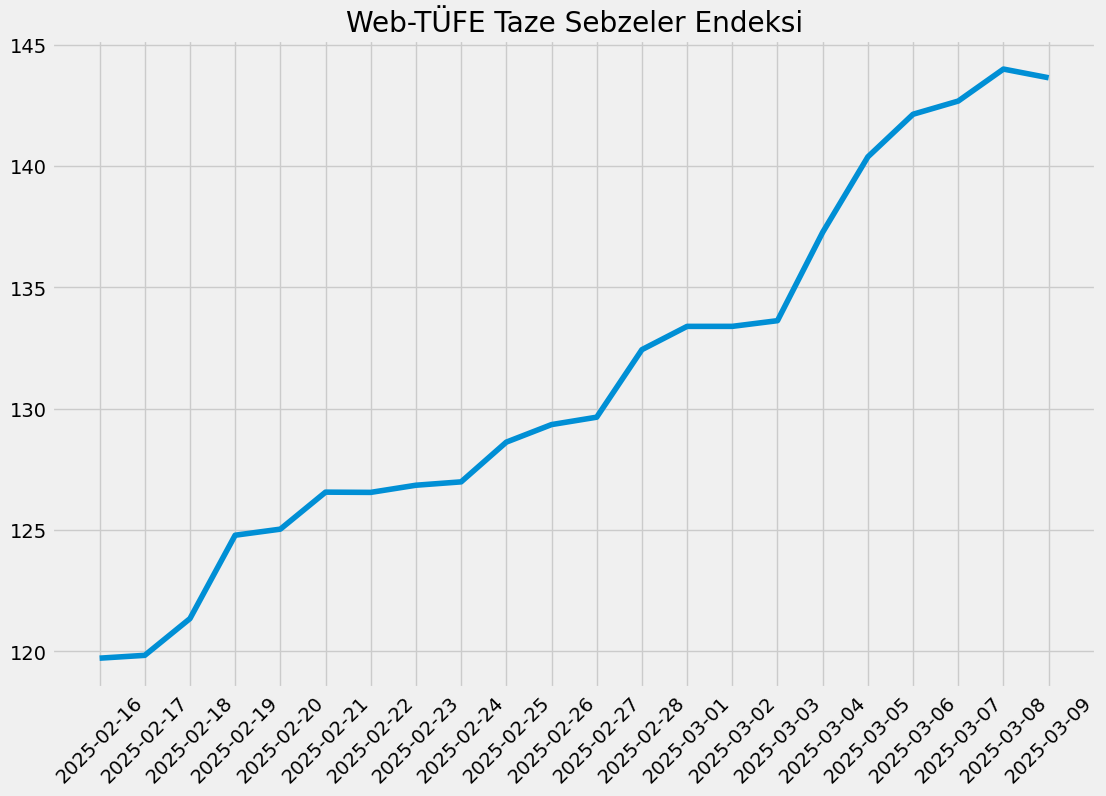

In [117]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,8))
plt.title("Web-TÜFE Taze Sebzeler Endeksi")
plt.plot(weighted_indices["Taze sebzeler (patates hariç)"].loc["2025-02-16":])

plt.xticks(weighted_indices["Taze sebzeler (patates hariç)"].loc["2025-02-16":].index,rotation=45)

In [119]:
gfe.loc["2025-03"].mean()/gfe.loc["2025-02-01":"2025-02-24"].mean()

GFE    1.042608
dtype: float64

In [17]:
f=data1.loc["Fındık Ezmesi"].drop_duplicates(["Ürün"])
data1=data1.drop("Fındık Ezmesi",axis=0)
data1=pd.concat([data1,f],axis=0)

In [18]:
data1.to_csv("sepet.csv")

In [81]:
import pandas as pd




import os
import glob

# Dosya yolu
dosya_yolu = 'C:/Users/Bora/Downloads'  # Burada kendi dosya yolunuzu belirtin
datam=pd.DataFrame()
# Dosya yolundaki .xls uzantılı dosyaların isimlerini almak
xls_dosyalari = glob.glob(os.path.join(dosya_yolu, '*.xls'))
for file in xls_dosyalari:
    df=pd.read_html(file)[0]
    df.index=[df.iloc[0,0][16:].split("(")[0][:-1]]*len(df)
    df.index=pd.to_datetime(df.index,dayfirst=True)
    df.columns=df.iloc[1].values
    df=df.iloc[2:]
    df["Ortalama Fiyat"]=df["Ortalama Fiyat"].astype(float)/100
    df["İşlem Hacmi"]=df["İşlem Hacmi"].astype(float)
    df["Hacimli"]=df["İşlem Hacmi"]*df["Ortalama Fiyat"]
    df["Tarih"]=df.index.strftime("%Y-%m-%d")
    df=df.set_index("Ürün Adı")
    df["Ağırlıklı Fiyat"]=df.groupby("Ürün Adı")["Hacimli"].sum()/df.groupby("Ürün Adı")["İşlem Hacmi"].sum()
    df["Ürün Adı"]=df.index
    df=df.set_index("Tarih")
    datam=pd.concat([datam,df],axis=0)

datam



,Ürün Cinsi,Ürün Türü,Ortalama Fiyat,İşlem Hacmi,Birim Adı,Hacimli,Ağırlıklı Fiyat,Ürün Adı
Tarih,,,,,,,,
2025-03-09,ACUR,Geleneksel(Konvansiyonel),10.00,1464.0,Kg,14640.00,10.000000,ACUR
2025-03-09,ADAÇAYI (YAŞ-TAZE),Geleneksel(Konvansiyonel),61.50,81.0,Kg,4981.50,70.820611,ADAÇAYI (YAŞ-TAZE)
2025-03-09,ADAÇAYI (YAŞ-TAZE),İyi Tarım,85.92,50.0,Kg,4296.00,70.820611,ADAÇAYI (YAŞ-TAZE)
2025-03-09,AHUDUDU(FRAMBUAZ),Geleneksel(Konvansiyonel),1841.00,102.0,Kg,187782.00,1153.887914,AHUDUDU(FRAMBUAZ)
2025-03-09,AHUDUDU(FRAMBUAZ),İyi Tarım,1035.70,593.0,Kg,614170.10,1153.887914,AHUDUDU(FRAMBUAZ)
...,...,...,...,...,...,...,...,...
2025-03-09,YEŞİL KABUKLU FINDIK,Geleneksel(Konvansiyonel),37.55,417.0,Kg,15658.35,37.550000,YEŞİL KABUKLU FINDIK
2025-03-09,YEŞİL SOĞAN,Geleneksel(Konvansiyonel),46.30,169448.0,Kg,7845442.40,46.063396,YEŞİL SOĞAN
2025-03-09,YEŞİL SOĞAN,İyi Tarım,28.70,2309.0,Kg,66268.30,46.063396,YEŞİL SOĞAN


In [82]:
datam=datam.sort_index()
datam=datam.iloc[:,[-1,-2]]
datam=datam.drop_duplicates(keep="first")

In [83]:
w=pd.read_excel("Weights_2022.xlsx").iloc[4:132,[1,5]]
w=w.fillna(method="ffill")
sebzeler=pd.DataFrame()
import numpy as np
for sebze in w[w["Unnamed: 5"]=="Taze sebzeler (patates hariç)"]["Unnamed: 1"].values:
    if sebze=="Çarliston Biber":
        sebze="Biber Çarliston"
    elif sebze=="Dolmalık Biber":
        sebze="Biber Dolmalık"
    elif sebze=="Sivri Biber":
        sebze="Biber Sivri"   
    elif sebze=="Taze Fasulye":
        sebze="Fasulye Taze" 
    elif sebze=="Kuru Soğan":
        sebze="Soğan Kuru"
    elif sebze=="Kırmızı Turp":
        sebze="turp"
    
    hal=pd.DataFrame(datam[datam["Ürün Adı"].str.contains(sebze,case=False)])
    hal=hal.groupby("Tarih")["Ağırlıklı Fiyat"].mean()

    hal=pd.DataFrame(hal).T
    hal.index=[sebze]*len(hal)


  
    print(f"{sebze} verisi bulundu")
    sebzeler=pd.concat([sebzeler,hal],axis=0)
  

sebzeler.index=w[w["Unnamed: 5"]=="Taze sebzeler (patates hariç)"]["Unnamed: 1"].values
sebzeler["Ürün"]=f"HKS" + sebzeler.index

Biber Çarliston verisi bulundu
Biber Dolmalık verisi bulundu
Biber Sivri verisi bulundu
Dereotu verisi bulundu
Domates verisi bulundu
Fasulye Taze verisi bulundu
Havuç verisi bulundu
Ispanak verisi bulundu
Kabak verisi bulundu
Karnabahar verisi bulundu
Soğan Kuru verisi bulundu
Beyaz Lahana verisi bulundu
Kırmızı Lahana verisi bulundu
Mantar verisi bulundu
Kıvırcık verisi bulundu
Maydanoz verisi bulundu
Nane verisi bulundu
Patlıcan verisi bulundu
Pırasa verisi bulundu
Roka verisi bulundu
Salatalık verisi bulundu
Sarımsak verisi bulundu
turp verisi bulundu


In [84]:
w=pd.read_excel("Weights_2022.xlsx").iloc[4:132,[1,5]]
w=w.fillna(method="ffill")
meyveler=pd.DataFrame()
import numpy as np
for meyve in w[w["Unnamed: 5"]=="Taze Meyveler"]["Unnamed: 1"].values:
    if sebze=="Çarliston Biber":
        sebze="Biber Çarliston"
    elif sebze=="Dolmalık Biber":
        sebze="Biber Dolmalık"
    elif sebze=="Sivri Biber":
        sebze="Biber Sivri"   
    elif sebze=="Taze Fasulye":
        sebze="Fasulye Taze" 
    elif sebze=="Kuru Soğan":
        sebze="Soğan Kuru"
    elif sebze=="Kırmızı Turp":
        sebze="turp"
    
    hal=pd.DataFrame(datam[datam["Ürün Adı"].str.contains(meyve,case=False)])
    hal=hal.groupby("Tarih")["Ağırlıklı Fiyat"].mean()

    hal=pd.DataFrame(hal).T
    hal.index=[meyve]*len(hal)


  
    print(f"{meyve} verisi bulundu")
    meyveler=pd.concat([meyveler,hal],axis=0)
  

meyveler.index=w[w["Unnamed: 5"]=="Taze Meyveler"]["Unnamed: 1"].values
meyveler["Ürün"]=f"HKS" + meyveler.index

Portakal verisi bulundu
Üzüm verisi bulundu
Armut verisi bulundu
Ayva verisi bulundu
Çilek verisi bulundu
Elma verisi bulundu
Karpuz verisi bulundu
Kavun verisi bulundu
Kivi verisi bulundu
Limon verisi bulundu
Mandalina verisi bulundu
Muz verisi bulundu
Nar verisi bulundu
Şeftali verisi bulundu


In [85]:
sebzeler.index=w[w["Unnamed: 5"]=="Taze sebzeler (patates hariç)"]["Unnamed: 1"].values
sebzeler["Ürün"]=f"HKS" + sebzeler.index

meyveler.index=w[w["Unnamed: 5"]=="Taze Meyveler"]["Unnamed: 1"].values
meyveler["Ürün"]=f"HKS" + meyveler.index

In [86]:
data=pd.read_csv("sepet.csv",index_col=0)

In [87]:
data=data[~data["Ürün"].str.contains("Ankara Hal|İBB")]

In [ ]:
bugün="2025-03-09"
for sebze in sebzeler.index:
    urunler_df=pd.DataFrame(sebzeler.loc[sebze]).T
    data=veriekle(sebze,data,urunler_df)


for meyve in meyveler.index:
    urunler_df=pd.DataFrame(meyveler.loc[meyve]).T
    data=veriekle(meyve,data,urunler_df)


In [95]:
data.to_csv("sepet.csv")

In [94]:
data.dropna(how="all")

,Ürün,2025-01-06,2025-01-07,2025-01-09,2025-01-10,2025-01-11,2025-01-12,2025-01-13,2025-01-14,2025-01-15,...,2025-02-28,2025-03-01,2025-03-02,2025-03-03,2025-03-04,2025-03-05,2025-03-06,2025-03-07,2025-03-08,2025-03-09
Pasta,Alaçatı Damla Sakızlı Kurabiye,119.95,119.95,119.95,119.95,119.95,119.95,119.95,119.95,119.95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pasta,Alaçatı Kurabiyecisi Çıtır Top Kurabiye 180 G,119.95,119.95,119.95,119.95,119.95,119.95,119.95,119.95,119.95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pasta,Alaçatı Simit Tuzlu Kurabiye 250 G,119.95,119.95,119.95,119.95,119.95,119.95,119.95,119.95,119.95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pasta,Alaçatı Tahinli Cevizli Kurabiye 200G,119.95,119.95,119.95,119.95,119.95,119.95,119.95,119.95,119.95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pasta,Alaçatı Tahinli Kurabiye 250 G,119.95,119.95,119.95,119.95,119.95,119.95,119.95,119.95,119.95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Şeftali,Çilek kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,199.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Şeftali,İthal Muz kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,109.9,109.9,109.9,109.9,109.9,109.9,NaN,NaN,109.900000,109.9
Şeftali,Şeftali Kg,69.95,69.95,69.95,69.95,69.95,69.95,69.95,69.95,69.95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Şeftali,Şeftali Nektarin Kg,69.95,69.95,69.95,69.95,69.95,69.95,69.95,69.95,69.95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [407]:
sebzeler=sebzeler.iloc[:,402:]

In [408]:
sebzeler=sebzeler.drop("2025-01-08",axis=1)
sebzeler["Ürün"]=f"HKS" + sebzeler.index

In [409]:
cols=["Ürün"]
cols.extend(sebzeler.columns[:-1])
sebzeler=sebzeler[cols]


In [410]:
data=pd.concat([data,sebzeler[cols]],axis=0).sort_index()
data

,Ürün,2025-01-06,2025-01-07,2025-01-09,2025-01-10,2025-01-11,2025-01-12,2025-01-13,2025-01-14,2025-01-15,...,2025-03-01,2025-03-02,2025-03-03,2025-03-04,2025-03-05,2025-03-06,2025-03-07,2025-03-08,2025-02-17,2025-02-18
Antep Fıstığı,Migros Antep Fıstığı Jumbo 200 G,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,...,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,NaN,NaN
Antep Fıstığı,Tadım Antep Fıstığı 180 gr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,216.20,216.20,216.20,216.20,216.20,216.20,216.20,216.20,NaN,NaN
Antep Fıstığı,Tadım Antep Fıstığı 180 G,187.95,187.95,187.95,187.95,187.95,187.95,187.95,187.95,187.95,...,187.95,187.95,187.95,187.95,187.95,187.95,187.95,187.95,NaN,NaN
Antep Fıstığı,Tadım Antep Fıstığı 122 gr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,147.20,147.20,147.20,147.20,147.20,147.20,147.20,147.20,NaN,NaN
Antep Fıstığı,Migros Kavrulmuş Antep Fıstığı 150 G,99.50,99.50,99.50,99.50,99.50,99.50,99.50,99.50,99.50,...,99.50,99.50,99.50,99.50,99.50,99.50,99.50,99.50,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Şehriye,Mutlu Arpa Şehriye 500 G,19.50,19.50,19.50,19.50,19.50,19.50,19.50,19.50,19.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Şehriye,Migros Tel Şehriye 500 G,11.75,11.75,11.75,11.75,11.75,11.75,11.75,11.75,11.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Şehriye,Migros Tel Şehriye 500 G,11.75,11.75,11.75,11.75,11.75,11.75,11.75,11.75,11.75,...,12.95,12.95,12.95,12.95,12.95,12.95,12.95,12.95,NaN,NaN
Şehriye,Migros Arpa Şehriye 500 G,11.75,11.75,11.75,11.75,11.75,11.75,11.75,11.75,11.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [417]:
data.iloc[:,-36:]

,2025-02-01,2025-02-02,2025-02-03,2025-02-04,2025-02-05,2025-02-06,2025-02-07,2025-02-08,2025-02-09,2025-02-10,...,2025-03-01,2025-03-02,2025-03-03,2025-03-04,2025-03-05,2025-03-06,2025-03-07,2025-03-08,2025-02-17,2025-02-18
Antep Fıstığı,NaN,NaN,NaN,NaN,NaN,143.00,143.00,143.00,143.00,143.00,...,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,NaN,NaN
Antep Fıstığı,210.55,210.55,210.55,210.55,210.55,210.55,210.55,210.55,210.55,210.55,...,216.20,216.20,216.20,216.20,216.20,216.20,216.20,216.20,NaN,NaN
Antep Fıstığı,NaN,NaN,NaN,NaN,NaN,187.95,187.95,187.95,187.95,187.95,...,187.95,187.95,187.95,187.95,187.95,187.95,187.95,187.95,NaN,NaN
Antep Fıstığı,143.35,143.35,143.35,143.35,143.35,143.35,143.35,143.35,143.35,143.35,...,147.20,147.20,147.20,147.20,147.20,147.20,147.20,147.20,NaN,NaN
Antep Fıstığı,NaN,NaN,NaN,NaN,NaN,99.50,99.50,99.50,99.50,99.50,...,99.50,99.50,99.50,99.50,99.50,99.50,99.50,99.50,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Şehriye,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Şehriye,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Şehriye,12.95,12.95,12.95,12.95,12.95,12.95,12.95,12.95,12.95,12.95,...,12.95,12.95,12.95,12.95,12.95,12.95,12.95,12.95,NaN,NaN
Şehriye,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [427]:
ağırlıklar=pd.read_csv("ağırlıklar.csv")
ağırlıklar=ağırlıklar.set_index(ağırlıklar["Ürün"])
ağırlıklar=ağırlıklar.drop("Ürün",axis=1)
ağırlıklar=ağırlıklar.sort_index()



gfe=pd.read_csv("gfe.csv")
gfe=gfe.set_index(pd.to_datetime(gfe["Tarih"]))
gfe=gfe.drop("Tarih",axis=1)






data1=data.copy()
data1=data1.iloc[:,:-2]


data1=data1.drop_duplicates() 
degisim=data1.iloc[:,1:].pct_change(axis=1)+1

from scipy.stats import gmean
temp1=(np.exp(np.log(degisim.dropna())).groupby(level=0).apply(lambda x: np.prod(x)**(1 / len(x))))
df=ağırlıklar.loc[temp1.index]
df["Ağırlık"]=df["Ağırlık"]/df["Ağırlık"].sum()
temp1=(temp1-1)*100
temp=np.sum(df["Ağırlık"].sort_index()*temp1.sort_index())

grup_degisim=((data1.iloc[:,1:].pct_change(axis=1)+1)).dropna()
grup_degisim=((grup_degisim).groupby(level=0).apply(lambda x: np.prod(x)**(1/len(x))).sort_index()-1)*100


degisim=(degisim-1)*100
degisim=degisim.fillna(temp)
degisim=(degisim).groupby(level=0).mean()






In [435]:
ağırlıklar

,Unnamed: 0.1,Unnamed: 0,Ağırlık,Değişim,Endeks_2024-10-31,Ağırlıklı Endeks_2024-10-31,Endeks_2024-11-01,Ağırlıklı Endeks_2024-11-01,Endeks_2024-11-02,Ağırlıklı Endeks_2024-11-02,...,Endeks_2025-03-04,Ağırlıklı Endeks_2025-03-04,Endeks_2025-03-05,Ağırlıklı Endeks_2025-03-05,Endeks_2025-03-06,Ağırlıklı Endeks_2025-03-06,Endeks_2025-03-07,Ağırlıklı Endeks_2025-03-07,Endeks_2025-03-08,Ağırlıklı Endeks_2025-03-08
Ürün,,,,,,,,,,,,,,,,,,,,,
Antep Fıstığı,0,0,0.001857,0.000000,100.0,0.185691,100.000000,0.185691,100.000000,0.185691,...,103.498494,0.192187,103.498494,0.192187,102.882380,0.191043,102.882380,0.191043,102.882380,0.191043
Armut,1,1,0.002484,0.780701,100.0,0.248447,99.663073,0.247610,99.663073,0.247610,...,100.042928,0.248554,100.053550,0.248580,100.053550,0.248580,100.517148,0.249732,101.301886,0.251682
Ay Çekirdeği,2,2,0.006820,0.001921,100.0,0.682045,98.857143,0.674250,98.857143,0.674250,...,104.011844,0.709407,103.780728,0.707831,103.783590,0.707851,103.784664,0.707858,103.786657,0.707872
Ayran,3,3,0.001662,0.000000,100.0,0.166171,100.000000,0.166171,100.000000,0.166171,...,120.926818,0.200946,121.124824,0.201275,120.848517,0.200815,120.848517,0.200815,120.848517,0.200815
Ayva,4,4,0.000922,0.013446,100.0,0.092174,100.000000,0.092174,100.000000,0.092174,...,113.887780,0.104975,114.186383,0.105250,114.208425,0.105271,114.216698,0.105278,114.232056,0.105293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Çikolata Tablet,123,123,0.011459,0.022641,100.0,1.145925,100.000000,1.145925,100.000000,1.145925,...,111.660799,1.279549,111.699771,1.279995,111.703708,1.280040,111.512262,1.277847,111.537510,1.278136
Çilek,124,124,0.003439,-0.654022,100.0,0.343934,100.000000,0.343934,100.000000,0.343934,...,128.282827,0.441208,133.418829,0.458873,123.749396,0.425616,119.469993,0.410898,118.688632,0.408211
Üzüm,125,125,0.006461,0.000000,100.0,0.646115,100.000000,0.646115,100.000000,0.646115,...,103.029597,0.665689,103.029597,0.665689,103.029597,0.665689,103.029597,0.665689,103.029597,0.665689


In [456]:
gfe.loc["2025-01-06":]

,GFE
Tarih,
2025-01-06,108.460554
2025-01-07,108.690986
2025-01-08,109.150418
2025-01-09,109.312913
2025-01-10,109.266689
...,...
2025-03-04,116.943544
2025-03-05,117.598200
2025-03-06,117.952234


In [455]:
((np.array(deg)/100)+1).prod()

1.0842097824500014

In [449]:
deg=[]
for i in range(1,len(degisim.columns)):
    deg.append((degisim.iloc[:,i]*ağırlıklar["Ağırlık"]).sum())



In [232]:
ağırlıklar=pd.read_csv("ağırlıklar.csv",index_col=0)
ağırlıklar=ağırlıklar.loc[w[w["Unnamed: 5"]=="Taze Meyveler"]["Unnamed: 1"].values]
ağırlıklar["Ağırlık"]=ağırlıklar["Ağırlık"]/ağırlıklar["Ağırlık"].sum()
ağırlıklar

,Unnamed: 0.1,Unnamed: 0,Ağırlık,Değişim,Endeks_2024-10-31,Ağırlıklı Endeks_2024-10-31,Endeks_2024-11-01,Ağırlıklı Endeks_2024-11-01,Endeks_2024-11-02,Ağırlıklı Endeks_2024-11-02,...,Endeks_2025-03-04,Ağırlıklı Endeks_2025-03-04,Endeks_2025-03-05,Ağırlıklı Endeks_2025-03-05,Endeks_2025-03-06,Ağırlıklı Endeks_2025-03-06,Endeks_2025-03-07,Ağırlıklı Endeks_2025-03-07,Endeks_2025-03-08,Ağırlıklı Endeks_2025-03-08
Ürün,,,,,,,,,,,,,,,,,,,,,
Portakal,88,88,0.096296,0.782870,100.0,0.760018,100.000000,0.760018,100.000000,0.760018,...,124.071745,0.942967,130.984021,0.995502,130.984021,0.995502,127.958287,0.972506,128.960033,0.980119
Üzüm,125,125,0.081864,0.000000,100.0,0.646115,100.000000,0.646115,100.000000,0.646115,...,103.029597,0.665689,103.029597,0.665689,103.029597,0.665689,103.029597,0.665689,103.029597,0.665689
Armut,1,1,0.031479,0.780701,100.0,0.248447,99.663073,0.247610,99.663073,0.247610,...,100.042928,0.248554,100.053550,0.248580,100.053550,0.248580,100.517148,0.249732,101.301886,0.251682
Ayva,4,4,0.011679,0.013446,100.0,0.092174,100.000000,0.092174,100.000000,0.092174,...,113.887780,0.104975,114.186383,0.105250,114.208425,0.105271,114.216698,0.105278,114.232056,0.105293
Çilek,124,124,0.043577,-0.654022,100.0,0.343934,100.000000,0.343934,100.000000,0.343934,...,128.282827,0.441208,133.418829,0.458873,123.749396,0.425616,119.469993,0.410898,118.688632,0.408211
Elma,27,27,0.131617,0.844521,100.0,1.038787,100.000000,1.038787,100.000000,1.038787,...,112.989852,1.173724,113.847982,1.182638,114.515828,1.189576,113.181025,1.175710,114.136863,1.185639
Karpuz,46,46,0.135227,0.000000,100.0,1.067280,100.000000,1.067280,100.000000,1.067280,...,130.769231,1.395674,130.885848,1.396919,136.709468,1.459073,136.709468,1.459073,136.709468,1.459073
Kavun,47,47,0.062159,0.013446,100.0,0.490588,100.000000,0.490588,100.000000,0.490588,...,147.025827,0.721291,147.091384,0.721613,147.119778,0.721752,147.130436,0.721804,147.150219,0.721901
Kivi,53,53,0.009339,1.251251,100.0,0.073712,100.000000,0.073712,100.000000,0.073712,...,114.470998,0.084379,118.290316,0.087194,118.290316,0.087194,118.290316,0.087194,119.770425,0.088285


In [235]:
meyveenf2=[]
for i in range(397,len(meyveler.columns)):
    meyveenf2.append((meyveler.iloc[:,i]*ağırlıklar["Ağırlık"].values).sum())
meyveenf2=pd.DataFrame(meyveenf2)
meyveenf2=meyveenf2.set_index(pd.date_range(start="2025-01-01",freq="D",periods=len(meyveenf2)))
meyveenf2

,0
2025-01-01,49.433870
2025-01-02,56.301638
2025-01-03,63.239499
2025-01-04,52.835702
2025-01-05,66.242028
...,...
2025-03-04,64.651994
2025-03-05,58.184456
2025-03-06,75.796935
2025-03-07,68.450731


In [328]:
meyve=pd.concat([meyveenf,meyveenf2],axis=0)

In [219]:
enf=pd.concat([enf,enf2],axis=0)

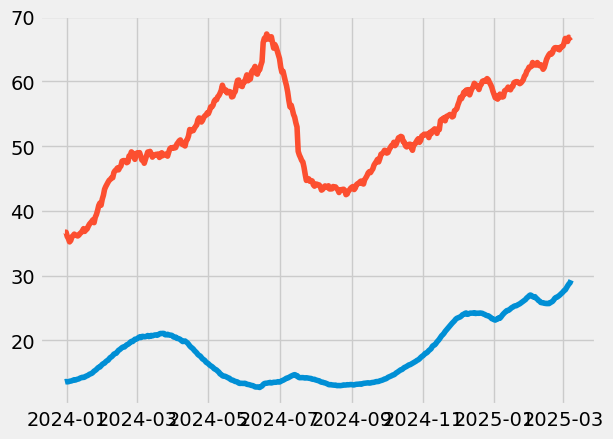

In [329]:
plt.plot(enf.rolling(30).mean())
plt.plot(meyve.rolling(30).mean())

In [287]:
sebze=enf.resample('M').mean().pct_change().dropna()*100
meyve=meyve.resample('M').mean().pct_change().dropna()*100

In [283]:
enf.resample('M').mean().pct_change(12).dropna()*100

,0
2024-12-31,71.236189
2025-01-31,64.669877
2025-02-28,35.346072
2025-03-31,56.482853


In [313]:
data=pd.read_excel("harcama gruplarina gore endeks sonuclari.xlsx")
data.columns=data.iloc[2]
data=data.iloc[4:]
data=data.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(data)))
tüik=data[["Taze meyveler","Taze sebzeler (patates hariç)"]].pct_change().dropna().loc["2024":]*100

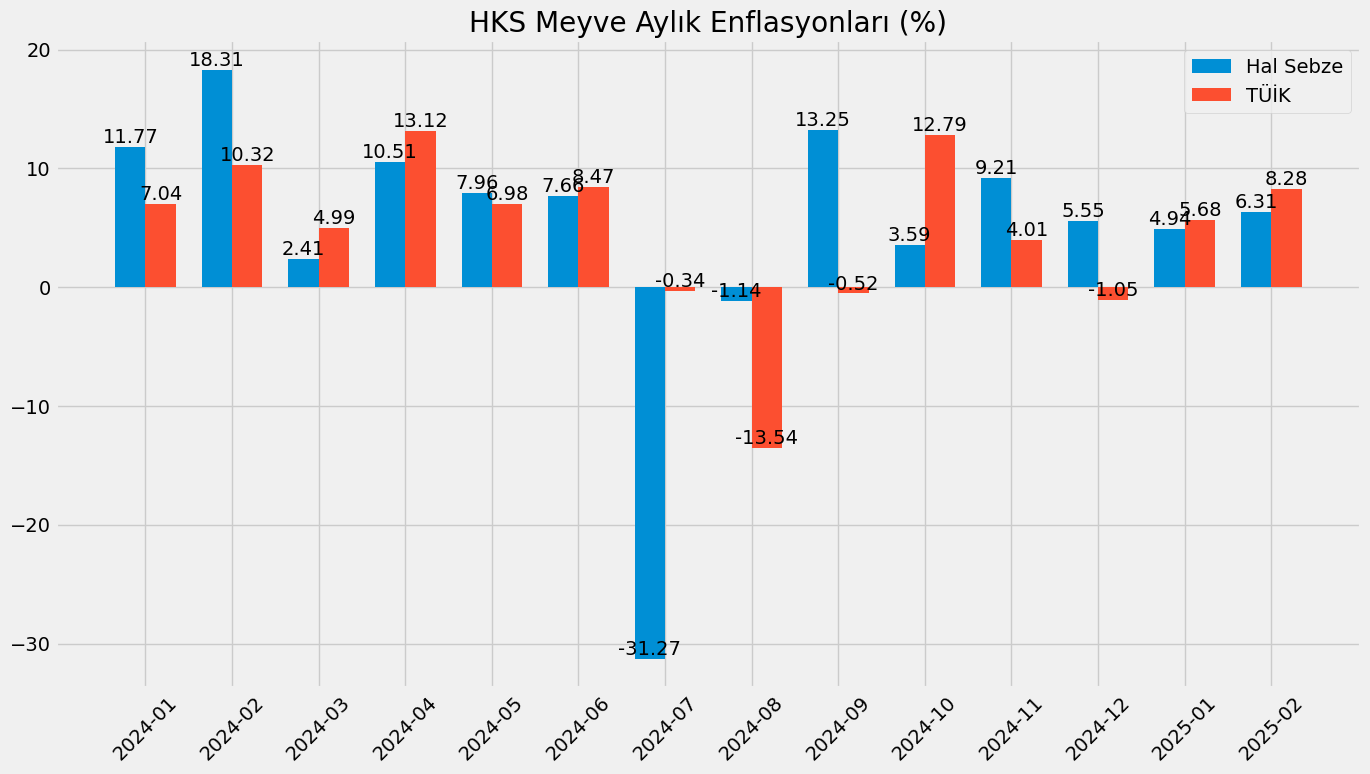

In [324]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("fivethirtyeight")
plt.figure(figsize=(15, 8))
plt.title("HKS Meyve Aylık Enflasyonları (%)")

# Define the bar width
bar_width = 0.35

# Define the x positions for each bar group
x_sebze = np.arange(len(meyve[:-1]))
x_meyve = x_sebze + bar_width # Offset for 'meyve' bars

# Plot the 'sebze' data
plt.bar(x_sebze, meyve.values.flatten()[:-1], width=bar_width, label='Hal Sebze')

# Plot the 'meyve' data
plt.bar(x_meyve, tüik["Taze meyveler"].values.flatten(), width=bar_width, label='TÜİK')

# Add the values above the bars
for i, value in enumerate(meyve.values.flatten()[:-1]):
    plt.text(x_sebze[i], value, f'{value:.2f}', ha='center', va='bottom')

for i, value in enumerate(tüik["Taze meyveler"].values.flatten()):
    plt.text(x_meyve[i], value, f'{value:.2f}', ha='center', va='bottom')

meyve.index = pd.to_datetime(meyve.index)  # Ensure index is datetime if not already
plt.xticks(x_sebze + bar_width / 2, meyve.index.strftime('%Y-%m')[:-1], rotation=45)

# Add a legend to differentiate the bars
plt.legend()

plt.show()  # Display the plot


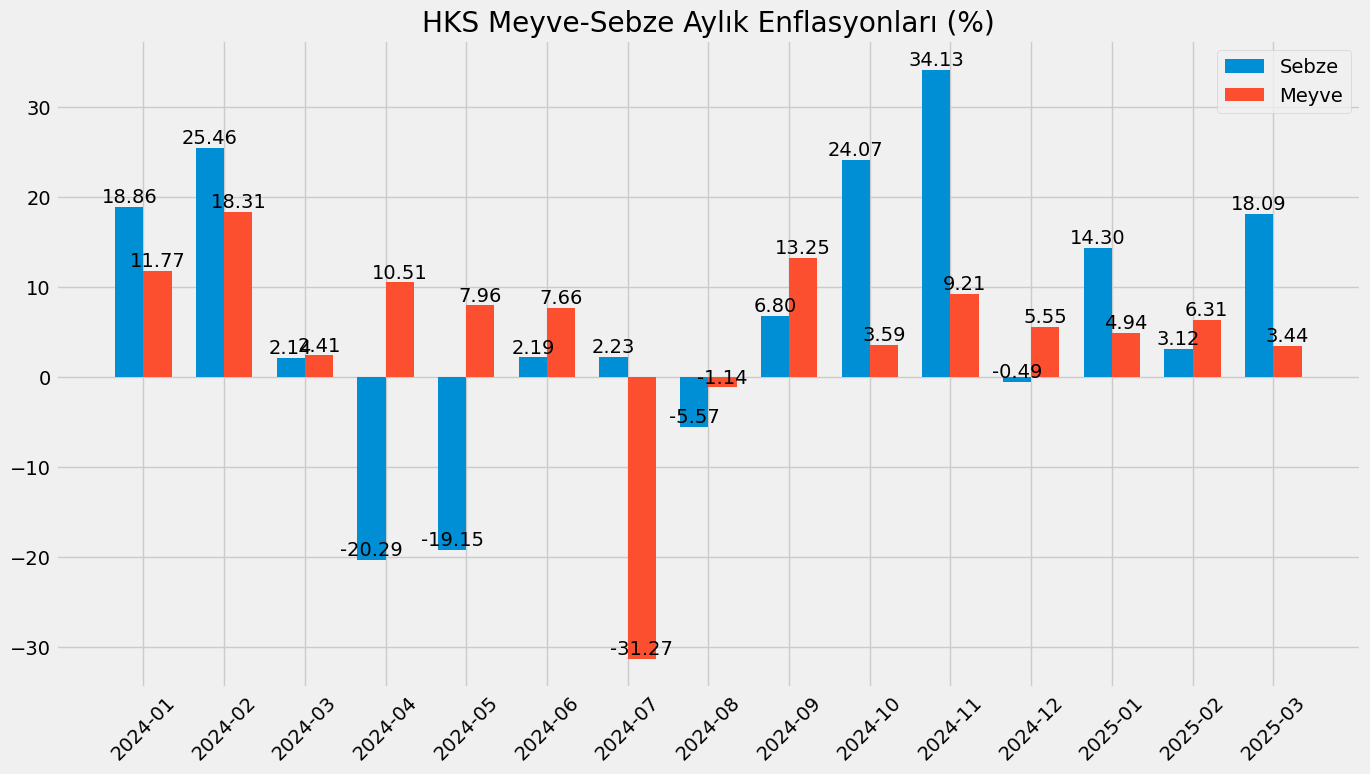

In [292]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("fivethirtyeight")
plt.figure(figsize=(15, 8))
plt.title("HKS Meyve-Sebze Aylık Enflasyonları (%)")

# Define the bar width
bar_width = 0.35

# Define the x positions for each bar group
x_sebze = np.arange(len(sebze))
x_meyve = x_sebze + bar_width # Offset for 'meyve' bars

# Plot the 'sebze' data
plt.bar(x_sebze, sebze.values.flatten(), width=bar_width, label='Sebze')

# Plot the 'meyve' data
plt.bar(x_meyve, meyve.values.flatten(), width=bar_width, label='Meyve')

# Add the values above the bars
for i, value in enumerate(sebze.values.flatten()):
    plt.text(x_sebze[i], value, f'{value:.2f}', ha='center', va='bottom')

for i, value in enumerate(meyve.values.flatten()):
    plt.text(x_meyve[i], value, f'{value:.2f}', ha='center', va='bottom')

sebze.index = pd.to_datetime(sebze.index)  # Ensure index is datetime if not already
plt.xticks(x_sebze + bar_width / 2, sebze.index.strftime('%Y-%m'), rotation=45)

# Add a legend to differentiate the bars
plt.legend()

plt.show()  # Display the plot


In [ ]:

# WebDriver'ı başlat
driver = webdriver.Chrome()  # veya kullandığınız tarayıcıya uygun WebDriver'ı seçin
driver.get("https://www.ankara.bel.tr/hal-fiyatlari")

# Başlangıç tarihini belirle
start_date = datetime.now()

# Verileri saklamak için boş bir liste oluştur
all_data = []

# 7 gün boyunca verileri çek
for i in range(1):
    # Başlangıç tarihini hesapla
    current_start_date = start_date 
    current_start_date_str = current_start_date.strftime("%d.%m.%Y")

    # Bitiş tarihini hesapla (7 gün sonra)
    end_date = current_start_date 
    end_date_str = end_date.strftime("%d.%m.%Y")

    # Başlangıç tarihini girin
    start_date_input = driver.find_element(By.NAME, "start_date")
    start_date_input.clear()
    start_date_input.send_keys(current_start_date_str)

    # Bitiş tarihini girin
    end_date_input = driver.find_element(By.NAME, "end_date")
    end_date_input.clear()
    end_date_input.send_keys(end_date_str)

    # Arama butonuna tıklayın
    search_button = driver.find_element(By.CSS_SELECTOR, "button.btn.btn-primary")
    search_button.click()

    # Sayfanın yüklenmesini bekleyin
    WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CLASS_NAME, "table-responsive"))
    )

    # Tablodaki verileri çek
    table = driver.find_element(By.CLASS_NAME, "table-responsive")
    rows = table.find_elements(By.TAG_NAME, "tr")

    # Tablodaki verileri oku ve listeye ekle
    for row in rows:
        cols = row.find_elements(By.TAG_NAME, "td")
        if cols:  # Sadece veri satırlarını al (başlık satırını atla)
            row_data = [col.text for col in cols]
            row_data.append(current_start_date_str)  # Tarih bilgisini ekle
            all_data.append(row_data)

# WebDriver'ı kapat
driver.quit()

# Verileri DataFrame'e dönüştür
columns = ["Cinsi", "Birim", "Asgari (₺)", "Azami (₺)", "Tarih","Bitiş"]
try:
    df = pd.DataFrame(all_data, columns=columns)

    df["Asgari (₺)"]=df["Asgari (₺)"].str.replace(",",".").astype(float)
    df["Azami (₺)"]=df["Azami (₺)"].str.replace(",",".").astype(float)
    df["Fiyat"]=0.5*df["Asgari (₺)"]+0.5*df["Azami (₺)"]
    sebzeler=pd.DataFrame()
    w=pd.read_excel("Weights_2022.xlsx").iloc[4:132,[1,5]]
    w=w.fillna(method="ffill")
    df=df[["Cinsi","Fiyat","Tarih"]]
    df=df.sort_index()
    df["Tarih"] = pd.to_datetime(df["Tarih"],dayfirst=True).dt.strftime("%Y-%m-%d")
    df=df.set_index("Tarih")
    for sebze in w[w["Unnamed: 5"]=="Taze sebzeler (patates hariç)"]["Unnamed: 1"].values:
        hal=pd.DataFrame(df[df["Cinsi"].str.contains(sebze)]).groupby(level=0)["Fiyat"].mean()
        hal=pd.DataFrame(hal)
        hal=hal.sort_index()
        hal=hal.T
        hal=hal[np.sort(hal.columns.values)]
        hal["Ürün"]=f"Ankara Hal {sebze}"
        hal=hal.reset_index()
        hal.index.name=None
        hal.columns.name = None
        del hal["index"]
        hal.index=[f"{sebze}"]
        sira = ['Ürün'] + [col for col in hal.columns if col != 'Ürün']


        hal = hal[sira]
        if hal.shape[1]>1:
            print(f"{sebze} verisi bulundu")
            sebzeler=pd.concat([sebzeler,hal],axis=0)
        else:
            print(f"{sebze} verisi yok")
    sebzeler=sebzeler[np.sort(sebzeler.columns.values)]

    sira = ['Ürün'] + [col for col in sebzeler.columns if col != 'Ürün']


    sebzeler = sebzeler[sira]

    for sebze in sebzeler.index:
        urunler_df=pd.DataFrame(sebzeler.loc[sebze]).T
        data=veriekle(sebze,data,urunler_df)


    dolma=df[df["Cinsi"].str.contains("Çarliston")].groupby(level=0)["Fiyat"].mean()
    sebze="Çarliston Biber"
    hal=pd.DataFrame(dolma)
    hal=hal.T
    hal["Ürün"]=f"Ankara Hal {sebze}"
    hal=hal.reset_index()
    hal.index.name=None
    hal.columns.name = None
    del hal["index"]
    hal.index=[f"{sebze}"]
    hal=hal[np.sort(hal.columns.values)]
    sira = ['Ürün'] + [col for col in hal.columns if col != 'Ürün']
    hal = hal[sira]

    data=veriekle(sebze,data,hal)

    dolma=df[df["Cinsi"].str.contains("Biber Dolma")].groupby(level=0)["Fiyat"].mean()
    sebze="Dolmalık Biber"
    hal=pd.DataFrame(dolma)
    hal=hal.T
    hal["Ürün"]=f"Ankara Hal {sebze}"
    hal=hal.reset_index()
    hal.index.name=None
    hal.columns.name = None
    del hal["index"]
    hal.index=[f"{sebze}"]
    hal=hal[np.sort(hal.columns.values)]
    sira = ['Ürün'] + [col for col in hal.columns if col != 'Ürün']
    hal = hal[sira]
    data=veriekle(sebze,data,hal)

    dolma=df[df["Cinsi"].str.contains("Biber Sivri")].groupby(level=0)["Fiyat"].mean()
    sebze="Sivri Biber"
    hal=pd.DataFrame(dolma)
    hal=hal.T
    hal["Ürün"]=f"Ankara Hal {sebze}"
    hal=hal.reset_index()
    hal.index.name=None
    hal.columns.name = None
    del hal["index"]
    hal.index=[f"{sebze}"]
    hal=hal[np.sort(hal.columns.values)]
    sira = ['Ürün'] + [col for col in hal.columns if col != 'Ürün']
    hal = hal[sira]
    data=veriekle(sebze,data,hal)

    dolma=df[df["Cinsi"].str.contains("Fasulye")].groupby(level=0)["Fiyat"].mean()
    sebze="Taze Fasulye"
    hal=pd.DataFrame(dolma)
    hal=hal.T
    hal["Ürün"]=f"Ankara Hal {sebze}"
    hal=hal.reset_index()
    hal.index.name=None
    hal.columns.name = None
    del hal["index"]
    hal.index=[f"{sebze}"]
    hal=hal[np.sort(hal.columns.values)]
    sira = ['Ürün'] + [col for col in hal.columns if col != 'Ürün']
    hal = hal[sira]
    data=veriekle(sebze,data,hal)

    dolma=df[df["Cinsi"].str.contains("Soğan Kuru")].groupby(level=0)["Fiyat"].mean()
    sebze="Kuru Soğan"
    hal=pd.DataFrame(dolma)
    hal=hal.T
    hal["Ürün"]=f"Ankara Hal {sebze}"
    hal=hal.reset_index()
    hal.index.name=None
    hal.columns.name = None
    del hal["index"]
    hal.index=[f"{sebze}"]
    hal=hal[np.sort(hal.columns.values)]
    sira = ['Ürün'] + [col for col in hal.columns if col != 'Ürün']
    hal = hal[sira]
    data=veriekle(sebze,data,hal)

    dolma=df[(df["Cinsi"].str.contains("Lahana")) & (df["Cinsi"].str.contains("Beyaz"))].groupby(level=0)["Fiyat"].mean()
    sebze="Beyaz Lahana"
    hal=pd.DataFrame(dolma)
    hal=hal.T
    hal["Ürün"]=f"Ankara Hal {sebze}"
    hal=hal.reset_index()
    hal.index.name=None
    hal.columns.name = None
    del hal["index"]
    hal.index=[f"{sebze}"]
    hal=hal[np.sort(hal.columns.values)]
    sira = ['Ürün'] + [col for col in hal.columns if col != 'Ürün']
    hal = hal[sira]
    data=veriekle(sebze,data,hal)

    dolma=df[(df["Cinsi"].str.contains("Lahana")) & (df["Cinsi"].str.contains("Kırmızı"))].groupby(level=0)["Fiyat"].mean()
    sebze="Kırmızı Lahana"
    hal=pd.DataFrame(dolma)
    hal=hal.T
    hal["Ürün"]=f"Ankara Hal {sebze}"
    hal=hal.reset_index()
    hal.index.name=None
    hal.columns.name = None
    del hal["index"]
    hal.index=[f"{sebze}"]
    hal=hal[np.sort(hal.columns.values)]
    sira = ['Ürün'] + [col for col in hal.columns if col != 'Ürün']
    hal = hal[sira]

    data=veriekle(sebze,data,hal)

    dolma=df[(df["Cinsi"].str.contains("Turp")) & (df["Cinsi"].str.contains("Kırmızı"))].groupby(level=0)["Fiyat"].mean()
    sebze="Kırmızı Turp"
    hal=pd.DataFrame(dolma)
    hal=hal.T
    hal["Ürün"]=f"Ankara Hal {sebze}"
    hal=hal.reset_index()
    hal.index.name=None
    hal.columns.name = None
    del hal["index"]
    hal.index=[f"{sebze}"]
    hal=hal[np.sort(hal.columns.values)]
    sira = ['Ürün'] + [col for col in hal.columns if col != 'Ürün']
    hal = hal[sira]
    data=veriekle(sebze,data,hal)

    meyveler=pd.DataFrame()
    w=pd.read_excel("Weights_2022.xlsx").iloc[4:132,[1,5]]
    w=w.fillna(method="ffill")
    for meyve in w[w["Unnamed: 5"]=="Taze Meyveler"]["Unnamed: 1"].values:
        hal=pd.DataFrame(df[df["Cinsi"].str.contains(meyve)]).groupby(level=0)["Fiyat"].mean()
        hal=pd.DataFrame(hal)
        hal=hal.sort_index()
        hal=hal.T
        hal=hal[np.sort(hal.columns.values)]
        hal["Ürün"]=f"Ankara Hal {meyve}"
        hal=hal.reset_index()
        hal.index.name=None
        hal.columns.name = None
        del hal["index"]
        hal.index=[f"{meyve}"]
        sira = ['Ürün'] + [col for col in hal.columns if col != 'Ürün']


        hal = hal[sira]
        if hal.shape[1]>1:
            print(f"{meyve} verisi bulundu")
            meyveler=pd.concat([meyveler,hal],axis=0)
        else:
            print(f"{meyve} verisi yok")

    for meyve in meyveler.index:
        urunler_df=pd.DataFrame(meyveler.loc[meyve]).T
        data=veriekle(meyve,data,urunler_df)

except:
    pass





























































for col in data.columns[1:]:
    data[col]=data[col].astype(float)


                


data=data.drop_duplicates()
df_filled_corrected=data.copy()
                

df_filled_corrected=df_filled_corrected.drop_duplicates()


df_filled_corrected.to_csv("sepet.csv")


ağırlıklar=pd.read_csv("ağırlıklar.csv")
ağırlıklar=ağırlıklar.set_index(ağırlıklar["Ürün"])
ağırlıklar=ağırlıklar.drop("Ürün",axis=1)
ağırlıklar=ağırlıklar.sort_index()



gfe=pd.read_csv("gfe.csv")
gfe=gfe.set_index(pd.to_datetime(gfe["Tarih"]))
gfe=gfe.drop("Tarih",axis=1)






data1=pd.read_csv("sepet.csv",index_col=0)
data1=data1.drop_duplicates() 
data1.to_csv("sepet.csv")
degisim=data1.iloc[:,1:].pct_change(axis=1)+1
degisim=degisim.iloc[:,-1]
from scipy.stats import gmean
temp1=(np.exp(np.log(degisim.dropna())).groupby(level=0).apply(lambda x: np.prod(x)**(1 / len(x))))
df=ağırlıklar.loc[temp1.index]
df["Ağırlık"]=df["Ağırlık"]/df["Ağırlık"].sum()
temp1=(temp1-1)*100
temp=np.sum(df["Ağırlık"].sort_index()*temp1.sort_index())

grup_degisim=((data1.iloc[:,-1]/data1.iloc[:,-2])).dropna()
grup_degisim=((grup_degisim).groupby(level=0).apply(lambda x: np.prod(x)**(1/len(x))).sort_index()-1)*100


degisim=(degisim-1)*100
degisim=degisim.fillna(temp)
degisim=(degisim).groupby(level=0).mean()




ağırlıklar["Değişim"]=degisim



ağırlıklar[f"Endeks_{bugün}"]=ağırlıklar[f"Endeks_{dün}"]*(1+(ağırlıklar["Değişim"]/100))

ağırlıklar[f"Ağırlıklı Endeks_{bugün}"]=ağırlıklar[f"Endeks_{bugün}"]*ağırlıklar["Ağırlık"]
gfe.loc[pd.to_datetime(bugün)]=ağırlıklar[f"Ağırlıklı Endeks_{bugün}"].sum()
gfe.to_csv("gfe.csv",index=True)

csv_file = "gfe_ohlc.csv"
df = pd.read_csv(csv_file, index_col=0)

df.index=pd.to_datetime(df.index)
today_date = datetime.today().strftime("%Y-%m-%d %H:%M:00")



try:
    df.loc[pd.to_datetime(today_date)] = ağırlıklar[f"Ağırlıklı Endeks_{bugün}"].sum()
except:
    pass

df.to_csv(csv_file)

df=df.resample('D').agg(
    high=("GFE", "max"),         
    low=("GFE", "min"),         
    open=("GFE", "first"),   
    close=("GFE", "last")  )
ohlc=pd.read_csv("ohlc.csv").set_index("Unnamed: 0")
ohlc.index=pd.to_datetime(ohlc.index)
ohlc.columns=["high","low","open","close"]
ohlc=pd.concat([ohlc,df],axis=0)
ohlc = ohlc[~ohlc.index.duplicated(keep='last')]
ohlc.to_csv("ohlc.csv")


endeks_sutunlari = ağırlıklar.filter(like='Endeks_')
endeksler = [col for col in ağırlıklar.columns if col.startswith('Endeks_')]
ağırlıklar[endeksler].to_csv("endeksler.csv",index=True)


ağırlıklar.to_csv("ağırlıklar.csv",index=True)




tarih=datetime.now().strftime("%Y-%m-%d %H:%M")
tarih=pd.DataFrame({"Current DateTime": [tarih]})
tarih.to_csv("tarih.csv")







endeksler=pd.read_csv("endeksler.csv")
endeksler=endeksler.set_index(endeksler["Ürün"])
endeksler=endeksler.drop("Ürün",axis=1)
endeksler=endeksler.T
endeksler=endeksler.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(endeksler)))


ürünler=pd.read_csv("harcamaürünleri1.csv")
ürünler=ürünler[ürünler["Ana Grup"]=="Gıda ve alkolsüz içecekler"]
ürünler=ürünler.sort_values(by="Grup")
ürünler["Ağırlık"]=ürünler["Ağırlık"]/ürünler["Ağırlık"].sum()
weighted_indices=pd.DataFrame(index=endeksler.index)
for grup in ürünler["Grup"].unique():
    df=ürünler[ürünler["Grup"]==grup]
    df["Ağırlık"]=df["Ağırlık"]/df["Ağırlık"].sum()
    grupendeks=(endeksler[df["Ürün"].sort_index()]*df.set_index("Ürün")["Ağırlık"]).sum(axis=1)
    weighted_indices[grup]=grupendeks


weighted_indices=(weighted_indices.loc["2024-10-31":]/weighted_indices.loc["2024-10-31"])*100
weighted_indices.to_csv("weighted_indices.csv")

import os
import subprocess
from datetime import datetime
import time
import git
from git import Repo
import os
repo_dir = ".git"  # Buraya Git deposunun yolunu girin

def git_add_commit_push():
    try:
        # Repo nesnesini oluştur
        repo = Repo(repo_dir)
        assert not repo.bare

        # Git add: tüm değişiklikleri ekliyoruz
        repo.git.add(A=True)  # A=True ile tüm dosyalar eklenir

        # Commit işlemi
        commit_message = "update"
        repo.index.commit(commit_message)
        print(f"Commit işlemi başarılı: {commit_message}")

        # Push işlemi
        origin = repo.remote(name='origin')
        origin.push()
        print("Push işlemi başarılı.")

    except Exception as e:
        print(f"Git işlemi sırasında hata oluştu: {e}")

data=pd.read_excel("harcama gruplarina gore endeks sonuclari.xlsx")
data=data.iloc[1:,17:].drop([3],axis=0)
data.columns=data.iloc[0,:]
data=data.drop(1,axis=0)
data=data.drop(2,axis=0)
data=data.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(data)))
ağırlık=pd.read_excel("tuketici fiyat endeksi ana grup ve temel baslik agirliklari.xls")
weighted_indices=pd.read_csv("weighted_indices.csv",index_col=0)
weighted_indices.index=pd.to_datetime(weighted_indices.index)

ağırlık=ağırlık.iloc[:,[0,1,3]]
ağırlık=ağırlık.dropna()
ağırlık=ağırlık.iloc[1:]
ağırlık.columns=["Kod","Madde","Ağırlık"]
data=data[ağırlık["Kod"].values]
data.columns=ağırlık["Madde"].values
weighted_indices=weighted_indices.rename(columns={"Taze Meyveler":"Taze meyveler"})
ağırlık=ağırlık[ağırlık["Madde"].isin(weighted_indices.columns)]
ağırlık["Ağırlık"]=ağırlık["Ağırlık"]/ağırlık["Ağırlık"].sum()

gfe_meyvesebze=weighted_indices[["Taze meyveler","Taze sebzeler (patates hariç)"]]
ağırlık_meyvesebze=ağırlık[ağırlık["Madde"].isin(gfe_meyvesebze.columns)]
ağırlık_meyvesebze["Ağırlık"]=ağırlık_meyvesebze["Ağırlık"]/ağırlık_meyvesebze["Ağırlık"].sum()
tazemeyvesebzeendeks=((gfe_meyvesebze.iloc[:,0]*ağırlık_meyvesebze["Ağırlık"].iloc[0])+((gfe_meyvesebze.iloc[:,1]*ağırlık_meyvesebze["Ağırlık"].iloc[1])))
import numpy as np
w=pd.read_excel("Weights_2022.xlsx").iloc[:133,:6]
w["Unnamed: 5"]=w["Unnamed: 5"].fillna(method="ffill")
meyveler=w[w["Unnamed: 5"].isin(["Taze Meyveler"])]["Unnamed: 1"].values
sebzeler=w[w["Unnamed: 5"].isin(["Taze sebzeler (patates hariç)"])]["Unnamed: 1"].values
meyvesebze=np.concatenate([meyveler,sebzeler])



endekslerr=pd.read_csv("endeksler.csv",index_col=0)

endeksler=endekslerr.T
endeksler=endeksler.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(endeksler)))
endeksler=(endeksler.loc["2024-10-31":]/endeksler.loc["2024-10-31"])*100
endeksler=endeksler.T
endeksler.columns=endekslerr.columns



endeksler["Değişim"]=0 

endekslerr=endeksler.copy()

ağırlıklar=pd.read_csv("ağırlıklar.csv",index_col=0)
ağırlıklar["Ürün"]=ağırlıklar.index
ağırlıklar=ağırlıklar.sort_index()
del ağırlıklar["Unnamed: 0"]
ağırlıklar["Ürün"]=ağırlıklar.index
meyvesebzeharic=ağırlıklar[~ağırlıklar["Ürün"].isin(meyvesebze)]["Ürün"].values

ağırlık_meyvesebzeharic=ağırlıklar[ağırlıklar["Ürün"].isin(meyvesebzeharic)]
ağırlık_meyvesebzeharic["Ağırlık"]=ağırlık_meyvesebzeharic["Ağırlık"]/ağırlık_meyvesebzeharic["Ağırlık"].sum()

meyvesebze_haricendeks=[]
for range in endekslerr.columns[:-1]:
    
    meyvesebze_haricendeks.append((endekslerr[range].loc[meyvesebzeharic].sort_index()*ağırlık_meyvesebzeharic["Ağırlık"].sort_index().values).sum())
meyvesebze_haricendeks=pd.DataFrame(meyvesebze_haricendeks,index=endekslerr.columns[:-1],columns=["Meyve Sebze Haric Endeks"])
meyvesebze_haricendeks=meyvesebze_haricendeks.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(meyvesebze_haricendeks)))




işlenmemiş_gıda=["Dana Eti","Kuzu Eti","Tavuk Eti","Sakatat","Balık","Konserve Balık","Yumurta",'Portakal', 'Üzüm', 'Armut', 'Ayva', 'Çilek', 'Elma', 'Karpuz',
'Kavun', 'Kivi', 'Limon', 'Mandalina', 'Muz', 'Nar', 'Şeftali','Çarliston Biber', 'Dolmalık Biber', 'Sivri Biber', 'Dereotu',
'Domates', 'Taze Fasulye', 'Havuç', 'Ispanak', 'Kabak',
'Karnabahar', 'Kuru Soğan', 'Beyaz Lahana', 'Kırmızı Lahana',
'Mantar', 'Kıvırcık', 'Maydanoz', 'Nane', 'Patlıcan', 'Pırasa',
'Roka', 'Salatalık', 'Sarımsak', 'Kırmızı Turp']

ağırlık_işlenmemişgıda=ağırlıklar[ağırlıklar["Ürün"].isin(işlenmemiş_gıda)]
ağırlık_işlenmemişgıda["Ağırlık"]=ağırlık_işlenmemişgıda["Ağırlık"]/ağırlık_işlenmemişgıda["Ağırlık"].sum()

işlenmemişgıda=[]
for range in endekslerr.columns[:-1]:
    
    işlenmemişgıda.append((endekslerr[range].loc[işlenmemiş_gıda].sort_index()*ağırlık_işlenmemişgıda["Ağırlık"].sort_index().values).sum())
işlenmemişgıda=pd.DataFrame(işlenmemişgıda,index=endekslerr.columns[:-1],columns=["İşlenmemiş Gıda"])
işlenmemişgıda=işlenmemişgıda.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(işlenmemişgıda)))


işlenmemiş_gıda1=["Dana Eti","Kuzu Eti","Tavuk Eti","Sakatat","Balık","Konserve Balık","Yumurta"]

ağırlık_işlenmemişgıda_meyvesebzeharic=ağırlıklar[ağırlıklar["Ürün"].isin(işlenmemiş_gıda1)]
ağırlık_işlenmemişgıda_meyvesebzeharic["Ağırlık"]=ağırlık_işlenmemişgıda_meyvesebzeharic["Ağırlık"]/ağırlık_işlenmemişgıda_meyvesebzeharic["Ağırlık"].sum()

işlenmemişgıda_msharic=[]
for range in endekslerr.columns[:-1]:
    
    işlenmemişgıda_msharic.append((endekslerr[range].loc[işlenmemiş_gıda1].sort_index()*ağırlık_işlenmemişgıda_meyvesebzeharic["Ağırlık"].sort_index().values).sum())
işlenmemişgıda_msharic=pd.DataFrame(işlenmemişgıda_msharic,index=endekslerr.columns[:-1],columns=["İşlenmemiş Gıda"])
işlenmemişgıda_msharic=işlenmemişgıda_msharic.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(işlenmemişgıda_msharic)))


işlenmiş_gıda=['Antep Fıstığı', 'Ay Çekirdeği', 'Ayran', 'Ayçiçek Yağı',
'Badem İçi', 'Baharat', 'Baklava', 'Bal',
'Bebek Sütü (Toz Karışım)', 'Beyaz Peynir', 'Bisküvi',
'Bitki ve Meyve Çayı (Poşet)', 'Bulgur', 'Buğday Unu', 'Ceviz İçi',
'Cipsler', 'Dondurma', 'Ekmek', 'Ekmek Hamuru (Yufka)',
'Fındık Ezmesi', 'Fındık İçi', 'Gazoz Meyveli', 'Gofret',
'Hazır Et Yemekleri', 'Hazır Kahve',
'Hazır Pakette Toz Tatlılar (Puding)', 'Hazır Sütlü Tatlılar',
'Hazır Çorbalar', 'Kabak Çekirdeği', 'Kabartma Maddeleri', 'Kahve',
'Kakao', 'Kakaolu Toz İçecekler', 'Kağıtlı Şeker', 'Kaşar Peyniri',
'Kek', 'Kesme Şeker', 'Ketçap', 'Kola', 'Konserveler', 'Kraker',
'Krem Peynir', 'Kuru Fasulye', 'Kuru Kayısı', 'Kuru Üzüm',
'Leblebi', 'Lokum', 'Maden Suyu ve Sodası', 'Makarna', 'Margarin',
'Mayonez', 'Mercimek', 'Meyve Suyu', 'Nohut', 'Pasta', 'Patates',
'Pekmez', 'Pirinç', 'Reçel', 'Sakız', 'Salam', 'Salça', 'Sirke',
'Sosis', 'Soğuk Çay', 'Su', 'Sucuk', 'Süt', 'Tahin',
'Tahin Helvası', 'Tahıl Gevreği', 'Tereyağı (Kahvaltılık)',
'Toz Şeker', 'Tulum Peyniri', 'Turşu', 'Tuz', 'Yer Fıstığı',
'Yoğurt', 'Zeytin', 'Zeytinyağı', 'Çay', 'Çikolata Krem',
'Çikolata Tablet', 'Şehriye']


ağırlık_işlenmişgıda=ağırlıklar[ağırlıklar["Ürün"].isin(işlenmiş_gıda)]
ağırlık_işlenmişgıda["Ağırlık"]=ağırlık_işlenmişgıda["Ağırlık"]/ağırlık_işlenmişgıda["Ağırlık"].sum()

işlenmişgıda=[]
for range in endekslerr.columns[:-1]:
    
    işlenmişgıda.append((endekslerr[range].loc[işlenmiş_gıda].sort_index()*ağırlık_işlenmişgıda["Ağırlık"].sort_index().values).sum())
işlenmişgıda=pd.DataFrame(işlenmişgıda,index=endekslerr.columns[:-1],columns=["İşlenmemiş Gıda"])
işlenmişgıda=işlenmişgıda.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(işlenmişgıda)))



ekmek_tahıl=['Ekmek','Buğday Unu',"Bulgur"]


ağırlık_ekmektahıl=ağırlıklar[ağırlıklar["Ürün"].isin(ekmek_tahıl)]
ağırlık_ekmektahıl["Ağırlık"]=ağırlık_ekmektahıl["Ağırlık"]/ağırlık_ekmektahıl["Ağırlık"].sum()

ekmektahıl=[]
for range in endekslerr.columns[:-1]:
    
    ekmektahıl.append((endekslerr[range].loc[ekmek_tahıl].sort_index()*ağırlık_ekmektahıl["Ağırlık"].sort_index().values).sum())
ekmektahıl=pd.DataFrame(ekmektahıl,index=endekslerr.columns[:-1],columns=["Ekmek ve diğer tahıllar"])
ekmektahıl=ekmektahıl.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(ekmektahıl)))




diğer_işlenmiş=['Antep Fıstığı', 'Ay Çekirdeği', 'Ayran', 'Ayçiçek Yağı',
'Badem İçi', 'Baharat', 'Baklava', 'Bal',
'Bebek Sütü (Toz Karışım)', 'Beyaz Peynir', 'Bisküvi',
'Bitki ve Meyve Çayı (Poşet)', 'Ceviz İçi',
'Cipsler', 'Dondurma', 'Ekmek Hamuru (Yufka)',
'Fındık Ezmesi', 'Fındık İçi', 'Gazoz Meyveli', 'Gofret',
'Hazır Et Yemekleri', 'Hazır Kahve',
'Hazır Pakette Toz Tatlılar (Puding)', 'Hazır Sütlü Tatlılar',
'Hazır Çorbalar', 'Kabak Çekirdeği', 'Kabartma Maddeleri', 'Kahve',
'Kakao', 'Kakaolu Toz İçecekler', 'Kağıtlı Şeker', 'Kaşar Peyniri',
'Kek', 'Kesme Şeker', 'Ketçap', 'Kola', 'Konserveler', 'Kraker',
'Krem Peynir', 'Kuru Fasulye', 'Kuru Kayısı', 'Kuru Üzüm',
'Leblebi', 'Lokum', 'Maden Suyu ve Sodası', 'Makarna', 'Margarin',
'Mayonez', 'Mercimek', 'Meyve Suyu', 'Nohut', 'Pasta', 'Patates',
'Pekmez', 'Pirinç', 'Reçel', 'Sakız', 'Salam', 'Salça', 'Sirke',
'Sosis', 'Soğuk Çay', 'Su', 'Sucuk', 'Süt', 'Tahin',
'Tahin Helvası', 'Tahıl Gevreği', 'Tereyağı (Kahvaltılık)',
'Toz Şeker', 'Tulum Peyniri', 'Turşu', 'Tuz', 'Yer Fıstığı',
'Yoğurt', 'Zeytin', 'Zeytinyağı', 'Çay', 'Çikolata Krem',
'Çikolata Tablet', 'Şehriye']


ağırlık_diğerişlenmiş=ağırlıklar[ağırlıklar["Ürün"].isin(diğer_işlenmiş)]
ağırlık_diğerişlenmiş["Ağırlık"]=ağırlık_diğerişlenmiş["Ağırlık"]/ağırlık_diğerişlenmiş["Ağırlık"].sum()

diğerişlenmiş=[]
for range in endekslerr.columns[:-1]:
    
    diğerişlenmiş.append((endekslerr[range].loc[diğer_işlenmiş].sort_index()*ağırlık_diğerişlenmiş["Ağırlık"].sort_index().values).sum())
diğerişlenmiş=pd.DataFrame(diğerişlenmiş,index=endekslerr.columns[:-1],columns=["Diğer İşlenmiş Gıda"])
diğerişlenmiş=diğerişlenmiş.set_index(pd.date_range(start="2024-10-31",freq="D",periods=len(diğerişlenmiş)))



özelgöstergeler=pd.DataFrame()
özelgöstergeler["Tarih"]=tazemeyvesebzeendeks.index.strftime("%Y-%m-%d")
özelgöstergeler["İşlenmemiş Gıda"]=işlenmemişgıda.values
özelgöstergeler["Meyve Sebze Hariç İşlenmemiş Gıda"]=işlenmemişgıda_msharic.values
özelgöstergeler["Taze Meyve-Sebze"]=tazemeyvesebzeendeks.values
özelgöstergeler["İşlenmiş Gıda"]=işlenmişgıda.values
özelgöstergeler["Ekmek ve Diğer Tahıllar"]=ekmektahıl.values
özelgöstergeler["Diğer İşlenmiş Gıda"]=diğerişlenmiş.values
özelgöstergeler.index=pd.to_datetime(özelgöstergeler["Tarih"])
özelgöstergeler.to_csv("özelgöstergeler.csv")


def hareketli_aylik_ortalama(df):
    değer = df.name  # Kolon ismi
    df = pd.DataFrame(df)
    df["Tarih"] = pd.to_datetime(df.index)  # Tarih sütununu datetime formatına çevir
    df["Gün Sırası"] = df.groupby(df["Tarih"].dt.to_period("M")).cumcount() + 1  # Her ay için gün sırasını oluştur
    
    # Her ay için ilk 24 günü sınırla ve hareketli ortalama hesapla
    df["Aylık Ortalama"] = (
        df[df["Gün Sırası"] <= 24]
        .groupby(df["Tarih"].dt.to_period("M"))[değer]
        .expanding()
        .mean()
        .reset_index(level=0, drop=True)
    )
    
    # Orijinal indeksi geri yükle
    df.index = pd.to_datetime(df.index)
    return df

özelgöstergeler=pd.read_csv("özelgöstergeler.csv",index_col=0)
del özelgöstergeler["Tarih.1"]
özelgöstergeler.index=pd.to_datetime(özelgöstergeler.index)
özelgöstergeler.columns=["İşlenmemiş gıda","Diğer işlenmemiş gıda","Taze meyve ve sebze","İşlenmiş gıda","Ekmek ve diğer tahıllar","Diğer işlenmiş gıda"]


import requests
import json
from urllib.parse import urlencode

import numpy as np
key=pd.read_csv("C:/Users/Bora/Desktop/api.txt", sep=" ", header=None).iloc[0,0]
import requests
import json
from urllib.parse import urlencode
from datetime import date
def evds_vericek(series_code,freq):
    params = {
    'series': series_code,
    'startDate': "01-01-2010",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': freq,
    'aggregationTypes': 'avg',
    'type': 'json'
    }

    url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

    response = requests.get(url=url, headers={'key': key})

    # print(response.request.headers)

    formatted_response = json.loads(response.content)

    seri = formatted_response['items']
    seri = pd.DataFrame(seri)


    seri = seri.drop(columns=['UNIXTIME'])


    return seri

series_list=["TP.FE.OKTG10","TP.FE.OKTG11"]
tüik=pd.DataFrame()
for series in series_list:
    veri=evds_vericek(series,5)
    tüik=pd.concat([tüik,veri],axis=1)
tüik=tüik.drop("Tarih",axis=1)
tüik=tüik.set_index(pd.date_range(start="2010-01-31",freq="M",periods=len(tüik)))
tüik=tüik.loc["2016":]
tüik.columns=['Taze meyve ve sebze','Diğer işlenmemiş gıda']

for col in tüik.columns:
    tüik[col]=tüik[col].astype(float)



sa_data=pd.DataFrame()
for col in tüik.columns:
    sa_data[f"{col} Aylık Ortalama"]=hareketli_aylik_ortalama(özelgöstergeler[col]).iloc[:,[-1,]]
    sa_data[f"{col} Aylık Ortalama"]=sa_data[f"{col} Aylık Ortalama"].fillna(method="ffill")
    sa_data["Önceki"]=(sa_data.index.to_period('M') - 1).to_timestamp(how='end')
    sa_data["Önceki"]=(sa_data.index.to_period('M') - 1).to_timestamp(how='end').strftime('%Y-%m-%d')
    sa_data.loc["2024-10","Önceki"]=pd.NA
    sa_data[f"{col} Önceki Endeks"]=pd.NA
    sa_data.loc["2024-11-01":,f"{col} Önceki Endeks"]=sa_data.loc[sa_data["Önceki"].dropna(),f"{col} Aylık Ortalama"].values

sa_datadegisim=pd.DataFrame(index=pd.to_datetime(sa_data.loc["2024-11":].index))
for col in tüik.columns:
    sa_datadegisim[col]=((sa_data[f"{col} Aylık Ortalama"]/sa_data[f"{col} Önceki Endeks"]).dropna()).values
    sa_datadegisim[col]=sa_datadegisim[col].astype(float)
    sa_datadegisim.index=pd.to_datetime(sa_datadegisim.index)
sa_datadegisim=sa_datadegisim.resample('M').last()   
sa_datadegisim.iloc[:2, sa_datadegisim.columns.get_loc("Taze meyve ve sebze")] = [1.082103253420332, 1.0378297012546769]
sa_datadegisim.iloc[:2, sa_datadegisim.columns.get_loc("Diğer işlenmemiş gıda")] = [1.0333601398698096, 1.014720660120335]



for col in sa_datadegisim.columns:
    sa_datadegisim[f"{col} MA"]=pd.NA


    for row in sa_datadegisim.index:
            tüik_data=tüik[col].loc[:(row.to_period('M') - 1).to_timestamp(how='end').strftime('%Y-%m-%d')]
            tüik_data.loc[pd.to_datetime((row.to_period('M')).to_timestamp(how='end').strftime('%Y-%m-%d'))]=tüik_data.iloc[-1]*sa_datadegisim[col].loc[row]
            from statsmodels.tsa.x13 import x13_arima_analysis


            np.random.seed(42)



            x13_path = r'C:\Users\Bora\Desktop\x13as'
            
            

            
            ayris = x13_arima_analysis(tüik_data, x12path=x13_path,outlier=False,log=False)
            sa_datadegisim[f"{col} MA"].loc[row]=ayris.seasadj.pct_change().iloc[-1]*100


for col in tüik.columns:
    sa_datadegisim[f"{col} Faktör"]=((sa_datadegisim[f"{col} MA"]/100)+1)/sa_datadegisim[col]
    sa_datadegisim["Ay"]=sa_datadegisim.reset_index()["Tarih"].dt.month.values

sa_datadegisim.columns=['Taze meyve ve sebze', 'Diğer işlenmemiş gıda',
'SA Taze meyve ve sebze', 'SA Diğer işlenmemiş gıda',
'Taze meyve ve sebze Faktör', 'Ay', 'Diğer işlenmemiş gıda Faktör']
sa_datadegisim["İşlenmiş gıda"]=hareketli_aylik_ortalama(özelgöstergeler["İşlenmiş gıda"])["Aylık Ortalama"].fillna(method="ffill").resample('M').last().pct_change().dropna()*100
sa_datadegisim.iloc[:2, sa_datadegisim.columns.get_loc("İşlenmiş gıda")] = [2.61412286061347, 1.60328139006671]


ağırlıklar=pd.read_csv("ağırlıklar.csv",index_col=0)
w=pd.read_excel("Weights_2022.xlsx").iloc[:133,:6]
w["Unnamed: 5"]=w["Unnamed: 5"].fillna(method="ffill")
meyveler=w[w["Unnamed: 5"].isin(["Taze Meyveler"])]["Unnamed: 1"].values
sebzeler=w[w["Unnamed: 5"].isin(["Taze sebzeler (patates hariç)"])]["Unnamed: 1"].values
meyvesebze=np.concatenate([meyveler,sebzeler])
digerislenmemis=["Dana Eti","Kuzu Eti","Tavuk Eti","Sakatat","Balık","Konserve Balık","Yumurta"]

islenmemis=digerislenmemis+list(meyvesebze)

ağırlıklar=ağırlıklar.reset_index()
meyvesebzeler=ağırlıklar[ağırlıklar["Ürün"].isin(meyvesebze)].iloc[:,[0,3]]
meyvesebzeler.index=len(meyvesebzeler)*["SA Taze meyve ve sebze"]
digerislenmemisler=ağırlıklar[ağırlıklar["Ürün"].isin(digerislenmemis)].iloc[:,[0,3]]
digerislenmemisler.index=len(digerislenmemisler)*["SA Diğer işlenmemiş gıda"]
islenmemisler=pd.concat([meyvesebzeler,digerislenmemisler],axis=0)
islenmemisler.groupby(level=0)["Ağırlık"].sum()/islenmemisler.groupby(level=0)["Ağırlık"].sum().sum()

sa_datadegisim["SA İşlenmemiş gıda"]=(sa_datadegisim[islenmemisler.sort_index().index.unique()]*islenmemisler.groupby(level=0)["Ağırlık"].sum()/islenmemisler.groupby(level=0)["Ağırlık"].sum().sum()).sum(axis=1)


islenmisler=ağırlıklar[~ağırlıklar["Ürün"].isin(islenmemisler["Ürün"].values)].iloc[:,[0,3]]
islenmisler.index=len(islenmisler)*["İşlenmiş gıda"]

islenmemisler.index=["SA İşlenmemiş gıda"]*len(islenmemisler)

genel=pd.concat([islenmemisler,islenmisler],axis=0)

sa_datadegisim["SA Web-GFE"]=(sa_datadegisim[genel.sort_index().groupby(level=0)["Ağırlık"].sum().index]*genel.groupby(level=0)["Ağırlık"].sum()).sum(axis=1)
sa_datadegisim.to_csv("magöstergeler.csv")


from datetime import date
import requests
import json
from urllib.parse import urlencode
def evds_vericek(series_code,freq):
    params = {
    'series': series_code,
    'startDate': "01-01-2010",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': freq,
    'aggregationTypes': 'avg',
    'type': 'json'
    }

    url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

    response = requests.get(url=url, headers={'key': key})

    # print(response.request.headers)

    formatted_response = json.loads(response.content)

    seri = formatted_response['items']
    seri = pd.DataFrame(seri)


    seri = seri.drop(columns=['UNIXTIME'])


    return seri

series_list=["TP.FE.OKTG10","TP.FE.OKTG11","TP.FE.OKTG09","TP.FE.OKTG12"]
tüik=pd.DataFrame()
for series in series_list:
    veri=evds_vericek(series,5)
    tüik=pd.concat([tüik,veri],axis=1)
tüik=tüik.drop("Tarih",axis=1)
tüik=tüik.set_index(pd.date_range(start="2010-01-31",freq="M",periods=len(tüik)))
tüik=tüik.loc["2016":]
tüik.columns=['Taze meyve ve sebze','Diğer işlenmemiş gıda','İşlenmemiş gıda','İşlenmiş gıda']
tüik.to_csv("tüikim.csv")


git_add_commit_push()




    




Veri çekiliyor: https://www.mopas.com.tr/antep-fistigi/c/4.2.5.5?q=%3Arelevance&page=0
Kategori - Antep Fıstığı - Sayfa 1 tamamlandı.
Veri çekiliyor: https://www.mopas.com.tr/antep-fistigi/c/4.2.5.5?q=%3Arelevance&page=1
Veri çekiliyor: https://www.mopas.com.tr/aycekirdegi/c/4.2.5.3?q=%3Arelevance&page=0
Kategori - Ay Çekirdeği - Sayfa 1 tamamlandı.
Veri çekiliyor: https://www.mopas.com.tr/aycekirdegi/c/4.2.5.3?q=%3Arelevance&page=1
Veri çekiliyor: https://www.mopas.com.tr/ayran/c/5.3.2.1?q=%3Arelevance&page=0
Kategori - Ayran - Sayfa 1 tamamlandı.
Veri çekiliyor: https://www.mopas.com.tr/ayran/c/5.3.2.1?q=%3Arelevance&page=1
Veri çekiliyor: https://www.mopas.com.tr/aycicek-yagi/c/4.10.1.1?q=%3Arelevance&page=0
Kategori - Ayçiçek Yağı - Sayfa 1 tamamlandı.
Veri çekiliyor: https://www.mopas.com.tr/aycicek-yagi/c/4.10.1.1?q=%3Arelevance&page=1
Veri çekiliyor: https://www.mopas.com.tr/badem/c/4.2.5.8?q=%3Arelevance&page=0
Kategori - Badem İçi - Sayfa 1 tamamlandı.
Veri çekiliyor: https://

KeyboardInterrupt: 

<Figure size 2500x1500 with 0 Axes>

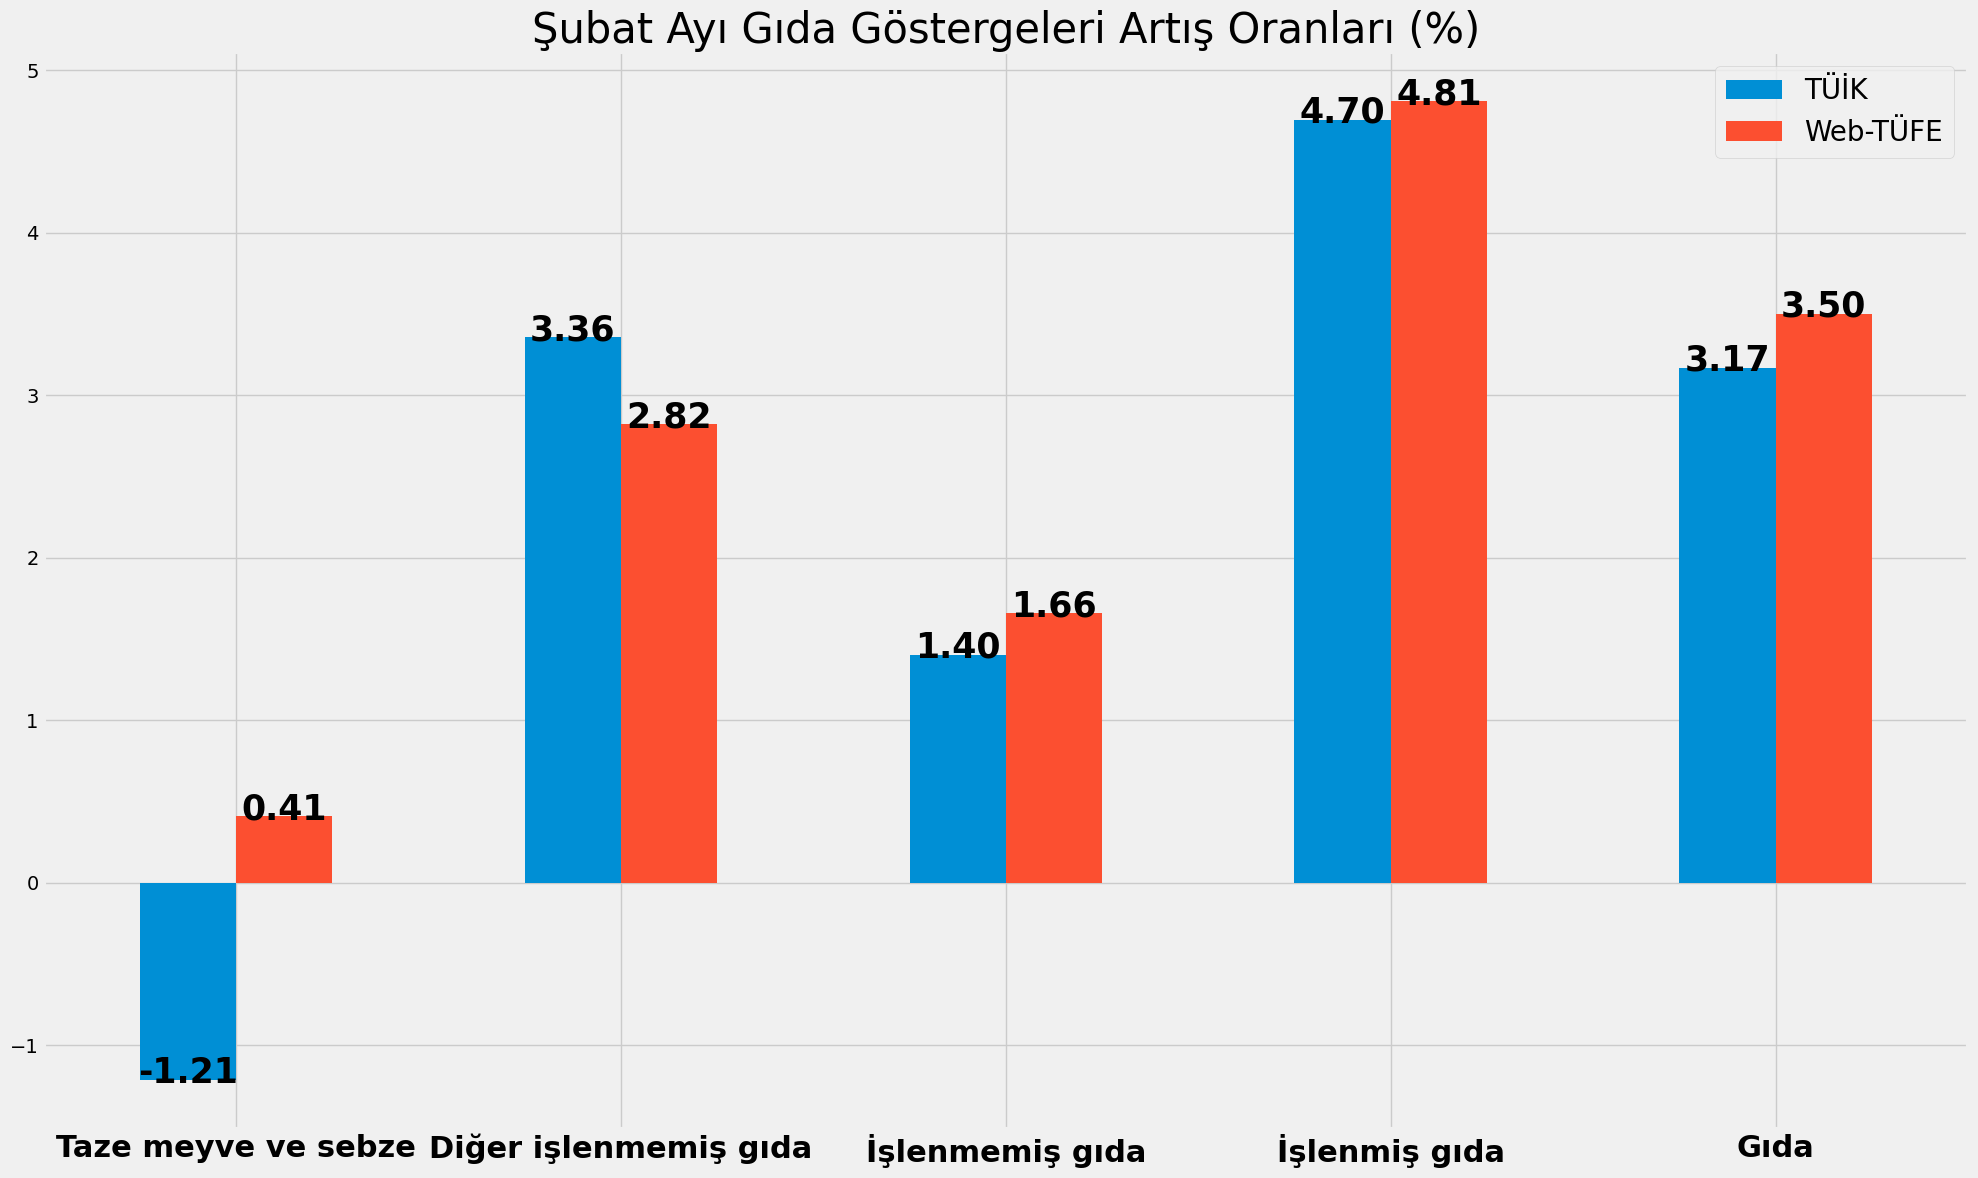

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
tüik=pd.read_csv("tüikim.csv",index_col=0)
plt.style.use("fivethirtyeight")
# Creating the data
data = {
    "TÜİK": tüik.pct_change().iloc[-1]*100,
    "Web-TÜFE": [0.41,2.82,1.66,4.81],

}

# Convert to DataFrame
df = pd.DataFrame(data)
df.loc["Gıda"]=[3.17,3.5]


# Plotting the bar chart with bold values on top of the bars
plt.figure(figsize=(25, 15))
ax = df.plot(kind='bar', figsize=(20, 12))

# Adding the values on top of the bars with bold text
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=25, fontweight='bold', color='black', xytext=(0, 5), textcoords='offset points')

plt.title("Şubat Ayı Gıda Göstergeleri Artış Oranları (%)",fontsize=30)

plt.xticks(rotation=0,fontsize=22,fontweight="bold")
plt.legend(fontsize=20)
plt.tight_layout()
plt.show()


In [37]:
gıda=pd.read_excel("ozel kapsamli tufe gostergeleri (1).xls")
gıda=gıda.iloc[50:51,3:].T
gıda.columns=["Aylık Değişim"]
gıda=gıda.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(gıda)))
gıda=gıda.loc["2024-11-30":]
gıda["Tarih"]=gıda.index.strftime("%Y-%m")
gıda=gıda.reset_index(drop=True)
gıda_c=gıda[["Tarih","Aylık Değişim"]]


aylık_endeks_tüik=list(gıda_c["Aylık Değişim"])
tüik_aylık=[1]
tüik_aylık.extend(list(((np.array(aylık_endeks_tüik)/100))+1))
tüik_aylık=pd.DataFrame(tüik_aylık,columns=["TÜİK"])
tüik_aylık=np.cumprod(tüik_aylık)*100

tüik_aylık.index=pd.date_range(start="2024-10-31",freq="M",periods=len(tüik_aylık)).strftime("%Y-%m-%d")
tüik_aylık.index=pd.to_datetime(tüik_aylık.index)

C:\Users\Bora\AppData\Local\Temp\ipykernel_24220\2351233369.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  gıda=gıda.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(gıda)))
C:\Users\Bora\AppData\Local\Temp\ipykernel_24220\2351233369.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tüik_aylık.index=pd.date_range(start="2024-10-31",freq="M",periods=len(tüik_aylık)).strftime("%Y-%m-%d")


In [39]:
gfe=pd.read_csv("gfe.csv",index_col=0)
gfe.index=pd.to_datetime(gfe.index)
gfe["TÜİK"]=tüik_aylık["TÜİK"]
gfe=gfe.fillna(method="ffill")
gfe=gfe.fillna(100)

C:\Users\Bora\AppData\Local\Temp\ipykernel_24220\1037474672.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  gfe=gfe.fillna(method="ffill")


In [ ]:
"""
    sa_data=pd.DataFrame()
    for col in tüik.columns:
        sa_data[f"{col} Aylık Ortalama"]=hareketli_aylik_ortalama(özelgöstergeler[col]).iloc[:,[-1,]]
        sa_data[f"{col} Aylık Ortalama"]=sa_data[f"{col} Aylık Ortalama"].fillna(method="ffill")
        sa_data["Önceki"]=(sa_data.index.to_period('M') - 1).to_timestamp(how='end')
        sa_data["Önceki"]=(sa_data.index.to_period('M') - 1).to_timestamp(how='end').strftime('%Y-%m-%d')
        sa_data.loc["2024-10","Önceki"]=pd.NA
        sa_data[f"{col} Önceki Endeks"]=pd.NA
        sa_data.loc["2024-11-01":,f"{col} Önceki Endeks"]=sa_data.loc[sa_data["Önceki"].dropna(),f"{col} Aylık Ortalama"].values

    sa_datadegisim=pd.DataFrame(index=pd.to_datetime(sa_data.loc["2024-11":].index))
    for col in tüik.columns:
        sa_datadegisim[col]=((sa_data[f"{col} Aylık Ortalama"]/sa_data[f"{col} Önceki Endeks"]).dropna()).values
        sa_datadegisim[col]=sa_datadegisim[col].astype(float)
        sa_datadegisim.index=pd.to_datetime(sa_datadegisim.index)
    sa_datadegisim=sa_datadegisim.resample('M').last()   
    sa_datadegisim.iloc[:2, sa_datadegisim.columns.get_loc("Taze meyve ve sebze")] = [1.082103253420332, 1.0378297012546769]
    sa_datadegisim.iloc[:2, sa_datadegisim.columns.get_loc("Diğer işlenmemiş gıda")] = [1.0333601398698096, 1.014720660120335]



    for col in sa_datadegisim.columns:
        sa_datadegisim[f"{col} MA"]=pd.NA


        for row in sa_datadegisim.index:
                tüik_data=tüik[col].loc[:(row.to_period('M') - 1).to_timestamp(how='end').strftime('%Y-%m-%d')]
                tüik_data.loc[pd.to_datetime((row.to_period('M')).to_timestamp(how='end').strftime('%Y-%m-%d'))]=tüik_data.iloc[-1]*sa_datadegisim[col].loc[row]
                from statsmodels.tsa.x13 import x13_arima_analysis


                np.random.seed(42)



                x13_path = r'C:\Users\Bora\Desktop\x13as'
                
                

                
                ayris = x13_arima_analysis(tüik_data, x12path=x13_path,outlier=False,log=False)
                sa_datadegisim[f"{col} MA"].loc[row]=ayris.seasadj.pct_change().iloc[-1]*100


    for col in tüik.columns:
        sa_datadegisim[f"{col} Faktör"]=((sa_datadegisim[f"{col} MA"]/100)+1)/sa_datadegisim[col]
        sa_datadegisim["Ay"]=sa_datadegisim.reset_index()["Tarih"].dt.month.values

    sa_datadegisim.columns=['Taze meyve ve sebze', 'Diğer işlenmemiş gıda',
    'SA Taze meyve ve sebze', 'SA Diğer işlenmemiş gıda',
    'Taze meyve ve sebze Faktör', 'Ay', 'Diğer işlenmemiş gıda Faktör']
    sa_datadegisim["İşlenmiş gıda"]=hareketli_aylik_ortalama(özelgöstergeler["İşlenmiş gıda"])["Aylık Ortalama"].fillna(method="ffill").resample('M').last().pct_change().dropna()*100
    sa_datadegisim.iloc[:2, sa_datadegisim.columns.get_loc("İşlenmiş gıda")] = [2.61412286061347, 1.60328139006671]


    ağırlıklar=pd.read_csv("ağırlıklar.csv",index_col=0)
    w=pd.read_excel("Weights_2022.xlsx").iloc[:133,:6]
    w["Unnamed: 5"]=w["Unnamed: 5"].fillna(method="ffill")
    meyveler=w[w["Unnamed: 5"].isin(["Taze Meyveler"])]["Unnamed: 1"].values
    sebzeler=w[w["Unnamed: 5"].isin(["Taze sebzeler (patates hariç)"])]["Unnamed: 1"].values
    meyvesebze=np.concatenate([meyveler,sebzeler])
    digerislenmemis=["Dana Eti","Kuzu Eti","Tavuk Eti","Sakatat","Balık","Konserve Balık","Yumurta"]

    islenmemis=digerislenmemis+list(meyvesebze)

    ağırlıklar=ağırlıklar.reset_index()
    meyvesebzeler=ağırlıklar[ağırlıklar["Ürün"].isin(meyvesebze)].iloc[:,[0,3]]
    meyvesebzeler.index=len(meyvesebzeler)*["SA Taze meyve ve sebze"]
    digerislenmemisler=ağırlıklar[ağırlıklar["Ürün"].isin(digerislenmemis)].iloc[:,[0,3]]
    digerislenmemisler.index=len(digerislenmemisler)*["SA Diğer işlenmemiş gıda"]
    islenmemisler=pd.concat([meyvesebzeler,digerislenmemisler],axis=0)
    islenmemisler.groupby(level=0)["Ağırlık"].sum()/islenmemisler.groupby(level=0)["Ağırlık"].sum().sum()

    sa_datadegisim["SA İşlenmemiş gıda"]=(sa_datadegisim[islenmemisler.sort_index().index.unique()]*islenmemisler.groupby(level=0)["Ağırlık"].sum()/islenmemisler.groupby(level=0)["Ağırlık"].sum().sum()).sum(axis=1)


    islenmisler=ağırlıklar[~ağırlıklar["Ürün"].isin(islenmemisler["Ürün"].values)].iloc[:,[0,3]]
    islenmisler.index=len(islenmisler)*["İşlenmiş gıda"]

    islenmemisler.index=["SA İşlenmemiş gıda"]*len(islenmemisler)

    genel=pd.concat([islenmemisler,islenmisler],axis=0)

    sa_datadegisim["SA Web-GFE"]=(sa_datadegisim[genel.sort_index().groupby(level=0)["Ağırlık"].sum().index]*genel.groupby(level=0)["Ağırlık"].sum()).sum(axis=1)
    sa_datadegisim.to_csv("magöstergeler.csv")
"""

In [ ]:
göstergeaylık=pd.DataFrame()
for col in tüik.columns:
    göstergeaylık[col]=hareketli_aylik_ortalama(özelgöstergeler[col])["Aylık Ortalama"].fillna(method="ffill").resample('M').last().pct_change().dropna()*100
    göstergeaylık[col].iloc[-1]=(((hareketli_aylik_ortalama(özelgöstergeler[col])["Aylık Ortalama"].iloc[-1]/hareketli_aylik_ortalama(özelgöstergeler[col])["Aylık Ortalama"].loc["2025-02-01"]))-1)*100

In [27]:
göstergeaylık


,Taze meyve ve sebze,Diğer işlenmemiş gıda,İşlenmemiş gıda,İşlenmiş gıda
Tarih,,,,
2024-11-30,5.477013,1.741840,3.612414,0.861357
2024-12-31,6.073420,3.877814,4.924704,2.034034
2025-01-31,6.135508,3.243180,4.713203,2.438807
2025-02-28,-0.040998,2.862252,1.335669,4.798631
2025-03-31,12.344673,3.698780,7.990578,2.912418


In [19]:
from datetime import date
import requests
import json
from urllib.parse import urlencode
def evds_vericek(series_code,freq):
    params = {
    'series': series_code,
    'startDate': "01-01-2010",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': freq,
    'aggregationTypes': 'avg',
    'type': 'json'
    }

    url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

    response = requests.get(url=url, headers={'key': key})

    # print(response.request.headers)

    formatted_response = json.loads(response.content)

    seri = formatted_response['items']
    seri = pd.DataFrame(seri)


    seri = seri.drop(columns=['UNIXTIME'])


    return seri

series_list=["TP.FE.OKTG10","TP.FE.OKTG11","TP.FE.OKTG09","TP.FE.OKTG12"]
tüik=pd.DataFrame()
for series in series_list:
    veri=evds_vericek(series,5)
    tüik=pd.concat([tüik,veri],axis=1)
tüik=tüik.drop("Tarih",axis=1)
tüik=tüik.set_index(pd.date_range(start="2010-01-31",freq="M",periods=len(tüik)))
tüik=tüik.loc["2016":]
tüik.columns=['Taze meyve ve sebze','Diğer işlenmemiş gıda','İşlenmemiş gıda','İşlenmiş gıda']
tüik.to_csv("tüikim.csv")


git_add_commit_push()


C:\Users\Bora\AppData\Local\Temp\ipykernel_9800\2997715634.py:38: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tüik=tüik.set_index(pd.date_range(start="2010-01-31",freq="M",periods=len(tüik)))


Commit işlemi başarılı: update
Push işlemi başarılı.
